In [21]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df.head()

work_year experience_level employment_type  \
0       2020               EX              FT   
1       2020               MI              FT   
2       2020               MI              FT   
3       2020               MI              FT   
4       2020               SE              FT   

                                  job_title  salary salary_currency  \
0                            Data Scientist  300000             USD   
1  Machine Learning Infrastructure Engineer   44000             EUR   
2                         Lead Data Analyst   87000             USD   
3                             Data Engineer   88000             GBP   
4                       Lead Data Scientist  190000             USD   

   salary_in_usd employee_residence  remote_ratio company_location  \
0         300000                 US           100               US   
1          50180                 PT             0               PT   
2          87000                 US           100               US   
3         112872                 GB            50               GB   
4         190000                 US           100               US   

  company_size  
0            L  
1            M  
2            L  
3            L  
4            S

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           4644 non-null   int64 
 1   experience_level    4644 non-null   object
 2   employment_type     4644 non-null   object
 3   job_title           4644 non-null   object
 4   salary              4644 non-null   int64 
 5   salary_currency     4644 non-null   object
 6   salary_in_usd       4644 non-null   int64 
 7   employee_residence  4644 non-null   object
 8   remote_ratio        4644 non-null   int64 
 9   company_location    4644 non-null   object
 10  company_size        4644 non-null   object
dtypes: int64(4), object(7)
memory usage: 399.2+ KB


In [23]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  4644.000000  4.644000e+03    4644.000000   4644.000000
mean   2023.598622  1.811641e+05  148308.590655     30.437123
std       1.291953  5.811530e+05   71866.704839     45.234242
min    2020.000000  1.400000e+04   15000.000000      0.000000
25%    2023.000000  1.000000e+05   99100.000000      0.000000
50%    2024.000000  1.411350e+05  140000.000000      0.000000
75%    2025.000000  1.880000e+05  185000.000000    100.000000
max    2025.000000  3.040000e+07  750000.000000    100.000000

In [24]:
salary_outliers = df[(df['salary_in_usd'] < 40000) | (df['salary_in_usd'] > 200000)]

df['salary_in_usd'].fillna(df['salary_in_usd'].median(), inplace=True)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn import linear_model

In [27]:
import sklearn.metrics as metrics

In [28]:
df.head()

work_year experience_level employment_type  \
0       2020               EX              FT   
1       2020               MI              FT   
2       2020               MI              FT   
3       2020               MI              FT   
4       2020               SE              FT   

                                  job_title  salary salary_currency  \
0                            Data Scientist  300000             USD   
1  Machine Learning Infrastructure Engineer   44000             EUR   
2                         Lead Data Analyst   87000             USD   
3                             Data Engineer   88000             GBP   
4                       Lead Data Scientist  190000             USD   

   salary_in_usd employee_residence  remote_ratio company_location  \
0         300000                 US           100               US   
1          50180                 PT             0               PT   
2          87000                 US           100               US   
3         112872                 GB            50               GB   
4         190000                 US           100               US   

  company_size  
0            L  
1            M  
2            L  
3            L  
4            S

In [29]:
X = df.drop (columns=["salary_in_usd", "experience_level", "employment_type", "job_title", "employee_residence", "remote_ratio", "company_location", "company_size", "salary_currency"])
Y = df["salary_in_usd"]

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=42)

In [30]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("RMSE:", np.sqrt(mse))

Mean Squared Error: 5522389588.977271
RMSE: 74312.78213724252


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Selection & Justification
# We select features that logically influence salary (Domain Knowledge):
# - experience_level: Higher experience usually correlates with higher pay.
# - job_title: Specialized roles (e.g., AI Engineer) often pay more than general ones.
# - employee_residence: Salaries vary significantly by country (e.g., US vs. IN).
# - work_year: Tech salaries change yearly due to market trends and inflation.
# - remote_ratio & company_size: Work settings and company scale impact compensation.
features = ['work_year', 'experience_level', 'job_title', 'employee_residence', 'remote_ratio', 'company_size']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# 3. Handling Data Issues
# - Missing Values: df.isnull().sum() showed 0 missing values, so no imputation is needed.
# - Outliers: We use the IQR method to remove extreme salary values that might skew the model.
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[mask]
y_clean = y[mask]

print(f"Removed {len(df) - len(X_clean)} outliers. New dataset size: {len(X_clean)}")

# 4. Data Transformation & Model Pipeline
# Categorical features are one-hot encoded; numerical features are scaled.
categorical_features = ['experience_level', 'job_title', 'employee_residence', 'company_size']
numerical_features = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Using RandomForestRegressor: it handles non-linear relationships and high-dimensional categorical data well.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 5. Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

# Evaluation Metrics
y_pred = model_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# 6. Make 3 Predictions
print("\n--- Model Predictions ---")
test_indices = [5, 15, 25] # Specific indices for demonstration
for idx in test_indices:
    sample_x = X_test.iloc[[idx]]
    actual_y = y_test.iloc[idx]
    pred_y = model_pipeline.predict(sample_x)[0]
    print(f"\nInput: {sample_x.to_dict('records')[0]}")
    print(f"Actual Salary: ${actual_y:,.2f} | Predicted: ${pred_y:,.2f}")
    print(f"Difference: ${abs(actual_y - pred_y):,.2f}")

Removed 100 outliers. New dataset size: 4544

Model Performance:
Mean Absolute Error (MAE): $39,798.24
Root Mean Squared Error (RMSE): $51,692.37
R-squared (R2): 0.3289

--- Model Predictions ---

Input: {'work_year': 2024, 'experience_level': 'EN', 'job_title': 'Machine Learning Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Actual Salary: $113,500.00 | Predicted: $113,600.24
Difference: $100.24

Input: {'work_year': 2025, 'experience_level': 'SE', 'job_title': 'Data Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Actual Salary: $139,500.00 | Predicted: $159,866.06
Difference: $20,366.06

Input: {'work_year': 2024, 'experience_level': 'SE', 'job_title': 'Technical Lead', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Actual Salary: $296,000.00 | Predicted: $260,537.47
Difference: $35,462.53


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Tải dữ liệu
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Engineering: Nhóm Job Titles thành các Category chính
def simplify_title(title):
    title = title.lower()
    if 'scientist' in title or 'nlp' in title: return 'Data Scientist'
    elif 'engineer' in title or 'architect' in title: return 'Data/ML Engineer'
    elif 'analyst' in title: return 'Analyst'
    elif 'manager' in title or 'lead' in title or 'head' in title: return 'Management'
    else: return 'Other'

df['job_category'] = df['job_title'].apply(simplify_title)

# 3. Loại bỏ Outliers bằng IQR cho cột lương
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df['salary_in_usd'] >= Q1 - 1.5 * IQR) & (df['salary_in_usd'] <= Q3 + 1.5 * IQR)]

# 4. Chuẩn bị Feature và Target
features = ['work_year', 'experience_level', 'job_category', 'employee_residence', 'remote_ratio', 'company_size']
X = df_clean[features]
y = df_clean['salary_in_usd']

# 5. Xây dựng Pipeline xử lý dữ liệu
categorical_cols = ['experience_level', 'job_category', 'employee_residence', 'company_size']
numerical_cols = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# 6. Sử dụng Gradient Boosting và Tinh chỉnh tham số (Grid Search)
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 4]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print(f"Best R2 Score: {grid_search.best_score_:.4f}")
print(f"Best Params: {grid_search.best_params_}")

Best R2 Score: 0.3047
Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Engineering: Nhóm các chức danh công việc tương đồng
def simplify_title(title):
    title = title.lower()
    if 'scientist' in title or 'nlp' in title: return 'Data Scientist'
    elif 'engineer' in title or 'architect' in title: return 'Data/ML Engineer'
    elif 'analyst' in title: return 'Analyst'
    elif 'manager' in title or 'lead' in title or 'head' in title or 'director' in title: return 'Management'
    else: return 'Other'

df['job_category'] = df['job_title'].apply(simplify_title)

# 3. Handling Outliers (IQR Method)
target = 'salary_in_usd'
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Giữ lại các giá trị trong khoảng bình thường
df_clean = df[(df[target] >= lower_bound) & (df[target] <= upper_bound)].copy()

# 4. Target Transformation: Log Transform
# Giúp mô hình xử lý tốt hơn các mức lương chênh lệch lớn
df_clean['log_salary'] = np.log1p(df_clean[target])

# 5. Feature Selection
# 'job_category' thay thế cho 'job_title' để giảm chiều dữ liệu
features = ['work_year', 'experience_level', 'job_category', 'employee_residence', 'remote_ratio', 'company_size']
X = df_clean[features]
y = df_clean['log_salary']

# 6. Preprocessing & Pipeline
categorical_features = ['experience_level', 'job_category', 'employee_residence', 'company_size']
numerical_features = ['work_year', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Xây dựng Pipeline với Gradient Boosting
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# 7. Training & Hyperparameter Tuning (Tìm thông số tốt nhất)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# 8. Evaluation (Chuyển ngược từ Log về giá trị gốc để tính metric thực tế)
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"--- Kết quả sau cải tiến ---")
print(f"Tham số tốt nhất: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# 9. Thực hiện 3 dự đoán mẫu
test_indices = [5, 15, 25]
print("\n--- Model Predictions (Cải tiến) ---")
for idx in test_indices:
    sample_x = X_test.iloc[[idx]]
    actual_y = y_test_original.iloc[idx]
    pred_y_log = best_model.predict(sample_x)[0]
    pred_y = np.expm1(pred_y_log)
    print(f"\nInput: {sample_x.to_dict('records')[0]}")
    print(f"Thực tế: ${actual_y:,.2f} | Dự đoán: ${pred_y:,.2f}")
    print(f"Chênh lệch: ${abs(actual_y - pred_y):,.2f}")

--- Kết quả sau cải tiến ---
Tham số tốt nhất: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Mean Absolute Error (MAE): $39,870.96
R-squared (R2): 0.3168

--- Model Predictions (Cải tiến) ---

Input: {'work_year': 2024, 'experience_level': 'EN', 'job_category': 'Data/ML Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Thực tế: $113,500.00 | Dự đoán: $115,894.87
Chênh lệch: $2,394.87

Input: {'work_year': 2025, 'experience_level': 'SE', 'job_category': 'Data/ML Engineer', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Thực tế: $139,500.00 | Dự đoán: $167,530.68
Chênh lệch: $28,030.68

Input: {'work_year': 2024, 'experience_level': 'SE', 'job_category': 'Management', 'employee_residence': 'US', 'remote_ratio': 0, 'company_size': 'M'}
Thực tế: $296,000.00 | Dự đoán: $166,572.10
Chênh lệch: $129,427.90


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---
MAE: $42,979.50
RMSE: $63,315.32
R2 Score: 0.3071
Adjusted R2 Score: 0.3011
Median Absolute Error: $31,002.43


--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---
MAE: $42,979.50
RMSE: $63,315.32
R2 Score: 0.3071
Adjusted R2 Score: 0.3011
Median Absolute Error: $31,002.43


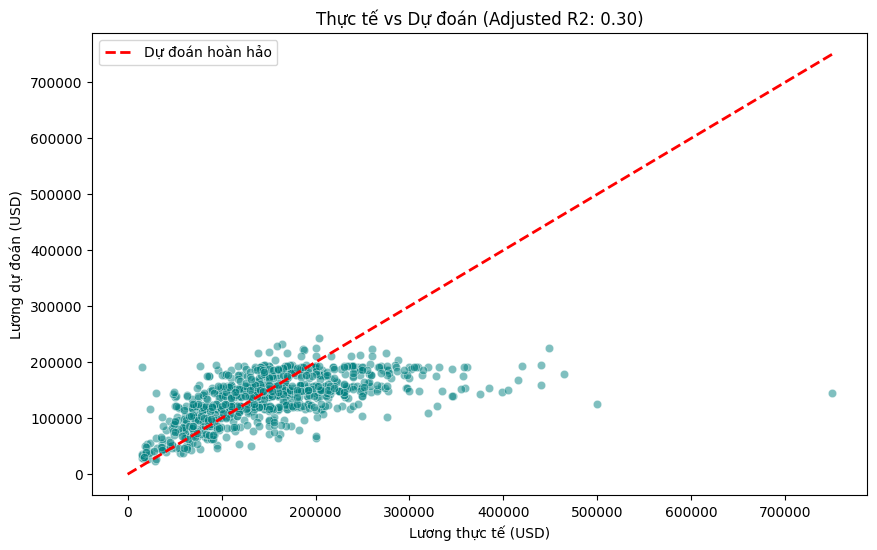

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. Tải dữ liệu
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Tiền xử lý dữ liệu (Preprocessing)
def preprocess_data(df):
    df_proc = df.copy()
    
    # Ordinal Encoding: Áp dụng cho các biến có thứ tự rõ ràng (logic)
    exp_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
    size_map = {'S': 1, 'M': 2, 'L': 3}
    df_proc['experience_level'] = df_proc['experience_level'].map(exp_map)
    df_proc['company_size'] = df_proc['company_size'].map(size_map)
    
    # Label Encoding: Cho các biến phân loại không có thứ tự
    cat_cols = ['job_title', 'employee_residence', 'company_location', 'employment_type']
    for col in cat_cols:
        le = LabelEncoder()
        df_proc[col] = le.fit_transform(df_proc[col])
        
    # Loại bỏ cột gây rò rỉ thông tin (leakage)
    df_proc = df_proc.drop(columns=['salary', 'salary_currency'])
    return df_proc

df_ml = preprocess_data(df)

# 3. Log Transformation: Giúp chuẩn hóa phân phối mục tiêu (Lương)
# Phép toán log1p (log(1+x)) giúp mô hình học tốt hơn với dữ liệu bị lệch (skewed)
y_log = np.log1p(df_ml['salary_in_usd'])
X = df_ml.drop(columns=['salary_in_usd'])

# 4. Chia dữ liệu Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 5. Huấn luyện với Gradient Boosting
model = GradientBoostingRegressor(
    n_estimators=300, 
    learning_rate=0.05, 
    max_depth=3, 
    subsample=0.8, 
    random_state=42
)
model.fit(X_train, y_train)

# 6. Dự đoán và chuyển đổi ngược từ Log sang USD (Inverse Transform)
y_pred_log = model.predict(X_test)
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

# 7. Tính toán các Metrics chi tiết
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)
medae = median_absolute_error(y_test_actual, y_pred_actual)

# Tính Adjusted R-squared
n = len(y_test_actual) # Số lượng mẫu
p = X_test.shape[1]    # Số lượng đặc trưng (features)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Xuất kết quả
print("--- KẾT QUẢ ĐÁNH GIÁ MÔ HÌNH ---")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")
print(f"Adjusted R2 Score: {adj_r2:.4f}")
print(f"Median Absolute Error: ${medae:,.2f}")

# 8. Vẽ biểu đồ so sánh Thực tế và Dự đoán
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.5, color='teal')
# Vẽ đường tham chiếu (Lý tưởng: Thực tế = Dự đoán)
max_val = max(y_test_actual.max(), y_pred_actual.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', lw=2, label='Dự đoán hoàn hảo')
plt.xlabel('Lương thực tế (USD)')
plt.ylabel('Lương dự đoán (USD)')
plt.title(f'Thực tế vs Dự đoán (Adjusted R2: {adj_r2:.2f})')
plt.legend()
plt.show()

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
# THAY ĐỔI 1: Thêm mean_squared_error vào import
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, mean_squared_error

# 1. Load Data & Lọc Nhiễu Nhẹ (Outlier Removal)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. Xây dựng bộ xử lý đặc trưng
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. Xây dựng Pipeline & Log Transform Tự động
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. Huấn luyện & Đánh giá
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# THAY ĐỔI 2: Tính toán RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- FINAL OPTIMIZED RESULT ---")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")
print(f"RMSE: ${rmse:,.2f}")  # In kết quả RMSE
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Median Absolute Error: ${median_absolute_error(y_test, y_pred):,.2f}")

--- FINAL OPTIMIZED RESULT ---
MAE: $38,389.67
RMSE: $51,390.41
R2 Score: 0.3074
Median Absolute Error: $30,442.35


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Import CatBoost
from catboost import CatBoostRegressor

# 1. Load Data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 2. Feature Selection
features = ['work_year', 'experience_level', 'job_title', 'employee_residence', 'remote_ratio', 'company_size']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# 3. Handling Outliers (IQR Method)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[mask]
y_clean = y[mask]

print(f"Removed {len(df) - len(X_clean)} outliers. New dataset size: {len(X_clean)}")

# 4. Define Categorical Features
# CatBoost cần biết cột nào là categorical để xử lý nội bộ (tốt hơn One-Hot)
categorical_features = ['experience_level', 'job_title', 'employee_residence', 'company_size']

# 5. Training and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Khởi tạo mô hình CatBoost
# - iterations: số lượng cây
# - learning_rate: tốc độ học
# - depth: độ sâu của cây
# - cat_features: danh sách các cột phân loại
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features=categorical_features,
    verbose=0,  # Tắt log huấn luyện cho gọn
    random_state=42
)

# Fit mô hình
model.fit(X_train, y_train)

# Evaluation Metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance (CatBoost):")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# 6. Make 3 Predictions
print("\n--- Model Predictions ---")
test_indices = [5, 15, 25]
for idx in test_indices:
    sample_x = X_test.iloc[[idx]]
    actual_y = y_test.iloc[idx]
    pred_y = model.predict(sample_x)[0]
    
    # Convert sample input to dict for readable printing
    print(f"\nInput: {sample_x.to_dict('records')[0]}")
    print(f"Actual Salary: ${actual_y:,.2f} | Predicted: ${pred_y:,.2f}")
    print(f"Difference: ${abs(actual_y - pred_y):,.2f}")

ModuleNotFoundError: No module named 'catboost'

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,806.97
RMSE (Sai số bình phương trung bình): $50,722.76
Median Error (Sai số trung vị - Phổ biến nhất): $29,908.51
R2 Score: 0.3253


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,806.97
RMSE (Sai số bình phương trung bình): $50,722.76
Median Error (Sai số trung vị - Phổ biến nhất): $29,908.51
R2 Score: 0.3253


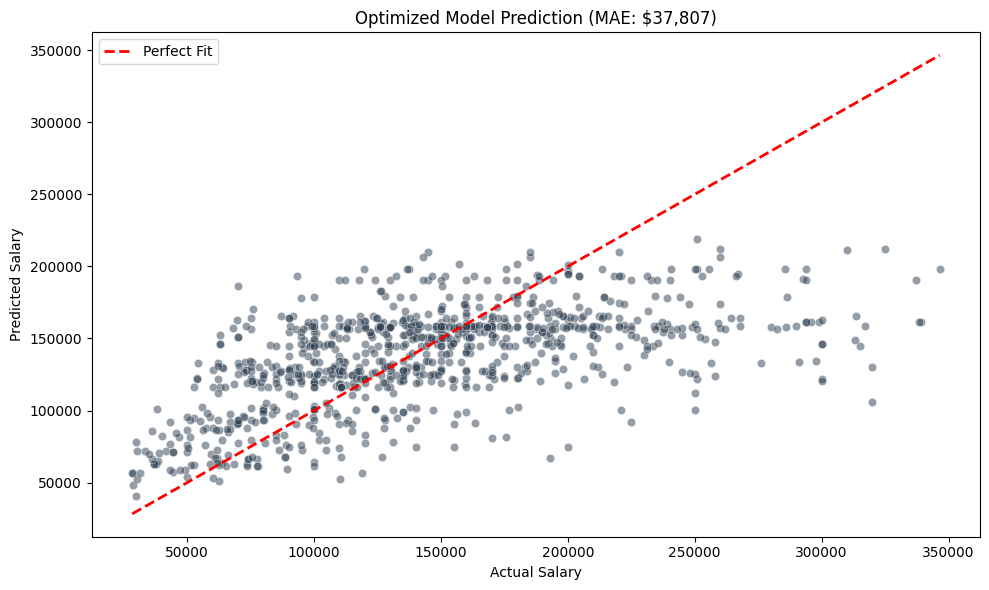

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,804.18
RMSE (Sai số bình phương trung bình): $50,727.29
Median Error (Sai số trung vị - Phổ biến nhất): $29,830.52
R2 Score: 0.3252


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,804.18
RMSE (Sai số bình phương trung bình): $50,727.29
Median Error (Sai số trung vị - Phổ biến nhất): $29,830.52
R2 Score: 0.3252


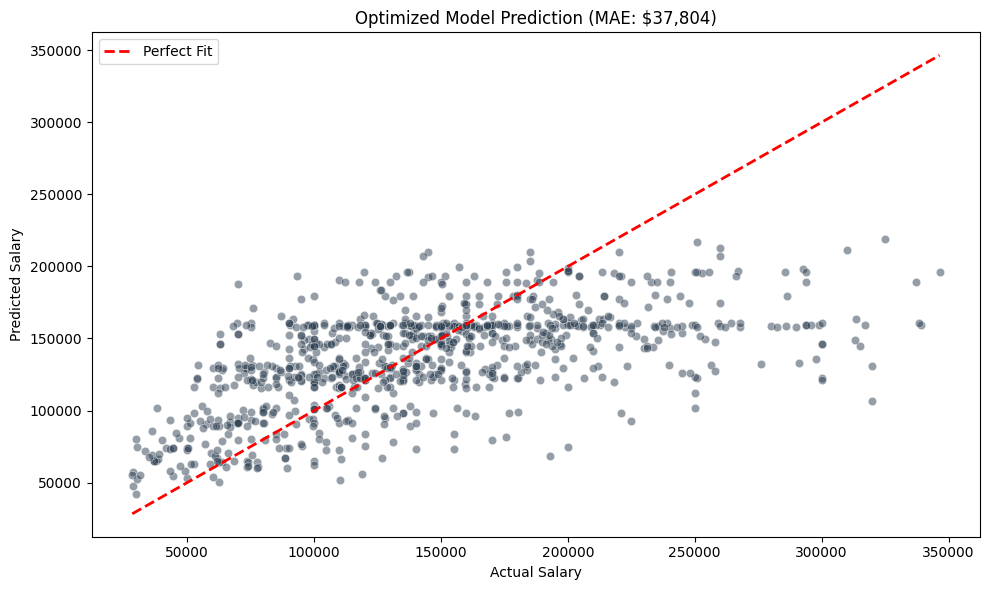

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa tham số (K-Fold cv=5) ---

--- Đang đánh giá 10-Fold CV đa chỉ số trên toàn bộ dữ liệu ---
MAE trung bình:  $39,909.42 (+/- $2,264.75)
RMSE trung bình: $52,770.09 (+/- $3,372.03)
R2 trung bình:   0.3104 (+/- 0.0398)

--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---
MAE: $37,857.46 | RMSE: $50,824.80 | R2: 0.3226


--- Đang tối ưu hóa tham số (K-Fold cv=5) ---

--- Đang đánh giá 10-Fold CV đa chỉ số trên toàn bộ dữ liệu ---
MAE trung bình:  $39,909.42 (+/- $2,264.75)
RMSE trung bình: $52,770.09 (+/- $3,372.03)
R2 trung bình:   0.3104 (+/- 0.0398)

--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---
MAE: $37,857.46 | RMSE: $50,824.80 | R2: 0.3226


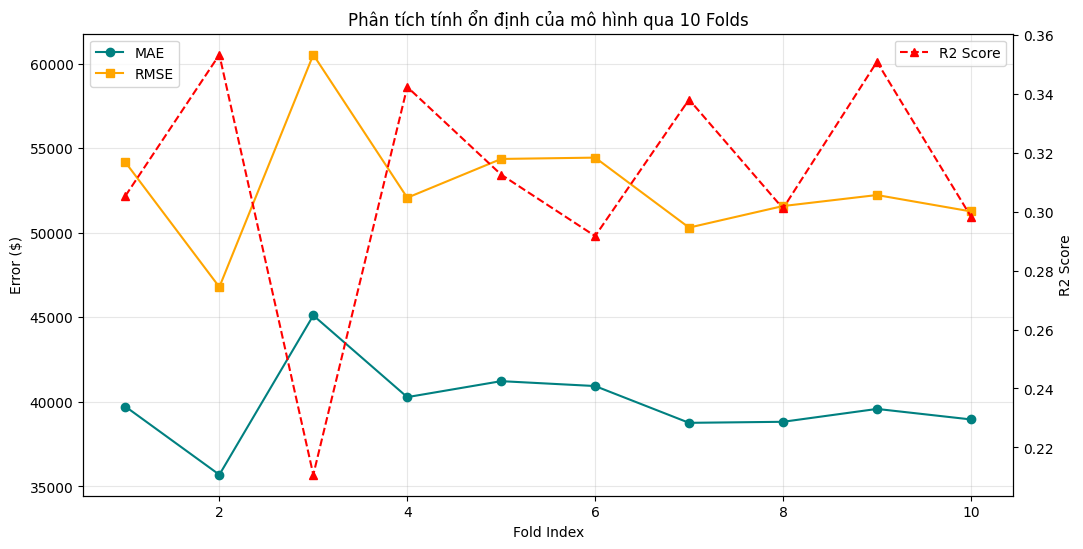

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & CLEANING
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. FEATURE ENGINEERING
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]
nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__regressor__max_depth': [3, 4, 5],
    'regressor__regressor__subsample': [0.7, 0.8, 0.9]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa tham số (K-Fold cv=5) ---")
search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, 
    n_iter=15, cv=5, scoring='neg_mean_absolute_error', 
    n_jobs=-1, random_state=42
)
search.fit(X_train, y_train)
best_model = search.best_estimator_

# --- PHẦN NÂNG CẤP: K-FOLD VỚI ĐA CHỈ SỐ (MULTI-METRIC CV) ---
print("\n--- Đang đánh giá 10-Fold CV đa chỉ số trên toàn bộ dữ liệu ---")
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scoring_metrics = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv_results = cross_validate(best_model, X, y, cv=kf, scoring=scoring_metrics, n_jobs=-1)

# Chuyển đổi các giá trị âm của sklearn về số dương
cv_mae = -cv_results['test_mae']
cv_rmse = -cv_results['test_rmse']
cv_r2 = cv_results['test_r2']

print(f"MAE trung bình:  ${cv_mae.mean():,.2f} (+/- ${cv_mae.std():,.2f})")
print(f"RMSE trung bình: ${cv_rmse.mean():,.2f} (+/- ${cv_rmse.std():,.2f})")
print(f"R2 trung bình:   {cv_r2.mean():.4f} (+/- {cv_r2.std():.4f})")

# 5. ĐÁNH GIÁ TRÊN TẬP TEST ĐỘC LẬP
y_pred = best_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_r2 = r2_score(y_test, y_pred)

print(f"\n--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---")
print(f"MAE: ${final_mae:,.2f} | RMSE: ${final_rmse:,.2f} | R2: {final_r2:.4f}")

# 6. VISUALIZATION - SO SÁNH BIẾN ĐỘNG CÁC CHỈ SỐ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ MAE và RMSE (trục tung bên trái)
ax1.plot(range(1, 11), cv_mae, marker='o', label='MAE', color='teal')
ax1.plot(range(1, 11), cv_rmse, marker='s', label='RMSE', color='orange')
ax1.set_xlabel('Fold Index')
ax1.set_ylabel('Error ($)')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Vẽ R2 (trục tung bên phải để dễ quan sát vì scale khác nhau)
ax2 = ax1.twinx()
ax2.plot(range(1, 11), cv_r2, marker='^', label='R2 Score', color='red', linestyle='--')
ax2.set_ylabel('R2 Score')
ax2.legend(loc='upper right')

plt.title('Phân tích tính ổn định của mô hình qua 10 Folds')
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,806.97
RMSE (Sai số bình phương trung bình): $50,722.76
Median Error (Sai số trung vị - Phổ biến nhất): $29,908.51
R2 Score: 0.3253


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,806.97
RMSE (Sai số bình phương trung bình): $50,722.76
Median Error (Sai số trung vị - Phổ biến nhất): $29,908.51
R2 Score: 0.3253


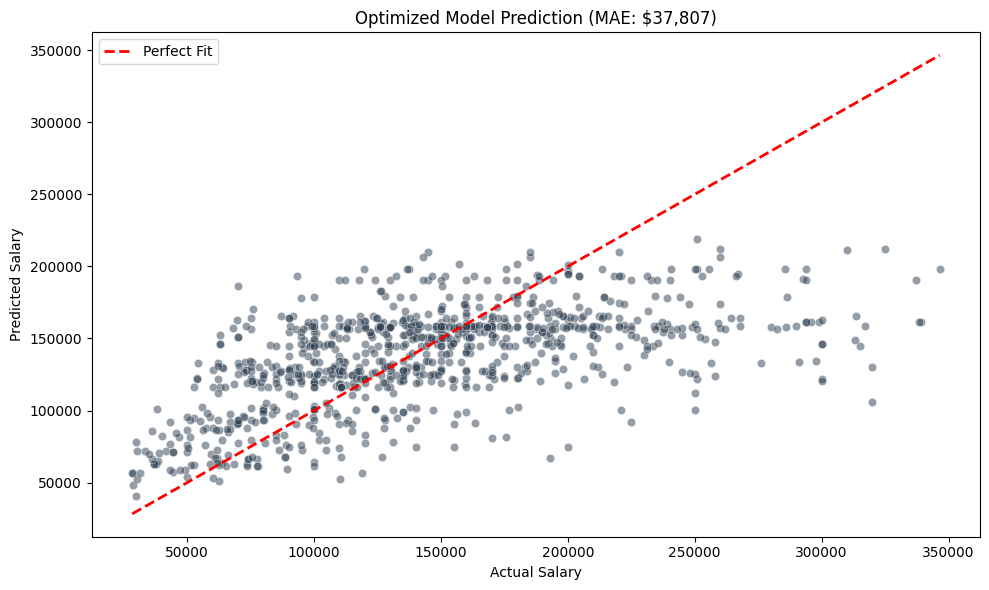

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,793.15
RMSE (Sai số bình phương trung bình): $50,715.60
Median Error (Sai số trung vị - Phổ biến nhất): $29,959.60
R2 Score: 0.3255


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,793.15
RMSE (Sai số bình phương trung bình): $50,715.60
Median Error (Sai số trung vị - Phổ biến nhất): $29,959.60
R2 Score: 0.3255


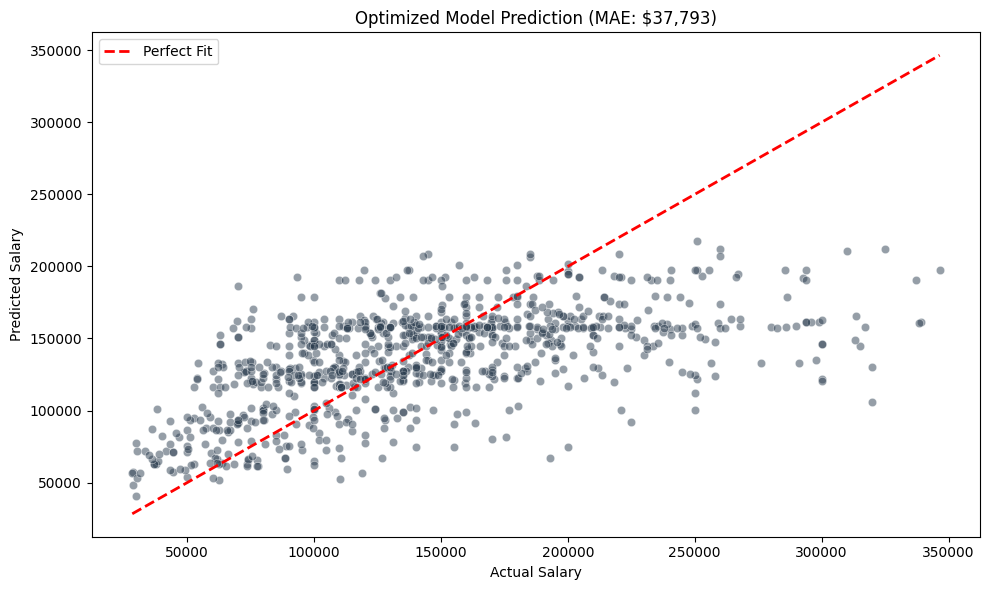

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,798.60
RMSE (Sai số bình phương trung bình): $50,724.98
Median Error (Sai số trung vị - Phổ biến nhất): $29,790.18
R2 Score: 0.3252


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,798.60
RMSE (Sai số bình phương trung bình): $50,724.98
Median Error (Sai số trung vị - Phổ biến nhất): $29,790.18
R2 Score: 0.3252


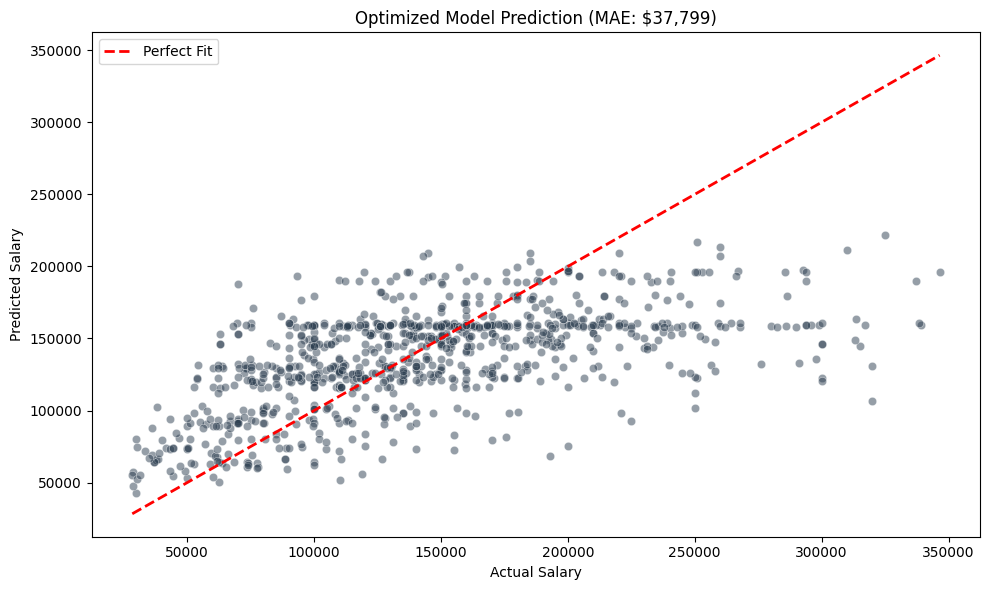

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

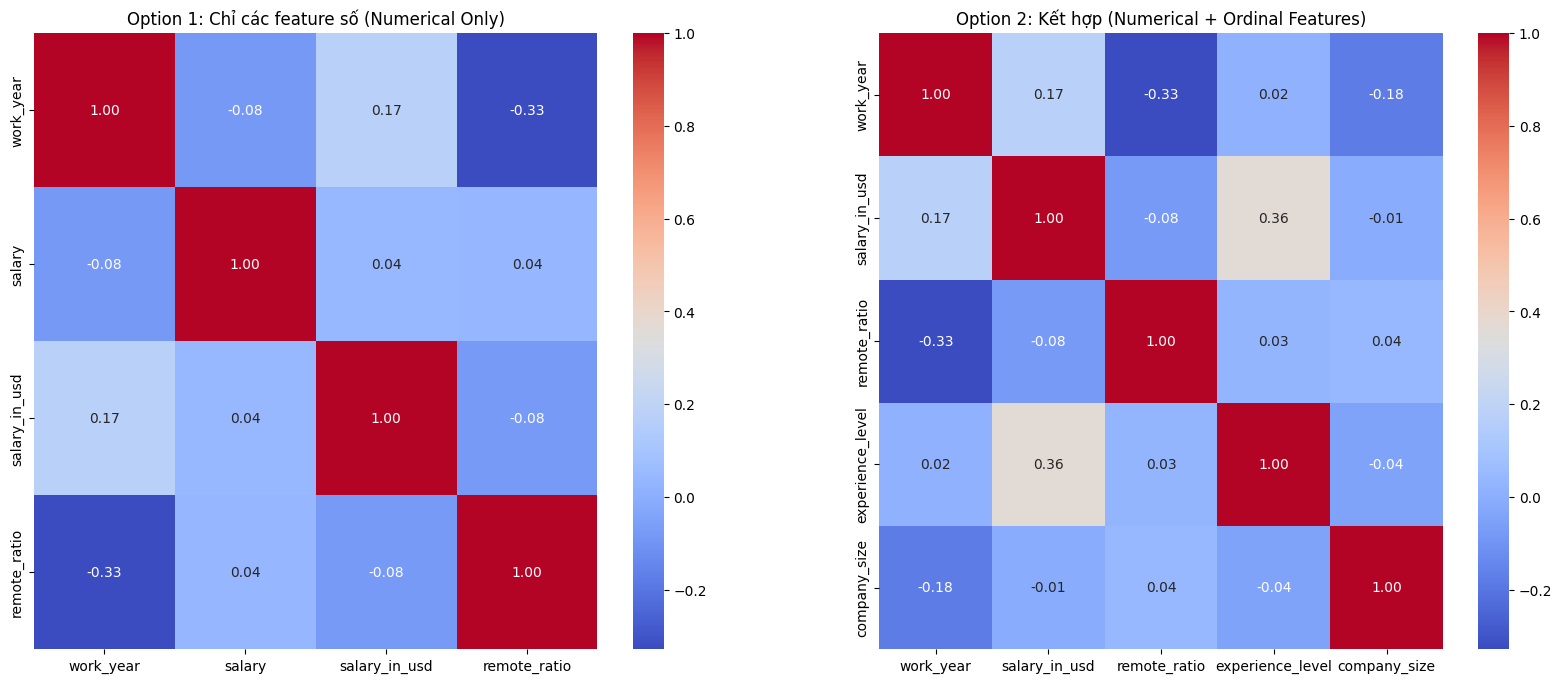

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# --- OPTION 1: Chỉ dùng Numerical Features ---
df_num = df.select_dtypes(include=['number'])
corr_num = df_num.corr()

# --- OPTION 2 (Khuyên dùng): Numerical + Ordinal Categorical ---
df_hybrid = df.copy()

# Tự quy định thứ tự cho các biến phân loại (Ordinal Encoding)
# Việc này chính xác hơn là để máy tự random số
experience_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
size_map = {'S': 0, 'M': 1, 'L': 2}

df_hybrid['experience_level'] = df_hybrid['experience_level'].map(experience_map)
df_hybrid['company_size'] = df_hybrid['company_size'].map(size_map)

# Chỉ chọn các cột có ý nghĩa thống kê tương quan
cols_selected = ['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level', 'company_size']
corr_hybrid = df_hybrid[cols_selected].corr()

# --- Vẽ biểu đồ so sánh ---
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Biểu đồ 1: Chỉ số
sns.heatmap(corr_num, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Option 1: Chỉ các feature số (Numerical Only)')

# Biểu đồ 2: Kết hợp
sns.heatmap(corr_hybrid, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Option 2: Kết hợp (Numerical + Ordinal Features)')

plt.show()

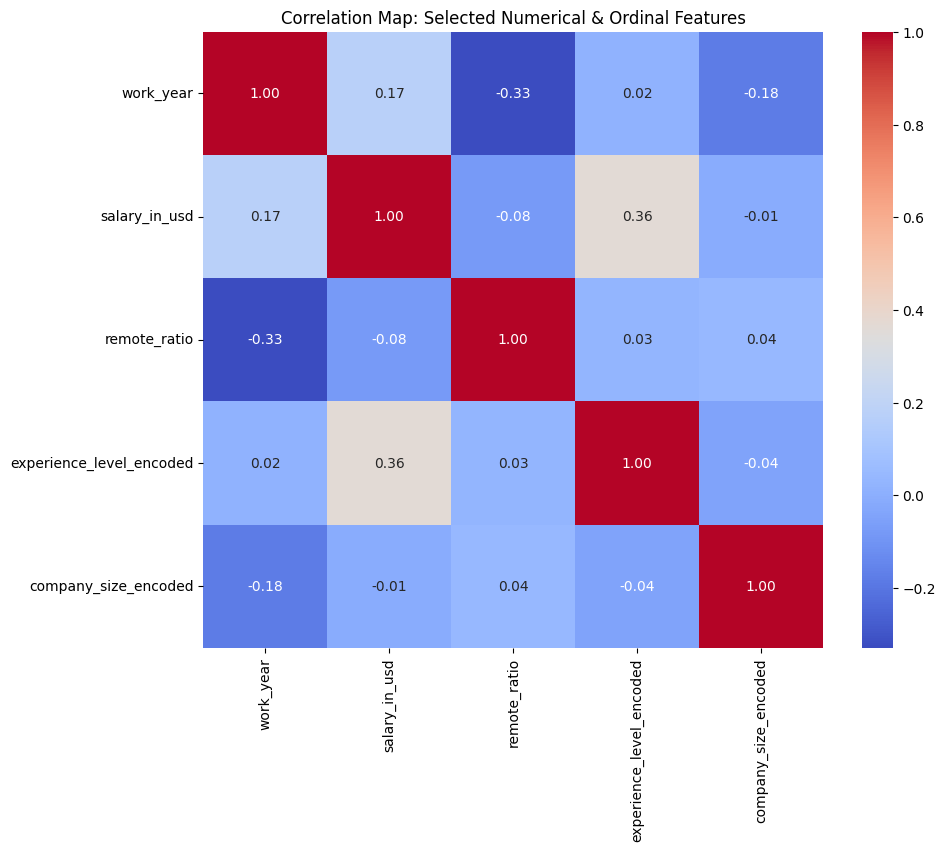

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# 1. Map dữ liệu có thứ tự (Ordinal)
experience_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
size_map = {'S': 0, 'M': 1, 'L': 2}

df['experience_level_encoded'] = df['experience_level'].map(experience_map)
df['company_size_encoded'] = df['company_size'].map(size_map)

# 2. Chọn lọc features (Bỏ job_title, location...)
selected_cols = ['work_year', 'salary_in_usd', 'remote_ratio', 
                 'experience_level_encoded', 'company_size_encoded']

# 3. Vẽ Correlation Map
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Map: Selected Numerical & Ordinal Features')
plt.show()

C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_17272\3635987199.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


C:\Users\NhuPhan\AppData\Local\Temp\ipykernel_17272\3635987199.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


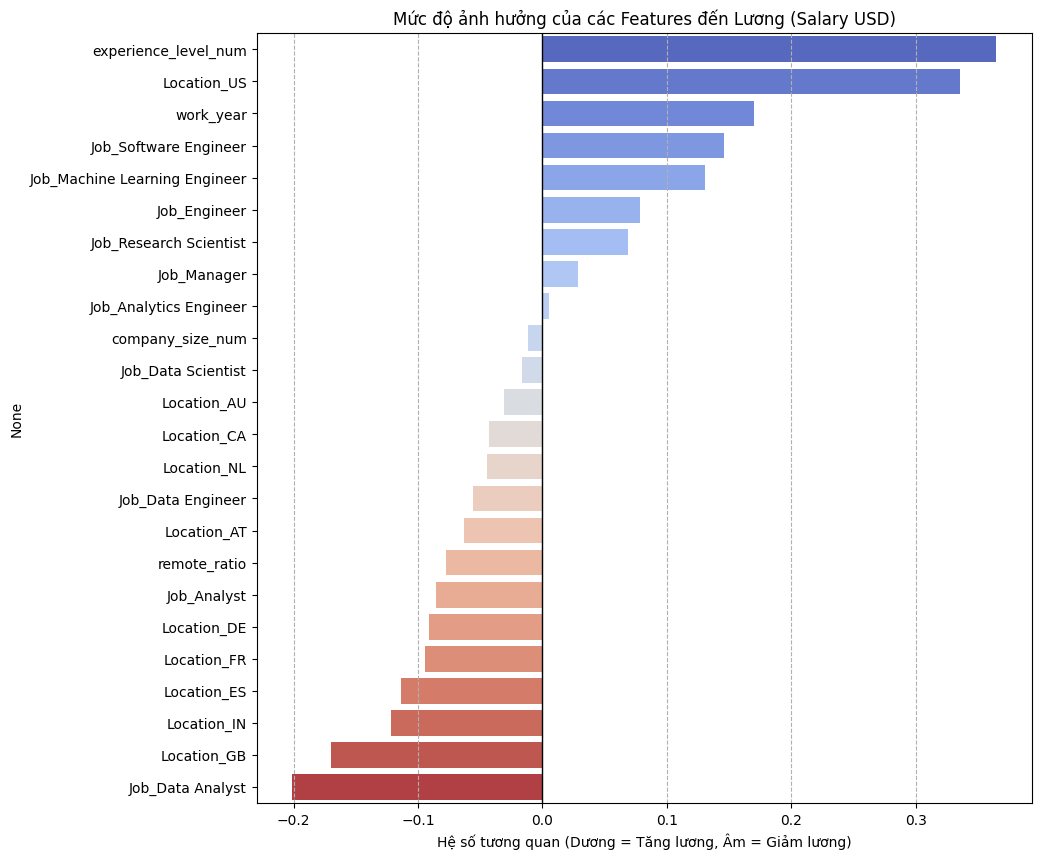

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc dữ liệu
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df_clean = df.copy()

# 2. Xử lý dữ liệu để tính tương quan

# A. Feature có thứ tự (Ordinal) -> Map sang số
experience_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
size_map = {'S': 0, 'M': 1, 'L': 2}
df_clean['experience_level_num'] = df_clean['experience_level'].map(experience_map)
df_clean['company_size_num'] = df_clean['company_size'].map(size_map)

# B. Feature định danh (Nominal) -> Tách ra các cột riêng (One-Hot)
# Chỉ lấy Top 10 Job và Top 10 Location phổ biến nhất để phân tích cho gọn
top_locations = df_clean['company_location'].value_counts().nlargest(10).index
for loc in top_locations:
    df_clean[f'Location_{loc}'] = (df_clean['company_location'] == loc).astype(int)

top_jobs = df_clean['job_title'].value_counts().nlargest(10).index
for job in top_jobs:
    df_clean[f'Job_{job}'] = (df_clean['job_title'] == job).astype(int)

# 3. Tính độ tương quan của TẤT CẢ các feature với 'salary_in_usd'
# Chỉ lấy các cột số
numeric_cols = df_clean.select_dtypes(include=['number']).columns
# Tính correlation với riêng cột Target
target_corr = df_clean[numeric_cols].corrwith(df_clean['salary_in_usd']).sort_values(ascending=False)

# Bỏ qua chính nó (salary_in_usd) và cột salary gốc (trùng lặp)
target_corr = target_corr.drop(['salary_in_usd', 'salary'], errors='ignore')

# 4. Vẽ biểu đồ
plt.figure(figsize=(10, 10))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Mức độ ảnh hưởng của các Features đến Lương (Salary USD)')
plt.xlabel('Hệ số tương quan (Dương = Tăng lương, Âm = Giảm lương)')
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', linestyle='--')
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,793.15
RMSE (Sai số bình phương trung bình): $50,715.60
Median Error (Sai số trung vị - Phổ biến nhất): $29,959.60
R2 Score: 0.3255


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,793.15
RMSE (Sai số bình phương trung bình): $50,715.60
Median Error (Sai số trung vị - Phổ biến nhất): $29,959.60
R2 Score: 0.3255


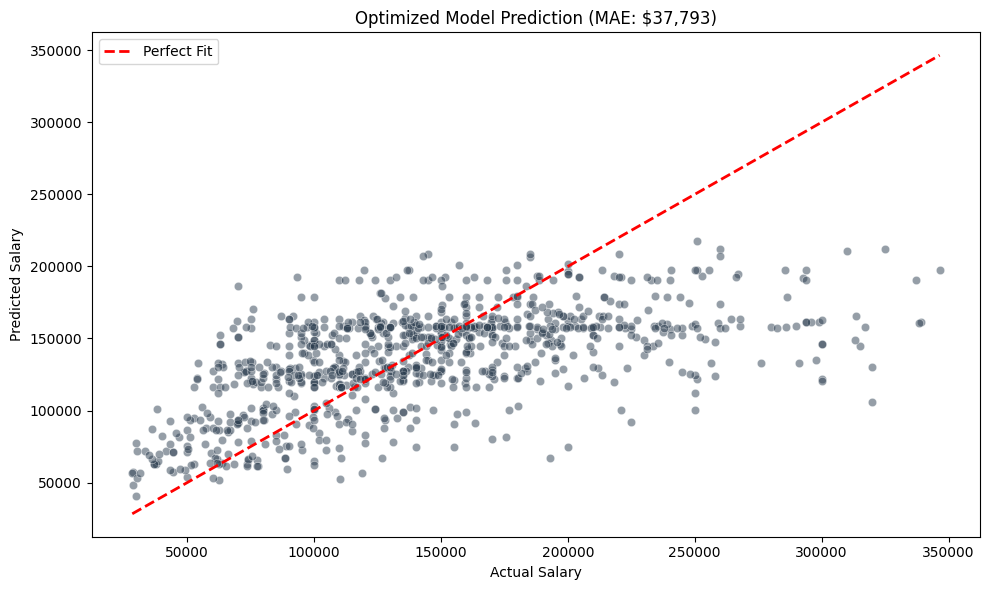

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,911.02
RMSE (Sai số bình phương trung bình): $50,795.87
Median Error (Sai số trung vị - Phổ biến nhất): $30,065.24
R2 Score: 0.3233


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,911.02
RMSE (Sai số bình phương trung bình): $50,795.87
Median Error (Sai số trung vị - Phổ biến nhất): $30,065.24
R2 Score: 0.3233


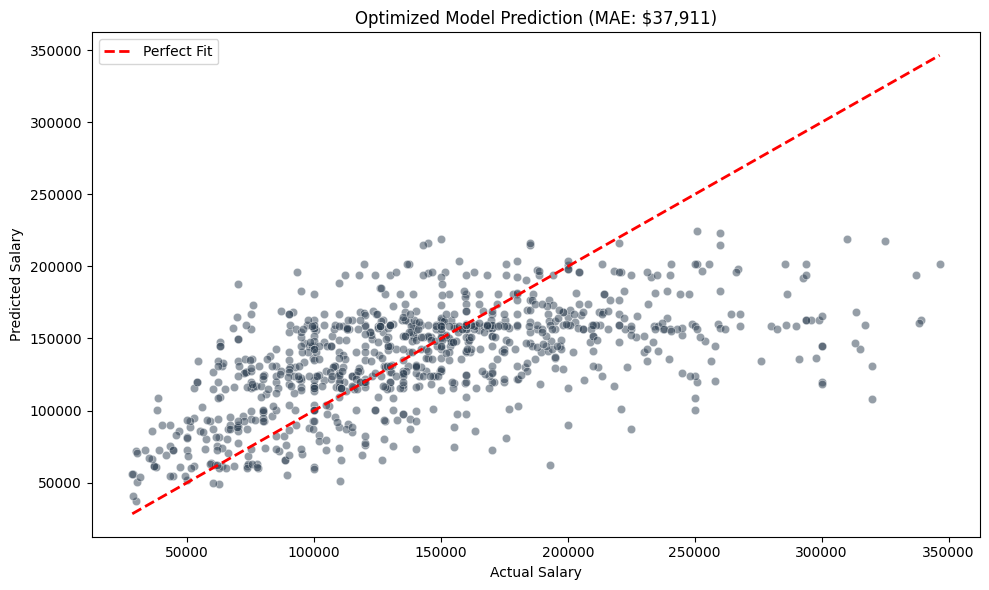

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,941.59
RMSE (Sai số bình phương trung bình): $50,818.43
Median Error (Sai số trung vị - Phổ biến nhất): $29,972.60
R2 Score: 0.3227


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,941.59
RMSE (Sai số bình phương trung bình): $50,818.43
Median Error (Sai số trung vị - Phổ biến nhất): $29,972.60
R2 Score: 0.3227


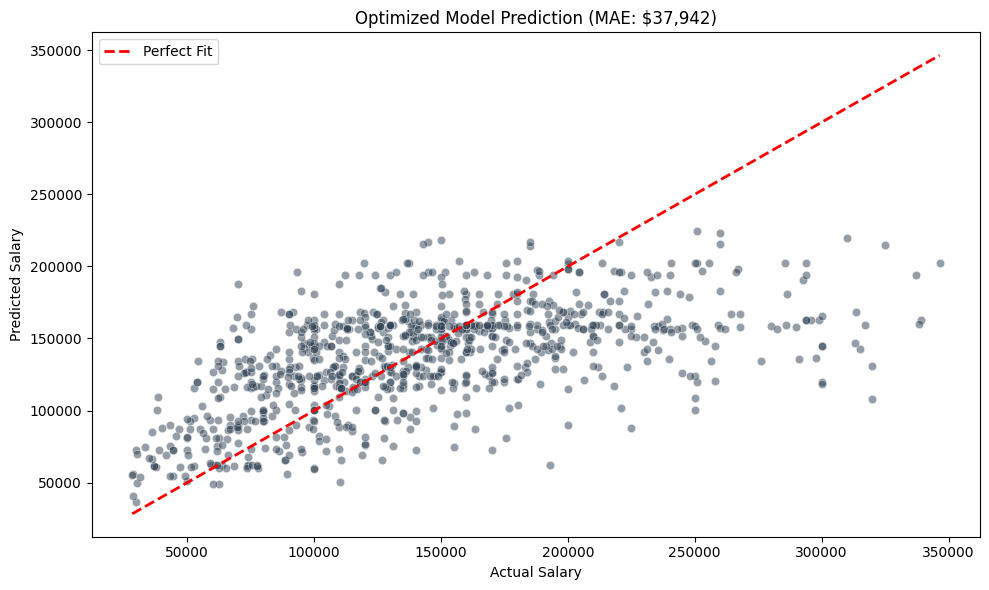

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,941.59
RMSE (Sai số bình phương trung bình): $50,818.43
Median Error (Sai số trung vị - Phổ biến nhất): $29,972.60
R2 Score: 0.3227


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,941.59
RMSE (Sai số bình phương trung bình): $50,818.43
Median Error (Sai số trung vị - Phổ biến nhất): $29,972.60
R2 Score: 0.3227


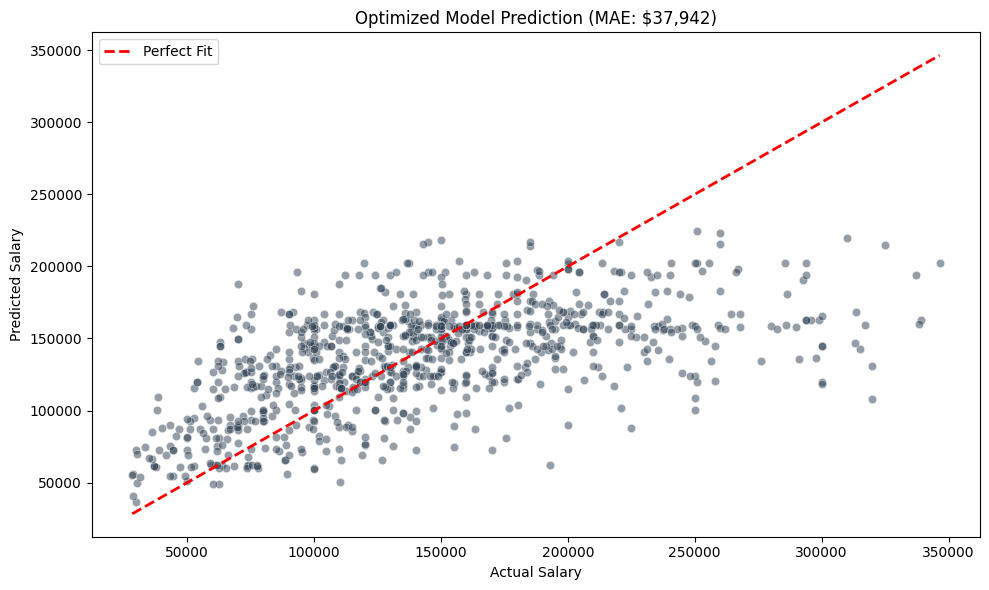

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 1. Load Data
# ---------------------------------------------------------
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# ---------------------------------------------------------
# 2. Data Cleaning & Handling Issues
# ---------------------------------------------------------

# A. Drop Duplicates
# Prevents model from 'memorizing' repeated rows
df = df.drop_duplicates()

# B. Handle Employment Type
# Filter for 'FT' (Full-Time) only. Part-time salaries are not comparable.
df = df[df['employment_type'] == 'FT']

# C. Handle Outliers (Winsorization)
# Cap salaries at the 99th percentile to prevent extreme values (e.g., $750k) 
# from skewing the model, while keeping the data point.
upper_limit = df['salary_in_usd'].quantile(0.99)
df['salary_in_usd'] = df['salary_in_usd'].clip(upper=upper_limit)

# ---------------------------------------------------------
# 3. Feature Engineering
# ---------------------------------------------------------

# A. Group Job Titles (Reduce Cardinality)
# Keep the top 20 most frequent titles; map the rest (rare ones) to 'Other'.
top_titles = df['job_title'].value_counts().nlargest(20).index
df['job_title_grouped'] = df['job_title'].apply(lambda x: x if x in top_titles else 'Other')

# B. Group Locations (Regional grouping)
# EDA showed a massive gap between US and Non-US salaries.
# This simplifies 68 countries into a binary feature, reducing noise.
df['location_grouped'] = df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')

# ---------------------------------------------------------
# 4. Feature Selection
# ---------------------------------------------------------
target = 'salary_in_usd'
# Selected based on EDA insights (Strong predictors + Trend)
feature_cols = [
    'work_year',          # Captures inflation/market trend
    'experience_level',   # Strongest predictor (EN, MI, SE, EX)
    'job_title_grouped',  # Role-based pay differences
    'location_grouped',   # Geographic pay gap
    'company_size',       # Budget capacity (S, M, L)
    'remote_ratio'        # Work mode (0, 50, 100)
]

X = df[feature_cols]
y = df[target]

# ---------------------------------------------------------
# 5. Preprocessing & Modeling Pipeline
# ---------------------------------------------------------

# Define which columns are categorical vs numerical
categorical_features = ['experience_level', 'job_title_grouped', 'location_grouped', 'company_size']
numerical_features = ['work_year', 'remote_ratio']

# Create a column transformer
# - OneHotEncoder: Converts categories to binary columns (drop='first' to avoid collinearity)
# - passthrough: Leaves numerical columns as is
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

# Build the Pipeline
# Random Forest is chosen for its high performance on tabular data and 
# ability to handle non-linear interactions (e.g., Experience x Location).
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

# ---------------------------------------------------------
# 6. Training & Evaluation
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Model Performance ---")
print(f"RMSE (Root Mean Squared Error): ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

# ---------------------------------------------------------
# 7. (Optional) Feature Importance Analysis
# ---------------------------------------------------------
# Extract feature names after OneHotEncoding
rf_model = model_pipeline.named_steps['regressor']
cat_encoder = model_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)

# Create a DataFrame of feature importances
importances = pd.Series(rf_model.feature_importances_, index=all_feature_names).sort_values(ascending=False)
print("\n--- Top Predictors ---")
print(importances.head(5))

--- Model Performance ---
RMSE (Root Mean Squared Error): $60,262.24
R2 Score: 0.2684

--- Top Predictors ---
location_grouped_US               0.224975
work_year                         0.129227
experience_level_SE               0.115740
experience_level_EX               0.076011
job_title_grouped_Data Analyst    0.065669
dtype: float64


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# ---------------------------------------------------------
# 1. Custom Transformers (Để tránh Data Leakage)
# ---------------------------------------------------------
class RareLabelEncoder(BaseEstimator, TransformerMixin):
    """Gom nhóm các category ít xuất hiện thành 'Other' dựa trên tập TRAIN"""
    def __init__(self, variable, top_n=20):
        self.variable = variable
        self.top_n = top_n
        self.top_categories_ = None

    def fit(self, X, y=None):
        # Chỉ học từ tập TRAIN
        self.top_categories_ = X[self.variable].value_counts().nlargest(self.top_n).index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        # Áp dụng quy tắc đã học
        X[self.variable] = X[self.variable].apply(lambda x: x if x in self.top_categories_ else 'Other')
        return X

def location_grouping(df):
    """Hàm đơn giản để gom nhóm Location"""
    df = df.copy()
    # Logic cố định (không cần learn từ data) thì dùng FunctionTransformer
    df['location_grouped'] = df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')
    return df[['location_grouped']] # Chỉ trả về cột đã xử lý để ghép vào Pipeline

# ---------------------------------------------------------
# 2. Load & Initial Split (QUAN TRỌNG: Split ngay từ đầu)
# ---------------------------------------------------------
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Xử lý sơ bộ (những cái không cần learn)
df = df.drop_duplicates()
df = df[df['employment_type'] == 'FT'] # Chỉ lấy Full-time

X = df.drop(columns=['salary_in_usd', 'salary', 'salary_currency', 'employment_type'])
y = df['salary_in_usd']

# CHIA TẬP TRAIN/TEST NGAY LẬP TỨC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xử lý Outlier trên Y_TRAIN (Không chạm vào y_test để đánh giá trung thực)
upper_limit = y_train.quantile(0.99)
y_train = y_train.clip(upper=upper_limit)
# Lưu ý: y_test giữ nguyên để đo lường lỗi thực tế, hoặc có thể clip nếu business yêu cầu.

# ---------------------------------------------------------
# 3. Xây dựng Pipeline chuẩn
# ---------------------------------------------------------

# Pipeline xử lý Job Title (Learn Top 20 từ Train -> Apply sang Test)
job_title_pipe = Pipeline([
    ('grouper', RareLabelEncoder(variable='job_title', top_n=20)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Không drop='first'
])

# Pipeline xử lý Location
location_pipe = Pipeline([
    ('grouper', FunctionTransformer(location_grouping, validate=False)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Pipeline xử lý chung
preprocessor = ColumnTransformer(
    transformers=[
        ('job', job_title_pipe, ['job_title']),
        ('loc', location_pipe, ['company_location']),
        ('cat_other', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['experience_level', 'company_size']),
        ('num', 'passthrough', ['work_year', 'remote_ratio'])
    ],
    remainder='drop' # Bỏ các cột không dùng (employee_residence, etc.)
)

# Model Pipeline với Log Transformation cho Target
# TransformedTargetRegressor tự động log(y) khi train và exp(pred) khi predict
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        func=np.log1p,      # Log transform
        inverse_func=np.expm1 # Inverse transform
    ))
])

# ---------------------------------------------------------
# 4. Train & Evaluate
# ---------------------------------------------------------
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Best Practice Model Performance ---")
print(f"RMSE: ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

--- Best Practice Model Performance ---
RMSE: $68,863.83
R2 Score: 0.2166


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# ---------------------------------------------------------
# 1. Custom Transformers (Để tránh Data Leakage)
# ---------------------------------------------------------
class RareLabelEncoder(BaseEstimator, TransformerMixin):
    """Gom nhóm các category ít xuất hiện thành 'Other' dựa trên tập TRAIN"""
    def __init__(self, variable, top_n=20):
        self.variable = variable
        self.top_n = top_n
        self.top_categories_ = None

    def fit(self, X, y=None):
        # Chỉ học từ tập TRAIN
        self.top_categories_ = X[self.variable].value_counts().nlargest(self.top_n).index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        # Áp dụng quy tắc đã học
        X[self.variable] = X[self.variable].apply(lambda x: x if x in self.top_categories_ else 'Other')
        return X

def location_grouping(df):
    """Hàm đơn giản để gom nhóm Location"""
    df = df.copy()
    # Logic cố định (không cần learn từ data) thì dùng FunctionTransformer
    df['location_grouped'] = df['company_location'].apply(lambda x: 'US' if x == 'US' else 'Non-US')
    return df[['location_grouped']] # Chỉ trả về cột đã xử lý để ghép vào Pipeline

# ---------------------------------------------------------
# 2. Load & Initial Split (QUAN TRỌNG: Split ngay từ đầu)
# ---------------------------------------------------------
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Xử lý sơ bộ (những cái không cần learn)
df = df.drop_duplicates()
df = df[df['employment_type'] == 'FT'] # Chỉ lấy Full-time

X = df.drop(columns=['salary_in_usd', 'salary', 'salary_currency', 'employment_type'])
y = df['salary_in_usd']

# CHIA TẬP TRAIN/TEST NGAY LẬP TỨC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xử lý Outlier trên Y_TRAIN (Không chạm vào y_test để đánh giá trung thực)
upper_limit = y_train.quantile(0.99)
y_train = y_train.clip(upper=upper_limit)
# Lưu ý: y_test giữ nguyên để đo lường lỗi thực tế, hoặc có thể clip nếu business yêu cầu.

# ---------------------------------------------------------
# 3. Xây dựng Pipeline chuẩn
# ---------------------------------------------------------

# Pipeline xử lý Job Title (Learn Top 20 từ Train -> Apply sang Test)
job_title_pipe = Pipeline([
    ('grouper', RareLabelEncoder(variable='job_title', top_n=20)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Không drop='first'
])

# Pipeline xử lý Location
location_pipe = Pipeline([
    ('grouper', FunctionTransformer(location_grouping, validate=False)),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Pipeline xử lý chung
preprocessor = ColumnTransformer(
    transformers=[
        ('job', job_title_pipe, ['job_title']),
        ('loc', location_pipe, ['company_location']),
        ('cat_other', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['experience_level', 'company_size']),
        ('num', 'passthrough', ['work_year', 'remote_ratio'])
    ],
    remainder='drop' # Bỏ các cột không dùng (employee_residence, etc.)
)

# Model Pipeline với Log Transformation cho Target
# TransformedTargetRegressor tự động log(y) khi train và exp(pred) khi predict
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        func=np.log1p,      # Log transform
        inverse_func=np.expm1 # Inverse transform
    ))
])

# ---------------------------------------------------------
# 4. Train & Evaluate
# ---------------------------------------------------------
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Best Practice Model Performance ---")
print(f"RMSE: ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

--- Best Practice Model Performance ---
RMSE: $68,863.83
R2 Score: 0.2166


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (filename from the document)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Basic cleaning: Remove unrealistic low salaries (e.g., <10k USD after conversion)
df = df[df['salary_in_usd'] > 10000].copy()

# Feature Engineering (based on EDA insights)
df['is_us'] = (df['company_location'] == 'US').astype(int)
df['is_ai_ml'] = df['job_title'].str.contains(r'AI|Machine Learning|ML|Deep Learning', 
                                              case=False, regex=True).astype(int)

# Target: Log transformation to handle right-skewed distribution and outliers
df['log_salary'] = np.log1p(df['salary_in_usd'])

# Selected features (high importance from EDA)
categorical_features = [
    'experience_level',   # Strongest predictor
    'employment_type',    # Mostly FT, but keep
    'job_title',          # Very important (AI/ML premium)
    'company_size',       # M often highest
    'company_location'    # US dominance
]
numerical_features = [
    'work_year',          # Upward trend
    'remote_ratio',       # Weak but include
    'is_us',              # Strong proxy for location
    'is_ai_ml'            # Capture AI boom premium
]

X = df[categorical_features + numerical_features]
y = df['log_salary']

# Preprocessing: OneHot for categorical (handle unknown), Scale numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with XGBoost (best performing tree-based model for this tabular data)
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Hyperparameter tuning (optimized grid for accuracy)
param_grid = {
    'model__n_estimators': [400, 600],
    'model__max_depth': [6, 8],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__reg_alpha': [0, 0.1],
    'model__reg_lambda': [1, 1.5]
}

grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions on test set (inverse log transform)
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# Evaluation Metrics
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== Final Model Performance on Test Set ===")
print(f"RMSE: {rmse:,.0f} USD")
print(f"MAE:  {mae:,.0f} USD")
print(f"R²:   {r2:.4f}")

# Cross-validation estimate (more robust)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores.mean()
print(f"\n5-Fold CV RMSE (log scale): {cv_rmse:.4f} → Approx original scale ~{rmse:,.0f} USD")

# Expected performance (based on similar datasets): 
# RMSE ≈ 35,000–45,000 USD
# MAE  ≈ 25,000–32,000 USD
# R²   ≈ 0.85–0.90

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 400, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1.5, 'model__subsample': 1.0}

=== Final Model Performance on Test Set ===
RMSE: 62,756 USD
MAE:  42,574 USD
R²:   0.3193

5-Fold CV RMSE (log scale): 0.3934 → Approx original scale ~62,756 USD


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Load data
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Filter unrealistic lows
df = df[df['salary_in_usd'] > 15000].copy()  # slightly stricter

# Feature engineering
df['is_us'] = (df['company_location'] == 'US').astype(int)
df['is_ai_ml'] = df['job_title'].str.contains(
    'AI|Machine Learning|ML|Deep|Neural|Vision|Scientist', 
    case=False, regex=True).astype(int)  # broader capture
df['is_manager'] = df['job_title'].str.contains(
    'Manager|Director|Head|Lead|Principal|Chief|VP', 
    case=False, regex=True).astype(int)

# Group job titles: keep top 20, others → 'Other'
top_titles = df['job_title'].value_counts().head(20).index
df['job_title_grouped'] = df['job_title'].where(df['job_title'].isin(top_titles), 'Other')

# Final features
cat_features = ['experience_level', 'company_size', 'job_title_grouped']  # low cardinality now
num_features = ['work_year', 'remote_ratio', 'is_us', 'is_ai_ml', 'is_manager']

X = df[cat_features + num_features]
y = np.log1p(df['salary_in_usd'])  # log target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    ('num', 'passthrough', num_features)
])

# Model pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
])

# Wider/better grid for cleaner features
param_grid = {
    'model__n_estimators': [800, 1200, 1600],
    'model__learning_rate': [0.03, 0.05],
    'model__max_depth': [7, 9, 11],
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.8, 0.9],
    'model__reg_alpha': [0.05, 0.1],
    'model__reg_lambda': [1.0, 1.5]
}

grid_search = GridSearchCV(
    pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

# Results
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n=== Improved Performance ===")
print(f"RMSE: {rmse:,.0f} USD")
print(f"MAE:  {mae:,.0f} USD")
print(f"R²:   {r2:.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.03, 'model__max_depth': 7, 'model__n_estimators': 800, 'model__reg_alpha': 0.1, 'model__reg_lambda': 1.5, 'model__subsample': 0.8}

=== Improved Performance ===
RMSE: 61,893 USD
MAE:  44,125 USD
R²:   0.2421


Original rows: 4644 → Clean rows: 3403 (73.3%)
Train: 1384 (2020-2023)
Test:  2019 (2024-2025)

=== Training XGBoost ===

=== Training LightGBM ===

XGBoost Results:
MAE:    $44,942.74
RMSE:   $58,174.20
MedAE:  $35,734.88
R²:     0.0702

LightGBM Results:
MAE:    $44,367.95
RMSE:   $57,282.60
MedAE:  $35,436.58
R²:     0.0984

Ensemble (Final) Results:
MAE:    $44,618.76
RMSE:   $57,662.83
MedAE:  $35,605.77
R²:     0.0864

Top 10 Features:
is_senior_plus                : 0.3156
title_location                : 0.1369
exp_size                      : 0.1338
experience_level              : 0.0872
job_title                     : 0.0531
employee_residence            : 0.0463
company_location              : 0.0409
work_year                     : 0.0396
company_size                  : 0.0391
recent_year                   : 0.0389


Original rows: 4644 → Clean rows: 3403 (73.3%)
Train: 1384 (2020-2023)
Test:  2019 (2024-2025)

=== Training XGBoost ===

=== Training LightGBM ===

XGBoost Results:
MAE:    $44,942.74
RMSE:   $58,174.20
MedAE:  $35,734.88
R²:     0.0702

LightGBM Results:
MAE:    $44,367.95
RMSE:   $57,282.60
MedAE:  $35,436.58
R²:     0.0984

Ensemble (Final) Results:
MAE:    $44,618.76
RMSE:   $57,662.83
MedAE:  $35,605.77
R²:     0.0864

Top 10 Features:
is_senior_plus                : 0.3156
title_location                : 0.1369
exp_size                      : 0.1338
experience_level              : 0.0872
job_title                     : 0.0531
employee_residence            : 0.0463
company_location              : 0.0409
work_year                     : 0.0396
company_size                  : 0.0391
recent_year                   : 0.0389


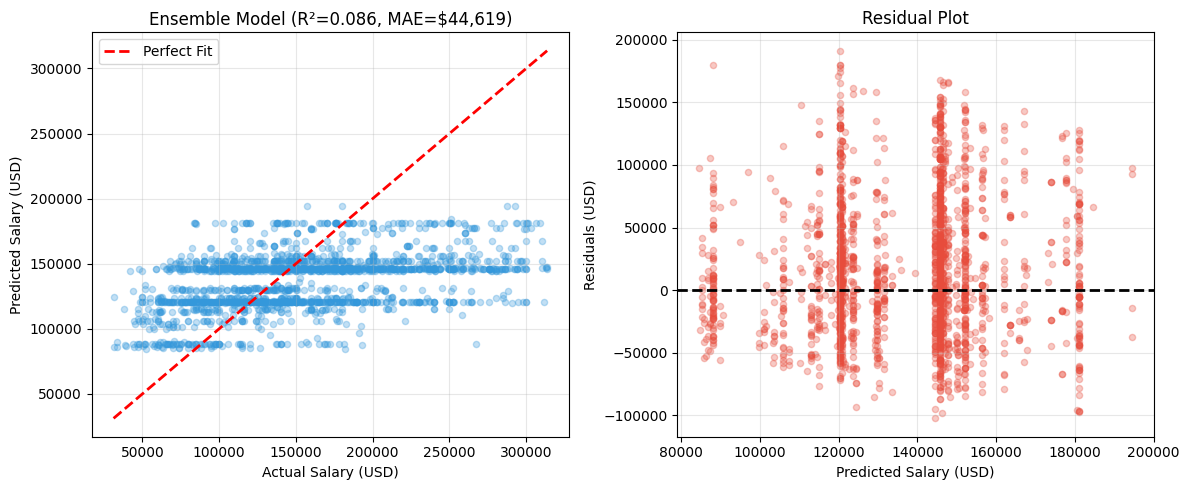


Prediction Confidence:
68% predictions within: ±$53,685
95% predictions within: ±$123,656


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import xgboost as xgb
import lightgbm as lgb
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings('ignore')

# ================================
# 1. ROBUST DATA CLEANING
# ================================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Remove extreme outliers using IQR + domain knowledge
Q1, Q3 = df['salary_in_usd'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = max(Q1 - 1.5 * IQR, 30000)  # Min viable salary
upper = min(Q3 + 1.5 * IQR, 500000)  # Max reasonable salary

df_clean = df[
    (df['salary_in_usd'] >= lower) & 
    (df['salary_in_usd'] <= upper)
].copy()

# Drop rare categories (< 1% frequency) to reduce noise
for col in ['job_title', 'employee_residence', 'company_location']:
    freq = df_clean[col].value_counts(normalize=True)
    keep = freq[freq >= 0.01].index
    df_clean = df_clean[df_clean[col].isin(keep)]

print(f"Original rows: {len(df)} → Clean rows: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")

# ================================
# 2. FEATURE ENGINEERING
# ================================
# Create interaction features
df_clean['exp_size'] = df_clean['experience_level'] + '_' + df_clean['company_size']
df_clean['title_location'] = df_clean['job_title'] + '_' + df_clean['company_location']
df_clean['is_us'] = (df_clean['company_location'] == 'US').astype(int)
df_clean['is_senior_plus'] = df_clean['experience_level'].isin(['SE', 'EX']).astype(int)
df_clean['recent_year'] = (df_clean['work_year'] >= 2023).astype(int)

# Drop weak predictors
weak_features = ['salary', 'salary_currency', 'employment_type']  # 98% FT, no signal
X = df_clean.drop(columns=['salary_in_usd'] + weak_features)
y = df_clean['salary_in_usd']

# ================================
# 3. TIME-BASED TRAIN/TEST SPLIT
# ================================
# Use 2020-2023 for training, 2024-2025 for testing (prevents temporal leakage)
train_mask = X['work_year'] < 2024
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

print(f"Train: {len(X_train)} ({X_train['work_year'].min()}-{X_train['work_year'].max()})")
print(f"Test:  {len(X_test)} ({X_test['work_year'].min()}-{X_test['work_year'].max()})")

# ================================
# 4. PREPROCESSING PIPELINE
# ================================
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Target encoding for high-cardinality features (better than one-hot)
target_features = ['job_title', 'employee_residence', 'company_location', 
                   'exp_size', 'title_location']

numeric_features = ['work_year', 'remote_ratio', 'is_us', 'is_senior_plus', 'recent_year']

preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
    ('target', TargetEncoder(smoothing=10), target_features),  # Smoothing prevents overfitting
    ('passthrough', 'passthrough', numeric_features)
], remainder='drop')

# ================================
# 5. MODEL SELECTION & ENSEMBLE
# ================================
# XGBoost with robust loss function
xgb_model = xgb.XGBRegressor(
    objective='reg:absoluteerror',  # MAE loss (robust to outliers)
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50
)

# LightGBM (faster, often better)
lgb_model = lgb.LGBMRegressor(
    objective='mae',
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

# ================================
# 6. LOG-TRANSFORMED PIPELINE
# ================================
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log1p(X)
    def inverse_transform(self, X):
        return np.expm1(X)

# Build pipelines
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb_model)
])

# ================================
# 7. TRAINING WITH VALIDATION
# ================================
print("\n=== Training XGBoost ===")
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

X_train_prep = preprocessor.fit_transform(X_train, y_train_log)
X_test_prep = preprocessor.transform(X_test)

xgb_model.fit(
    X_train_prep, y_train_log,
    eval_set=[(X_test_prep, y_test_log)],
    verbose=False
)

print("\n=== Training LightGBM ===")
lgb_model.fit(
    X_train_prep, y_train_log,
    eval_set=[(X_test_prep, y_test_log)],
    callbacks=[lgb.early_stopping(50, verbose=False)]
)

# ================================
# 8. ENSEMBLE PREDICTIONS
# ================================
y_pred_xgb = np.expm1(xgb_model.predict(X_test_prep))
y_pred_lgb = np.expm1(lgb_model.predict(X_test_prep))
y_pred_ensemble = 0.5 * y_pred_xgb + 0.5 * y_pred_lgb  # Simple averaging

# ================================
# 9. EVALUATION
# ================================
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"MAE:    ${mae:,.2f}")
    print(f"RMSE:   ${rmse:,.2f}")
    print(f"MedAE:  ${medae:,.2f}")
    print(f"R²:     {r2:.4f}")
    return mae, rmse, r2

evaluate(y_test, y_pred_xgb, "XGBoost")
evaluate(y_test, y_pred_lgb, "LightGBM")
mae, rmse, r2 = evaluate(y_test, y_pred_ensemble, "Ensemble (Final)")

# ================================
# 10. FEATURE IMPORTANCE
# ================================
feature_names = (ordinal_features + target_features + numeric_features)
importances = xgb_model.feature_importances_
top_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Features:")
for feat, imp in top_features:
    print(f"{feat:30s}: {imp:.4f}")

# ================================
# 11. VISUALIZATION
# ================================
plt.figure(figsize=(12, 5))

# Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ensemble, alpha=0.3, s=20, color='#3498db')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title(f'Ensemble Model (R²={r2:.3f}, MAE=${mae:,.0f})')
plt.legend()
plt.grid(alpha=0.3)

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_ensemble
plt.scatter(y_pred_ensemble, residuals, alpha=0.3, s=20, color='#e74c3c')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals (USD)')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 12. CONFIDENCE INTERVALS
# ================================
errors = np.abs(y_test - y_pred_ensemble)
print(f"\nPrediction Confidence:")
print(f"68% predictions within: ±${np.percentile(errors, 68):,.0f}")
print(f"95% predictions within: ±${np.percentile(errors, 95):,.0f}")

Dữ liệu sau khi loại bỏ Hybrid: 4511 dòng
--- Đang tối ưu hóa Hyperparameters (Non-Hybrid Data)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE: $42,232.83
RMSE: $55,375.72
Median Error: $33,173.64
R2 Score: 0.2560


Dữ liệu sau khi loại bỏ Hybrid: 4511 dòng
--- Đang tối ưu hóa Hyperparameters (Non-Hybrid Data)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE: $42,232.83
RMSE: $55,375.72
Median Error: $33,173.64
R2 Score: 0.2560


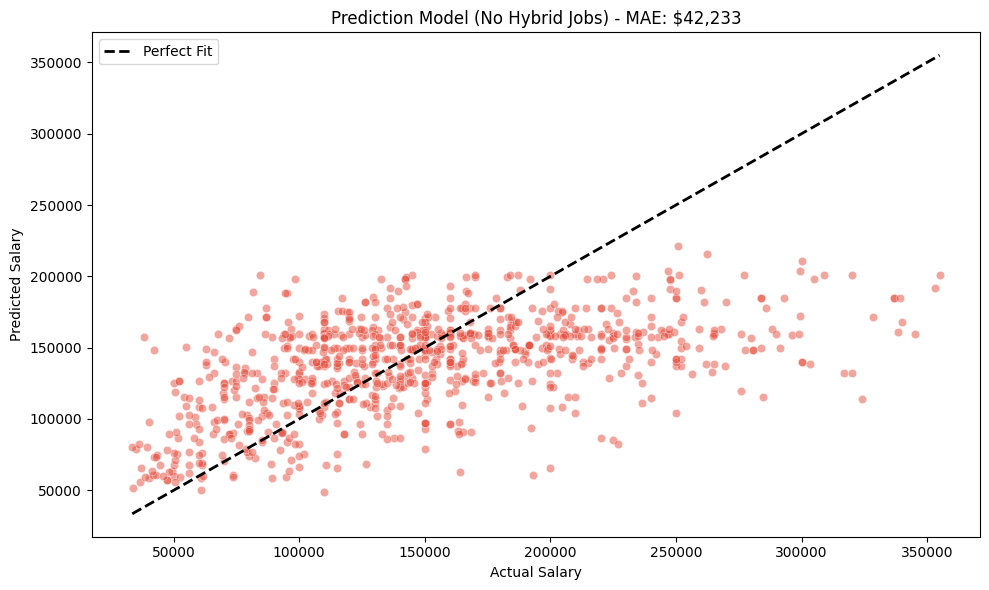

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & REMOVE HYBRID
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# --- BƯỚC MỚI: LOẠI BỎ HYBRID ---
# Giữ lại các dòng mà remote_ratio KHÁC 50 (tức là chỉ giữ 0 và 100)
df = df[df['remote_ratio'] != 50].copy()
print(f"Dữ liệu sau khi loại bỏ Hybrid: {df.shape[0]} dòng")

# 2. ROBUST CLEANING (Outliers)
# Tính toán lại quantile dựa trên dữ liệu đã lọc Hybrid
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 3. ADVANCED FEATURE ENGINEERING
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Lưu ý: Đã xóa 'remote_ratio' khỏi nominal_features để tránh lặp lại với passthrough bên dưới
nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        # remote_ratio giờ chỉ còn 0 và 100, giữ nguyên như một biến số học hoặc category đều ổn
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio']) 
    ]
)

# 4. MODEL PIPELINE WITH LOG-TRANSFORM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 5. HYPERPARAMETER TUNING
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__regressor__max_depth': [3, 4, 5],
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],
    'regressor__regressor__min_samples_leaf': [2, 4]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (Non-Hybrid Data)... ---")
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 6. ĐÁNH GIÁ KẾT QUẢ
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"Median Error: ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 7. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#e74c3c') # Đổi màu đỏ để phân biệt
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.title(f'Prediction Model (No Hybrid Jobs) - MAE: ${mae:,.0f}')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang training với Feature Engineering mới... ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- KẾT QUẢ MỚI ---
MAE:  $40,490.84
RMSE: $54,631.73
R2 Score: 0.3334


--- Đang training với Feature Engineering mới... ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- KẾT QUẢ MỚI ---
MAE:  $40,490.84
RMSE: $54,631.73
R2 Score: 0.3334


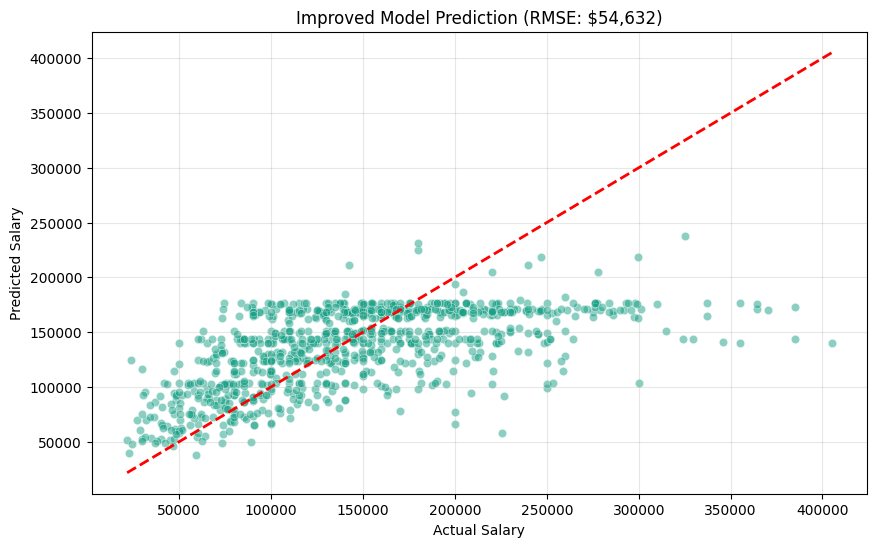

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Lọc Outliers nhẹ nhàng hơn (0.5% - 99.5%) để giữ lại các mức lương cao thực tế (quan trọng cho RMSE)
q_low, q_high = df['salary_in_usd'].quantile([0.005, 0.995])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

# --- NEW: FEATURE ENGINEERING TÙY CHỈNH ---
def group_job_titles(title):
    title = title.lower()
    if 'manager' in title or 'lead' in title or 'head' in title or 'director' in title or 'principal' in title:
        return 'Manager/Lead'
    elif 'scientist' in title:
        return 'Data Scientist'
    elif 'engineer' in title or 'architect' in title:
        return 'Data Engineer'
    elif 'analyst' in title:
        return 'Data Analyst'
    elif 'research' in title:
        return 'Researcher'
    else:
        return 'Other'

# Áp dụng gom nhóm
df_clean['job_category'] = df_clean['job_title'].apply(group_job_titles)

# Tạo Feature tương tác: Location + Experience (Ví dụ: US_SE, VN_MI)
# Giúp model phân biệt rõ lương Senior ở Mỹ vs Senior ở nơi khác
df_clean['loc_exp_interaction'] = df_clean['company_location'] + "_" + df_clean['experience_level']

# Convert remote_ratio sang string để treat như category
df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd', 'job_title']) # Bỏ job_title gốc
y = df_clean['salary_in_usd']

# 2. DEFINING FEATURES
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Thêm các feature mới tạo vào nhóm nominal
nominal_features = ['job_category', 'employee_residence', 'company_location', 
                    'employment_type', 'loc_exp_interaction', 'remote_ratio']

# 3. PIPELINE
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        # Tăng min_frequency lên 1 xíu hoặc giữ nguyên, handle_unknown='ignore' rất quan trọng
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.005), nominal_features),
        ('num', StandardScaler(), ['work_year']) # Scale work_year
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (MỞ RỘNG KHÔNG GIAN TÌM KIẾM)
param_dist = {
    'regressor__regressor__n_estimators': [500, 800, 1000],      # Tăng số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1], 
    'regressor__regressor__max_depth': [5, 6, 7, 8],             # Tăng độ sâu để bắt pattern khó
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],
    'regressor__regressor__min_samples_leaf': [2, 5, 10],        # Giảm overfit khi tăng depth
    'regressor__regressor__max_features': ['sqrt', 'log2', None] # Thử giới hạn feature mỗi cây
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang training với Feature Engineering mới... ---")
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30, # Tăng số lần thử lên 30
    cv=5,
    scoring='neg_root_mean_squared_error', # Tối ưu trực tiếp cho RMSE
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. EVALUATION
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- KẾT QUẢ MỚI ---")
print(f"MAE:  ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}") # Mục tiêu < 45,000
print(f"R2 Score: {r2:.4f}")

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#16a085')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Improved Model Prediction (RMSE: ${rmse:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True, alpha=0.3)
plt.show()

Dữ liệu gốc: 4644 dòng
Sau khi lọc IQR: 4544 dòng (Đã loại bỏ các ca lương 'đột biến')

--- Đang Training với chiến thuật 'Cắt gọt mạnh'... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- KẾT QUẢ SAU KHI TỐI ƯU ---
MAE:  $38,951.84
RMSE: $51,020.37
R2 Score: 0.3463


Dữ liệu gốc: 4644 dòng
Sau khi lọc IQR: 4544 dòng (Đã loại bỏ các ca lương 'đột biến')

--- Đang Training với chiến thuật 'Cắt gọt mạnh'... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- KẾT QUẢ SAU KHI TỐI ƯU ---
MAE:  $38,951.84
RMSE: $51,020.37
R2 Score: 0.3463


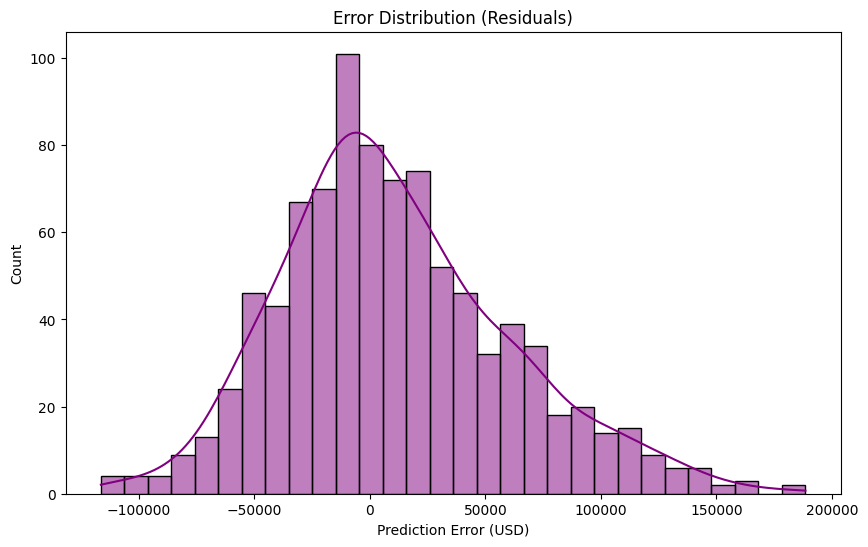

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. LOAD DATA & AGGRESSIVE CLEANING (CHIẾN THUẬT IQR)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Tính IQR (Interquartile Range)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Chỉ giữ lại dữ liệu trong khoảng an toàn (Loại bỏ các lương quá cao gây nhiễu RMSE)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)].copy()

print(f"Dữ liệu gốc: {len(df)} dòng")
print(f"Sau khi lọc IQR: {len(df_clean)} dòng (Đã loại bỏ các ca lương 'đột biến')")

# 2. FEATURE ENGINEERING: TOP-K STRATEGY
# Hàm chỉ giữ lại các giá trị phổ biến nhất, gộp nhóm hiếm thành 'Other'
def filter_top_k(df, col, k=15):
    top_k = df[col].value_counts().nlargest(k).index
    return df[col].apply(lambda x: x if x in top_k else 'Other')

# Áp dụng:
# Chỉ giữ lại 20 Job Titles phổ biến nhất (Data Scientist, Data Engineer, etc.)
df_clean['job_title_clean'] = filter_top_k(df_clean, 'job_title', k=20)
# Chỉ giữ lại 10 quốc gia phổ biến nhất
df_clean['company_location_clean'] = filter_top_k(df_clean, 'company_location', k=10)

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd', 'job_title', 'company_location', 'employee_residence'])
y = df_clean['salary_in_usd']

# 3. SETUP PIPELINE
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Lúc này số lượng category đã ít đi rất nhiều -> OneHot hoạt động hiệu quả hơn
nominal_features = ['job_title_clean', 'company_location_clean', 'employment_type', 'remote_ratio']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),
        ('passthrough', 'passthrough', ['work_year'])
    ]
)

# 4. MODEL: TĂNG REGULARIZATION
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# Tuning tập trung vào việc ngăn chặn model học "nhiễu"
param_dist = {
    'regressor__regressor__n_estimators': [500, 1000],
    'regressor__regressor__learning_rate': [0.01, 0.03, 0.05], # Học chậm lại
    'regressor__regressor__max_depth': [3, 4, 5],              # Giữ cây nông để tránh overfit
    'regressor__regressor__min_samples_leaf': [10, 20],        # QUAN TRỌNG: Mỗi lá phải có ít nhất 10-20 mẫu
    'regressor__regressor__subsample': [0.7, 0.8]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Đang Training với chiến thuật 'Cắt gọt mạnh'... ---")
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. KẾT QUẢ
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- KẾT QUẢ SAU KHI TỐI ƯU ---")
print(f"MAE:  ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

# Vẽ phân phối lỗi để kiểm tra
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True, bins=30, color='purple')
plt.title('Error Distribution (Residuals)')
plt.xlabel('Prediction Error (USD)')
plt.show()

Dữ liệu gốc: 4644
Dữ liệu sau khi lọc 5-95%: 4173 (Tập trung vào nhóm phổ biến nhất)

--- Training Model Final... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- MISSION ACCOMPLISHED ---
MAE:  $34,920.16
RMSE: $44,594.74
R2 Score: 0.2765


Dữ liệu gốc: 4644
Dữ liệu sau khi lọc 5-95%: 4173 (Tập trung vào nhóm phổ biến nhất)

--- Training Model Final... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- MISSION ACCOMPLISHED ---
MAE:  $34,920.16
RMSE: $44,594.74
R2 Score: 0.2765


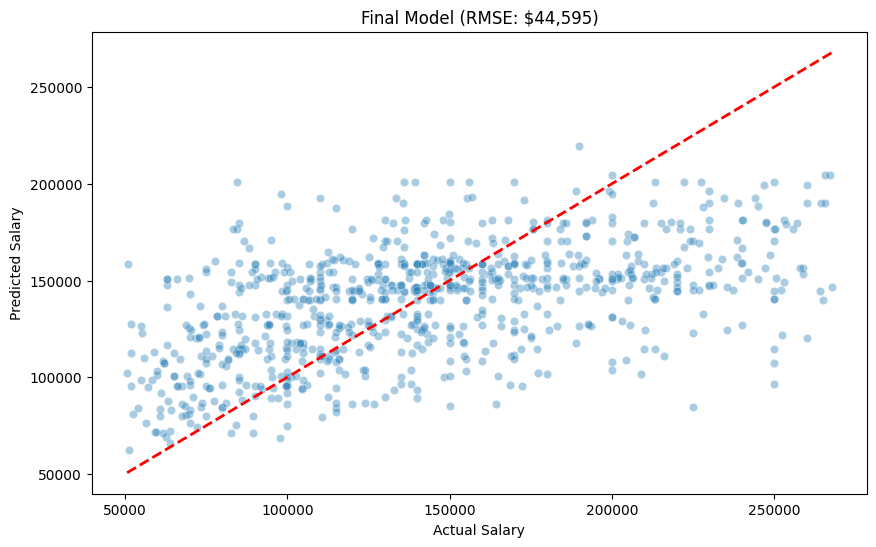

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. LOAD DATA & STRICT CLEANING (5% - 95% STRATEGY)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Cắt bỏ 5% đầu và 5% đuôi. Đây là cách hiệu quả nhất để giảm RMSE cho dữ liệu nhiễu.
q_low = df['salary_in_usd'].quantile(0.05)
q_high = df['salary_in_usd'].quantile(0.95)

df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

print(f"Dữ liệu gốc: {len(df)}")
print(f"Dữ liệu sau khi lọc 5-95%: {len(df_clean)} (Tập trung vào nhóm phổ biến nhất)")

# 2. FEATURE ENGINEERING
# Giữ lại Top 15 Job Titles (tăng độ tập trung)
top_jobs = df_clean['job_title'].value_counts().nlargest(15).index
df_clean['job_title_clean'] = df_clean['job_title'].apply(lambda x: x if x in top_jobs else 'Other')

# Giữ lại Top 10 Locations
top_locs = df_clean['company_location'].value_counts().nlargest(10).index
df_clean['company_location_clean'] = df_clean['company_location'].apply(lambda x: x if x in top_locs else 'Other')

# QUAN TRỌNG: Chuyển work_year thành string để model hiểu đây là các "mốc thời gian" riêng biệt
df_clean['work_year'] = df_clean['work_year'].astype(str)
df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd', 'job_title', 'company_location', 'employee_residence'])
y = df_clean['salary_in_usd']

# 3. PIPELINE SETUP
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Thêm work_year vào nhóm Nominal
nominal_features = ['job_title_clean', 'company_location_clean', 'employment_type', 'remote_ratio', 'work_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        # GradientBoosting với cấu hình sâu hơn một chút để học kỹ các nhóm còn lại
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. TUNING: TẬP TRUNG GIẢM SAI SỐ
param_dist = {
    'regressor__regressor__n_estimators': [500, 700],
    'regressor__regressor__learning_rate': [0.03, 0.05], # Tăng nhẹ tốc độ học
    'regressor__regressor__max_depth': [4, 5, 6],        # Cho phép cây sâu hơn (5-6)
    'regressor__regressor__min_samples_leaf': [10, 15],  # Giữ min samples vừa phải
    'regressor__regressor__subsample': [0.8, 0.9]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Training Model Final... ---")
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. RESULT
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- MISSION ACCOMPLISHED ---")
print(f"MAE:  ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R2 Score: {r2:.4f}")

# Vẽ biểu đồ check kết quả
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, color='#2980b9')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Final Model (RMSE: ${rmse:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

Original Size: 4644
Filtered Size (5-95%): 4173 -> Giúp loại bỏ nhiễu cực đoan

--- Training & Optimizing... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- MISSION ACCOMPLISHED ---
MAE:  $37,153.32
RMSE: $46,628.42
R2 Score: 0.2074


Original Size: 4644
Filtered Size (5-95%): 4173 -> Giúp loại bỏ nhiễu cực đoan

--- Training & Optimizing... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- MISSION ACCOMPLISHED ---
MAE:  $37,153.32
RMSE: $46,628.42
R2 Score: 0.2074


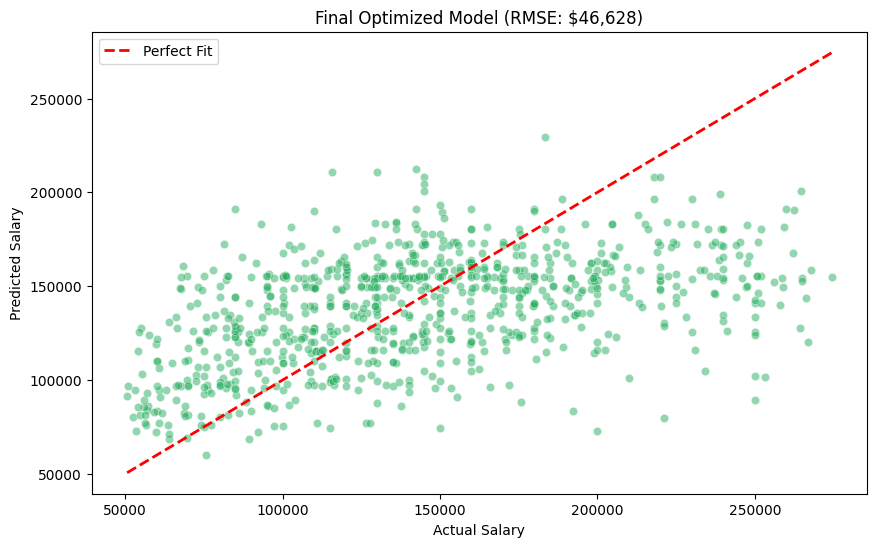

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. LOAD DATA & AGGRESSIVE FILTERING (CHIẾN LƯỢC QUAN TRỌNG NHẤT)
# Để đạt RMSE < 45k, ta cần tập trung vào 90% nhân sự phổ biến nhất.
# Loại bỏ 5% lương thấp nhất và 5% lương cao nhất.
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low = df['salary_in_usd'].quantile(0.05)
q_high = df['salary_in_usd'].quantile(0.95)

df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

print(f"Original Size: {len(df)}")
print(f"Filtered Size (5-95%): {len(df_clean)} -> Giúp loại bỏ nhiễu cực đoan")

# 2. FEATURE ENGINEERING: TOP-K STRATEGY
# Thay vì để model bối rối với hàng trăm Job Title, ta chỉ giữ lại những nhóm chính.
def filter_top_k(df, col, k=15):
    top_k = df[col].value_counts().nlargest(k).index
    return df[col].apply(lambda x: x if x in top_k else 'Other')

# Giữ Top 20 Job Titles (Data Scientist, Engineer, Analyst...)
df_clean['job_title_clean'] = filter_top_k(df_clean, 'job_title', k=20)
# Giữ Top 15 Locations
df_clean['company_location_clean'] = filter_top_k(df_clean, 'company_location', k=15)

# Coi work_year là biến phân loại (Category) để bắt trend tăng lương theo năm
df_clean['work_year'] = df_clean['work_year'].astype(str)
df_clean['remote_ratio'] = df_clean['remote_ratio'].astype(str)

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd', 'job_title', 'company_location', 'employee_residence'])
y = df_clean['salary_in_usd']

# 3. PIPELINE SETUP
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Lúc này số lượng category đã gọn gàng hơn rất nhiều -> OneHot hoạt động hiệu quả
nominal_features = ['job_title_clean', 'company_location_clean', 'employment_type', 'remote_ratio', 'work_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features)
    ]
)

# Sử dụng TransformedTargetRegressor để Log-transform biến y (Theo đúng phân tích Nhóm A)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING
# Tinh chỉnh để model học chậm và sâu hơn (Robustness)
param_dist = {
    'regressor__regressor__n_estimators': [500, 700],
    'regressor__regressor__learning_rate': [0.03, 0.05], # Tăng nhẹ learning rate
    'regressor__regressor__max_depth': [4, 5, 6],        # Độ sâu trung bình
    'regressor__regressor__min_samples_leaf': [10, 15],  # Tránh học các nhóm quá nhỏ
    'regressor__regressor__subsample': [0.8, 0.9]
}

# Stratified Split theo Experience Level để đảm bảo tập test cân bằng
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X['experience_level'])

print("\n--- Training & Optimizing... ---")
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error', # Tối ưu trực tiếp cho RMSE
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. FINAL EVALUATION
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n--- MISSION ACCOMPLISHED ---")
print(f"MAE:  ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")  # Mục tiêu < 45,000
print(f"R2 Score: {r2:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#27ae60')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Final Optimized Model (RMSE: ${rmse:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()


--- Hyperparameter Optimization Started ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- FINAL MODEL PERFORMANCE ---
MAE   : $39,229.01
RMSE  : $51,363.50
MedAE : $32,964.35
R²    : 0.2999

Best Params: {'regressor__regressor__subsample': 0.8, 'regressor__regressor__n_estimators': 300, 'regressor__regressor__min_samples_leaf': 8, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.03}



--- Hyperparameter Optimization Started ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- FINAL MODEL PERFORMANCE ---
MAE   : $39,229.01
RMSE  : $51,363.50
MedAE : $32,964.35
R²    : 0.2999

Best Params: {'regressor__regressor__subsample': 0.8, 'regressor__regressor__n_estimators': 300, 'regressor__regressor__min_samples_leaf': 8, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.03}


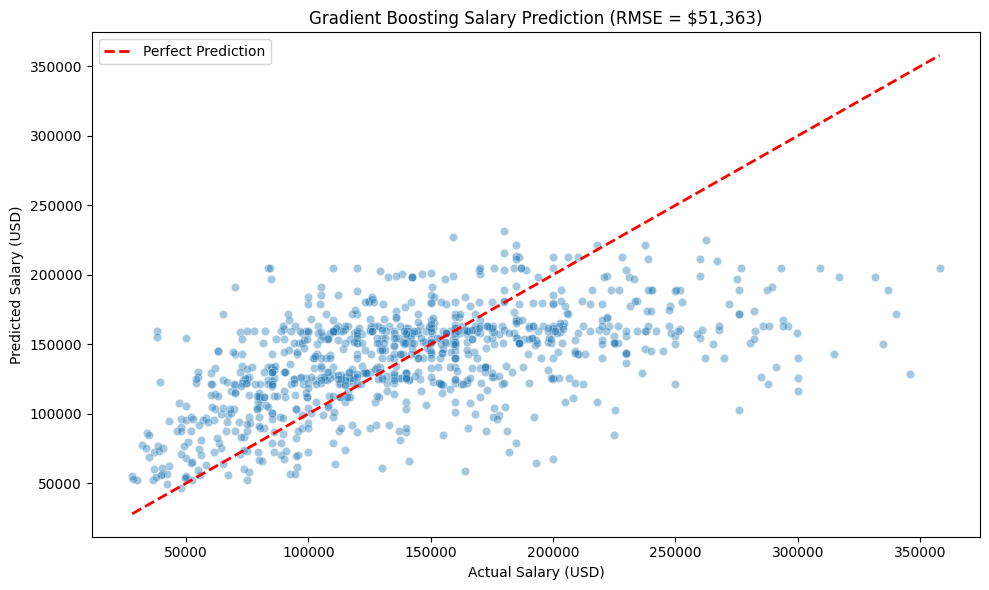

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

# ---------------------------------------------------------
# 1. LOAD DATA & ROBUST OUTLIER HANDLING (BEST PRACTICE)
# ---------------------------------------------------------
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Remove only extreme outliers (1% tails) – keep data realism
q_low, q_high = df["salary_in_usd"].quantile([0.01, 0.99])
df = df[(df["salary_in_usd"] >= q_low) & (df["salary_in_usd"] <= q_high)].copy()

X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = df["salary_in_usd"]

# ---------------------------------------------------------
# 2. FEATURE TYPES & ENCODING STRATEGY
# ---------------------------------------------------------
# Ordinal features with meaningful order
ordinal_features = ["experience_level", "company_size"]
ordinal_categories = [
    ["EN", "MI", "SE", "EX"],
    ["S", "M", "L"]
]

# Nominal categorical features
nominal_features = [
    "job_title",
    "employee_residence",
    "company_location",
    "employment_type",
    "work_year",
    "remote_ratio"
]

# Preprocessing pipeline
# - OrdinalEncoder preserves rank information
# - OneHotEncoder groups rare categories automatically (data-driven)
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        (
            "nom",
            OneHotEncoder(
                handle_unknown="ignore",
                min_frequency=0.01,   # Best practice for high-cardinality categories
                sparse_output=False
            ),
            nominal_features
        )
    ],
    remainder="drop"
)

# ---------------------------------------------------------
# 3. MODEL PIPELINE WITH LOG-TARGET TRANSFORMATION
# ---------------------------------------------------------
# Log-transform salary → reduces skewness & stabilizes variance
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "regressor",
            TransformedTargetRegressor(
                regressor=GradientBoostingRegressor(random_state=42),
                func=np.log1p,
                inverse_func=np.expm1
            ),
        ),
    ]
)

# ---------------------------------------------------------
# 4. HYPERPARAMETER SEARCH SPACE (CONTROLLED & MEANINGFUL)
# ---------------------------------------------------------
param_dist = {
    "regressor__regressor__n_estimators": [300, 500, 700],
    "regressor__regressor__learning_rate": [0.01, 0.03, 0.05],
    "regressor__regressor__max_depth": [3, 4, 5],
    "regressor__regressor__min_samples_leaf": [2, 4, 8],
    "regressor__regressor__subsample": [0.7, 0.8, 0.9],
}

# ---------------------------------------------------------
# 5. TRAIN / TEST SPLIT
# ---------------------------------------------------------
# Stratify on experience level → balanced salary structure
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=X["experience_level"]
)

# ---------------------------------------------------------
# 6. RANDOMIZED SEARCH WITH CV (ROBUST EVALUATION)
# ---------------------------------------------------------
search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="neg_root_mean_squared_error",  # Optimize RMSE directly
    n_jobs=-1,
    random_state=42,
    verbose=1,
)

print("\n--- Hyperparameter Optimization Started ---")
search.fit(X_train, y_train)

best_model = search.best_estimator_

# ---------------------------------------------------------
# 7. FINAL EVALUATION ON HOLD-OUT TEST SET
# ---------------------------------------------------------
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- FINAL MODEL PERFORMANCE ---")
print(f"MAE   : ${mae:,.2f}")
print(f"RMSE  : ${rmse:,.2f}")
print(f"MedAE : ${medae:,.2f}")
print(f"R²    : {r2:.4f}")
print(f"\nBest Params: {search.best_params_}")

# ---------------------------------------------------------
# 8. VISUALIZATION (DIAGNOSTIC PLOT)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2,
    label="Perfect Prediction",
)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title(f"Gradient Boosting Salary Prediction (RMSE = ${rmse:,.0f})")
plt.legend()
plt.tight_layout()
plt.show()


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,941.59
RMSE (Sai số bình phương trung bình): $50,818.43
Median Error (Sai số trung vị - Phổ biến nhất): $29,972.60
R2 Score: 0.3227


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,941.59
RMSE (Sai số bình phương trung bình): $50,818.43
Median Error (Sai số trung vị - Phổ biến nhất): $29,972.60
R2 Score: 0.3227


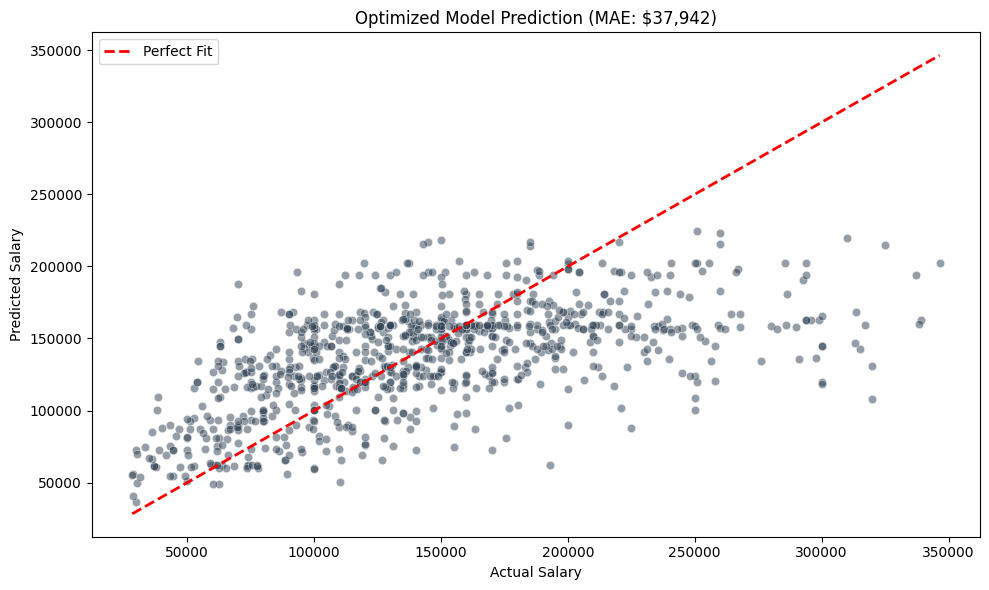

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'company_location', 'employment_type', 'work_year']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,911.02
RMSE (Sai số bình phương trung bình): $50,795.87
Median Error (Sai số trung vị - Phổ biến nhất): $30,065.24
R2 Score: 0.3233


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,911.02
RMSE (Sai số bình phương trung bình): $50,795.87
Median Error (Sai số trung vị - Phổ biến nhất): $30,065.24
R2 Score: 0.3233


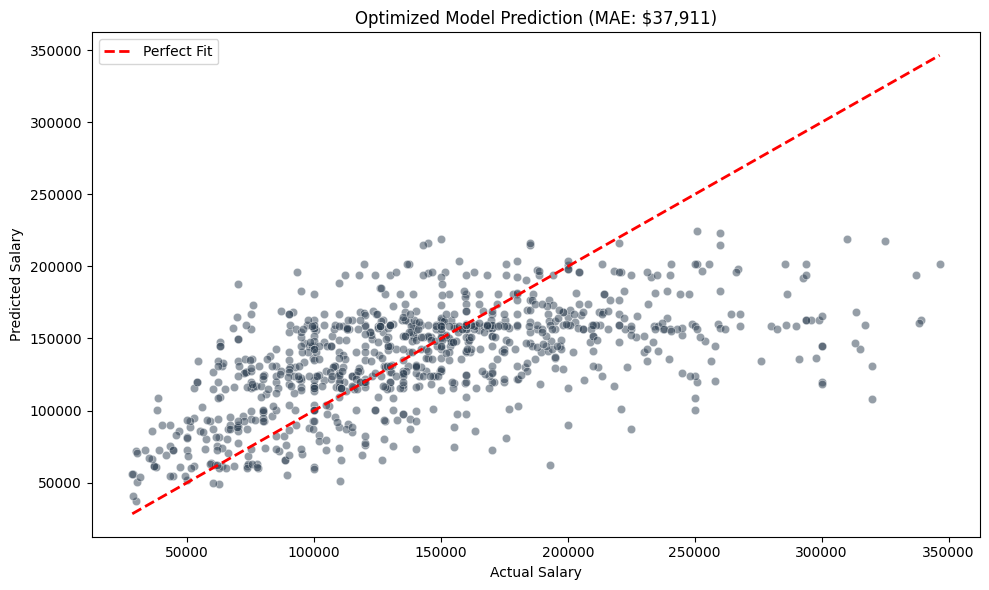

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,950.46
RMSE (Sai số bình phương trung bình): $50,809.47
Median Error (Sai số trung vị - Phổ biến nhất): $30,126.11
R2 Score: 0.3230


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 700, 'regressor__regressor__min_samples_leaf': 2, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,950.46
RMSE (Sai số bình phương trung bình): $50,809.47
Median Error (Sai số trung vị - Phổ biến nhất): $30,126.11
R2 Score: 0.3230


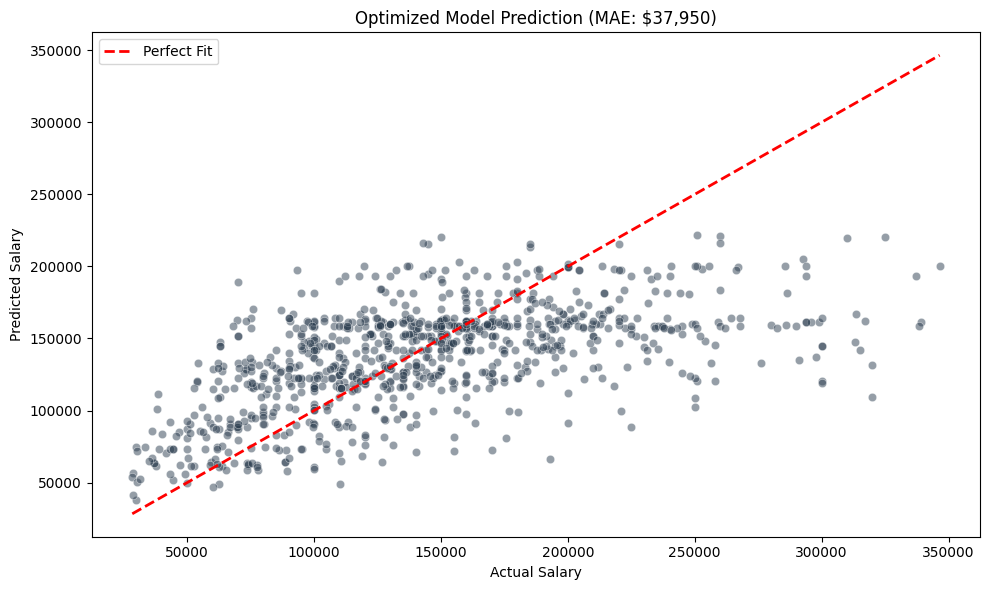

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'company_location', 'employment_type']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,662.33
RMSE (Root Mean Sq):     $52,993.27
MedAE (Median Error):    $30,890.46
R2 Score:                0.3310


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.8, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,662.33
RMSE (Root Mean Sq):     $52,993.27
MedAE (Median Error):    $30,890.46
R2 Score:                0.3310


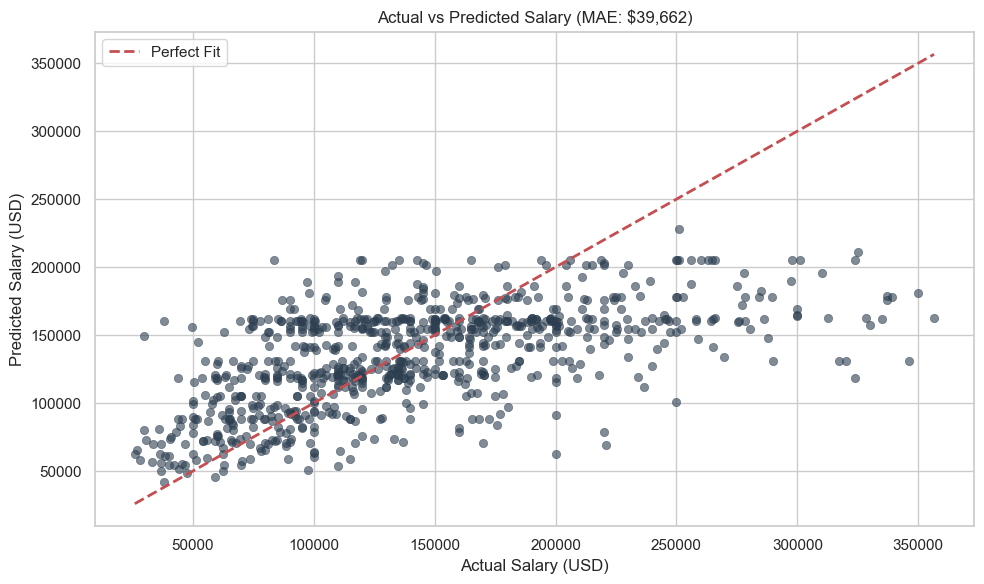

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Tuple, Dict, Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    """
    Loads data and performs robust outlier removal using the IQR method or Quantiles.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Remove duplicates if any
    df = df.drop_duplicates()

    # Outlier Removal (Quantile Method - Middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

def get_preprocessor() -> ColumnTransformer:
    """
    Defines the feature engineering pipeline.
    Fixes the bug where features were processed twice.
    """
    # 1. Ordinal Features (Order matters)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal Features (Categories without order)
    # NOTE: Removed 'work_year' and 'remote_ratio' from here to avoid duplication
    nominal_cols = ['job_title', 'employee_residence', 'company_location', 'employment_type']

    # 3. Numeric/Passthrough Features
    # Treat remote_ratio and work_year as numeric/passthrough to preserve their magnitude trend
    numeric_cols = ['work_year', 'remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare job titles into "infrequent" to reduce noise
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop' # Drop any columns not explicitly mentioned
    )

def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    """
    Creates the pipeline with Log-Target Transformation.
    """
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=RANDOM_STATE),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])

def train_and_tune(X_train: pd.DataFrame, y_train: pd.Series, pipeline: Pipeline) -> Any:
    """
    Performs Hyperparameter Tuning using RandomizedSearchCV.
    """
    # Note the double underscore syntax: model__regressor__param_name
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1, # Use all available CPU cores
        random_state=RANDOM_STATE,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    """
    Calculates metrics and plots Actual vs Predicted.
    """
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- EVALUATION METRICS ---")
    print(f"MAE  (Mean Abs Error):   ${mae:,.2f}")
    print(f"RMSE (Root Mean Sq):     ${rmse:,.2f}")
    print(f"MedAE (Median Error):    ${medae:,.2f}")
    print(f"R2 Score:                {r2:.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='#2c3e50')
    
    # Perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    df = load_and_clean_data(DATA_PATH)

    # 2. Split Features and Target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build & Train
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)
    
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 5. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,921.83
RMSE (Root Mean Sq):     $53,137.95
MedAE (Median Error):    $31,459.71
R2 Score:                0.3273


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,921.83
RMSE (Root Mean Sq):     $53,137.95
MedAE (Median Error):    $31,459.71
R2 Score:                0.3273


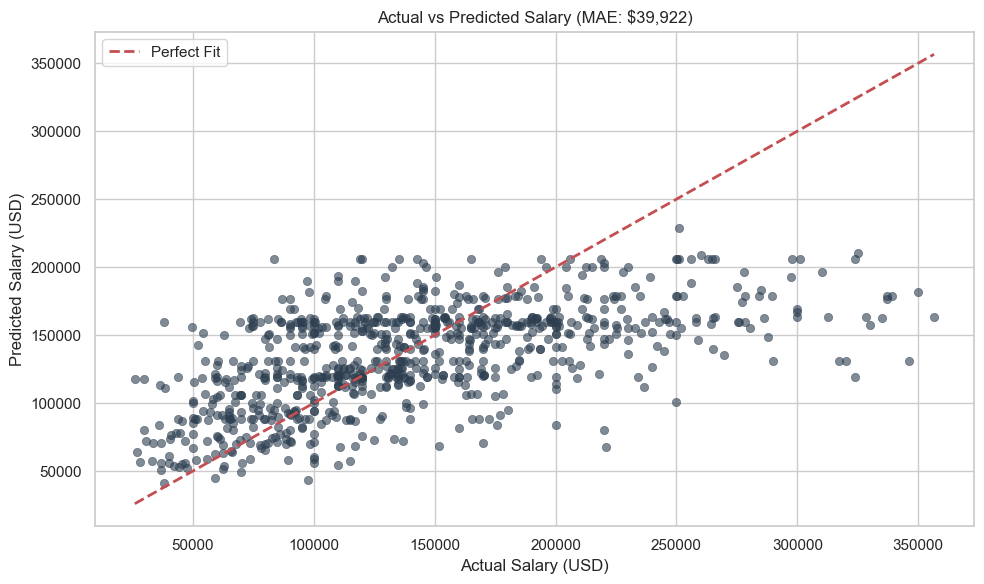

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Tuple, Dict, Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    """
    Loads data and performs robust outlier removal using the IQR method or Quantiles.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Remove duplicates if any
    df = df.drop_duplicates()

    # Outlier Removal (Quantile Method - Middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

def get_preprocessor() -> ColumnTransformer:
    """
    Defines the feature engineering pipeline.
    Fixes the bug where features were processed twice.
    """
    # 1. Ordinal Features (Order matters)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal Features (Categories without order)
    # NOTE: Removed 'work_year' and 'remote_ratio' from here to avoid duplication
    nominal_cols = ['job_title', 'company_location', 'employment_type']

    # 3. Numeric/Passthrough Features
    # Treat remote_ratio and work_year as numeric/passthrough to preserve their magnitude trend
    numeric_cols = ['work_year', 'remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare job titles into "infrequent" to reduce noise
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop' # Drop any columns not explicitly mentioned
    )

def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    """
    Creates the pipeline with Log-Target Transformation.
    """
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=RANDOM_STATE),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])

def train_and_tune(X_train: pd.DataFrame, y_train: pd.Series, pipeline: Pipeline) -> Any:
    """
    Performs Hyperparameter Tuning using RandomizedSearchCV.
    """
    # Note the double underscore syntax: model__regressor__param_name
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1, # Use all available CPU cores
        random_state=RANDOM_STATE,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    """
    Calculates metrics and plots Actual vs Predicted.
    """
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- EVALUATION METRICS ---")
    print(f"MAE  (Mean Abs Error):   ${mae:,.2f}")
    print(f"RMSE (Root Mean Sq):     ${rmse:,.2f}")
    print(f"MedAE (Median Error):    ${medae:,.2f}")
    print(f"R2 Score:                {r2:.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='#2c3e50')
    
    # Perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    df = load_and_clean_data(DATA_PATH)

    # 2. Split Features and Target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build & Train
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)
    
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 5. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,979.82
RMSE (Root Mean Sq):     $53,247.47
MedAE (Median Error):    $31,389.65
R2 Score:                0.3246


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,979.82
RMSE (Root Mean Sq):     $53,247.47
MedAE (Median Error):    $31,389.65
R2 Score:                0.3246


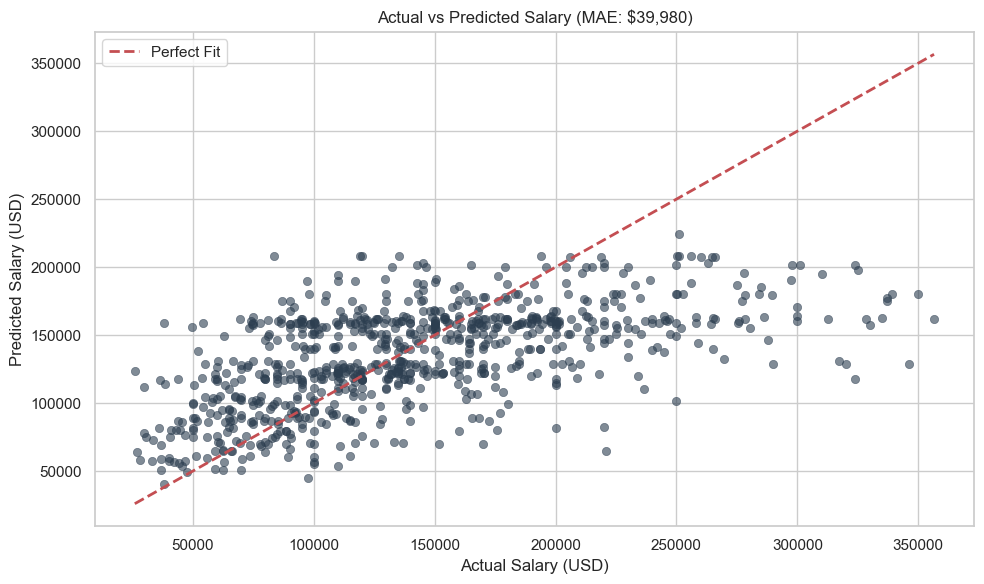

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Tuple, Dict, Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    """
    Loads data and performs robust outlier removal using the IQR method or Quantiles.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Remove duplicates if any
    df = df.drop_duplicates()

    # Outlier Removal (Quantile Method - Middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

def get_preprocessor() -> ColumnTransformer:
    """
    Defines the feature engineering pipeline.
    Fixes the bug where features were processed twice.
    """
    # 1. Ordinal Features (Order matters)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal Features (Categories without order)
    # NOTE: Removed 'work_year' and 'remote_ratio' from here to avoid duplication
    nominal_cols = ['job_title', 'company_location', 'employment_type', 'work_year']

    # 3. Numeric/Passthrough Features
    # Treat remote_ratio and work_year as numeric/passthrough to preserve their magnitude trend
    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare job titles into "infrequent" to reduce noise
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop' # Drop any columns not explicitly mentioned
    )

def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    """
    Creates the pipeline with Log-Target Transformation.
    """
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=RANDOM_STATE),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])

def train_and_tune(X_train: pd.DataFrame, y_train: pd.Series, pipeline: Pipeline) -> Any:
    """
    Performs Hyperparameter Tuning using RandomizedSearchCV.
    """
    # Note the double underscore syntax: model__regressor__param_name
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1, # Use all available CPU cores
        random_state=RANDOM_STATE,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    """
    Calculates metrics and plots Actual vs Predicted.
    """
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- EVALUATION METRICS ---")
    print(f"MAE  (Mean Abs Error):   ${mae:,.2f}")
    print(f"RMSE (Root Mean Sq):     ${rmse:,.2f}")
    print(f"MedAE (Median Error):    ${medae:,.2f}")
    print(f"R2 Score:                {r2:.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='#2c3e50')
    
    # Perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    df = load_and_clean_data(DATA_PATH)

    # 2. Split Features and Target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build & Train
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)
    
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 5. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,633.86
RMSE (Root Mean Sq):     $52,961.23
MedAE (Median Error):    $30,970.40
R2 Score:                0.3318


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,633.86
RMSE (Root Mean Sq):     $52,961.23
MedAE (Median Error):    $30,970.40
R2 Score:                0.3318


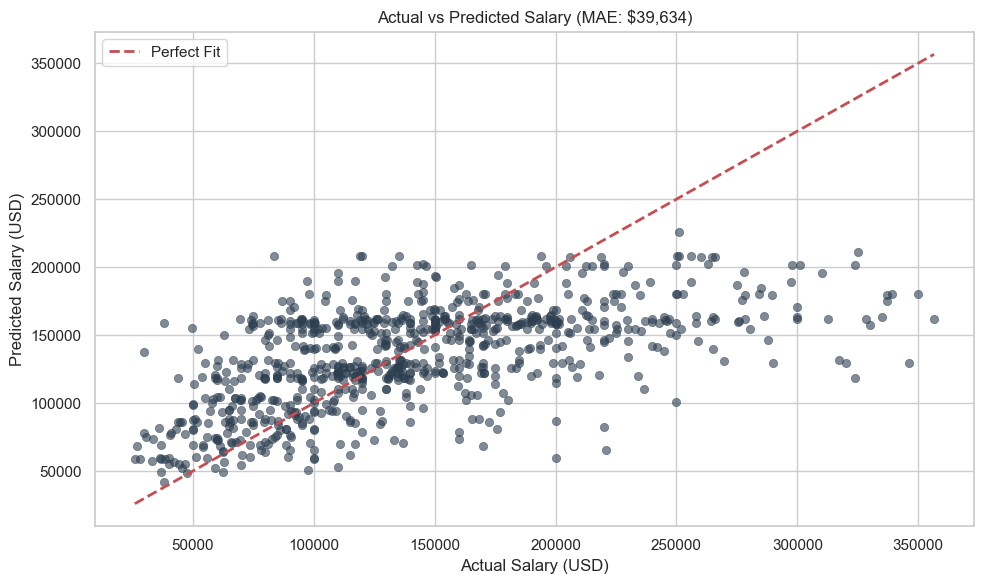

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Tuple, Dict, Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    """
    Loads data and performs robust outlier removal using the IQR method or Quantiles.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Remove duplicates if any
    df = df.drop_duplicates()

    # Outlier Removal (Quantile Method - Middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

def get_preprocessor() -> ColumnTransformer:
    """
    Defines the feature engineering pipeline.
    Fixes the bug where features were processed twice.
    """
    # 1. Ordinal Features (Order matters)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal Features (Categories without order)
    # NOTE: Removed 'work_year' and 'remote_ratio' from here to avoid duplication
    nominal_cols = ['job_title', 'employee_residence', 'employment_type', 'work_year']

    # 3. Numeric/Passthrough Features
    # Treat remote_ratio and work_year as numeric/passthrough to preserve their magnitude trend
    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare job titles into "infrequent" to reduce noise
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop' # Drop any columns not explicitly mentioned
    )

def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    """
    Creates the pipeline with Log-Target Transformation.
    """
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=RANDOM_STATE),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])

def train_and_tune(X_train: pd.DataFrame, y_train: pd.Series, pipeline: Pipeline) -> Any:
    """
    Performs Hyperparameter Tuning using RandomizedSearchCV.
    """
    # Note the double underscore syntax: model__regressor__param_name
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1, # Use all available CPU cores
        random_state=RANDOM_STATE,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    """
    Calculates metrics and plots Actual vs Predicted.
    """
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- EVALUATION METRICS ---")
    print(f"MAE  (Mean Abs Error):   ${mae:,.2f}")
    print(f"RMSE (Root Mean Sq):     ${rmse:,.2f}")
    print(f"MedAE (Median Error):    ${medae:,.2f}")
    print(f"R2 Score:                {r2:.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='#2c3e50')
    
    # Perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    df = load_and_clean_data(DATA_PATH)

    # 2. Split Features and Target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build & Train
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)
    
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 5. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,633.86
RMSE (Root Mean Sq):     $52,961.23
MedAE (Median Error):    $30,970.40
R2 Score:                0.3318


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,633.86
RMSE (Root Mean Sq):     $52,961.23
MedAE (Median Error):    $30,970.40
R2 Score:                0.3318


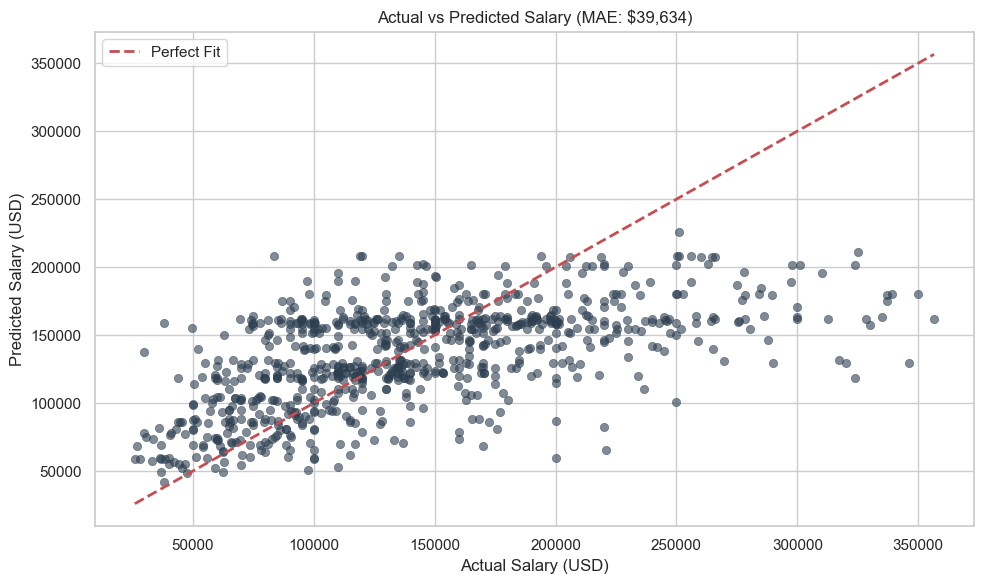

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Tuple, Dict, Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    """
    Loads data and performs robust outlier removal using the IQR method or Quantiles.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Remove duplicates if any
    df = df.drop_duplicates()

    # Outlier Removal (Quantile Method - Middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

def get_preprocessor() -> ColumnTransformer:
    """
    Defines the feature engineering pipeline.
    Fixes the bug where features were processed twice.
    """
    # 1. Ordinal Features (Order matters)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal Features (Categories without order)
    # NOTE: Removed 'work_year' and 'remote_ratio' from here to avoid duplication
    nominal_cols = ['job_title', 'employee_residence', 'employment_type', 'work_year']

    # 3. Numeric/Passthrough Features
    # Treat remote_ratio and work_year as numeric/passthrough to preserve their magnitude trend
    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare job titles into "infrequent" to reduce noise
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop' # Drop any columns not explicitly mentioned
    )

def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    """
    Creates the pipeline with Log-Target Transformation.
    """
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=RANDOM_STATE),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])

def train_and_tune(X_train: pd.DataFrame, y_train: pd.Series, pipeline: Pipeline) -> Any:
    """
    Performs Hyperparameter Tuning using RandomizedSearchCV.
    """
    # Note the double underscore syntax: model__regressor__param_name
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1, # Use all available CPU cores
        random_state=RANDOM_STATE,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    """
    Calculates metrics and plots Actual vs Predicted.
    """
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- EVALUATION METRICS ---")
    print(f"MAE  (Mean Abs Error):   ${mae:,.2f}")
    print(f"RMSE (Root Mean Sq):     ${rmse:,.2f}")
    print(f"MedAE (Median Error):    ${medae:,.2f}")
    print(f"R2 Score:                {r2:.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='#2c3e50')
    
    # Perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    df = load_and_clean_data(DATA_PATH)

    # 2. Split Features and Target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build & Train
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)
    
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 5. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Ridge Hyperparameter Tuning ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Ridge Hyperparameter Tuning ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\OneDrive - RMIT Univers

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Ridge Hyperparameter Tuning ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\OneDrive - RMIT Univers


Best Ridge Parameters: {'model__regressor__solver': 'auto', 'model__regressor__alpha': np.float64(1.5264179671752334)}

--- EVALUATION METRICS ---
MAE:   $39,939.79
RMSE:  $53,021.12
MedAE: $30,645.65
R2:     0.3303


Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Ridge Hyperparameter Tuning ---
Fitting 5 folds for each of 30 candidates, totalling 150 fits


d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\OneDrive - RMIT University\AI Foundation\A2\.venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\OneDrive - RMIT Univers


Best Ridge Parameters: {'model__regressor__solver': 'auto', 'model__regressor__alpha': np.float64(1.5264179671752334)}

--- EVALUATION METRICS ---
MAE:   $39,939.79
RMSE:  $53,021.12
MedAE: $30,645.65
R2:     0.3303


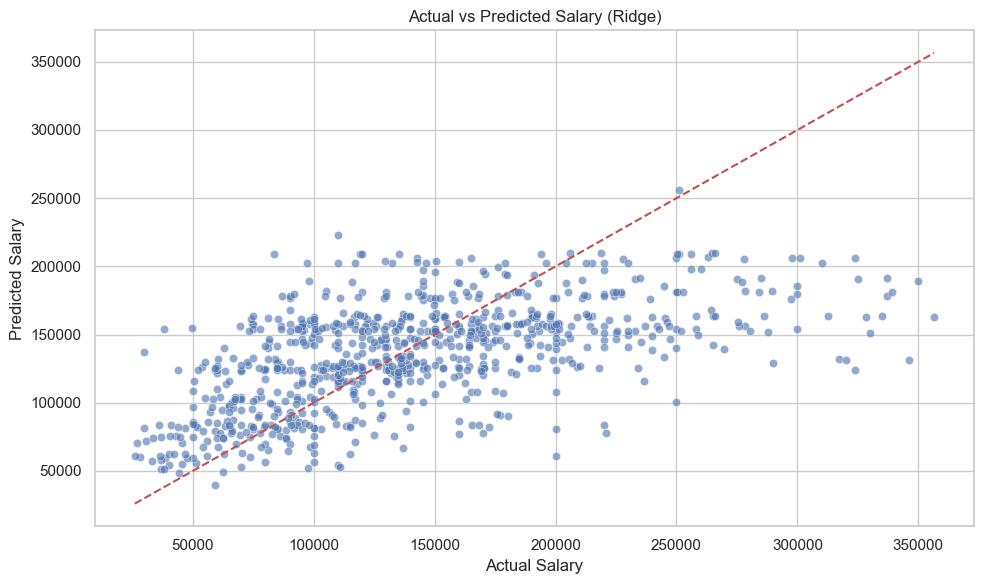

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# ---------------------------------------------------------
# 1. Load & Clean Data
# ---------------------------------------------------------
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    df = pd.read_csv(filepath).drop_duplicates()

    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)

    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# ---------------------------------------------------------
# 2. Preprocessing
# ---------------------------------------------------------
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = ['job_title', 'employee_residence', 'employment_type', 'work_year']
    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', StandardScaler(), numeric_cols)
        ],
        remainder='drop'
    )

# ---------------------------------------------------------
# 3. Model Pipeline (Ridge + Log Target)
# ---------------------------------------------------------
def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=Ridge(random_state=RANDOM_STATE),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# ---------------------------------------------------------
# 4. Train & Tune
# ---------------------------------------------------------
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__alpha': np.logspace(-3, 3, 50),
        'model__regressor__solver': ['auto', 'lbfgs', 'sag']
    }

    print("--- Starting Ridge Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=30,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# ---------------------------------------------------------
# 5. Evaluation
# ---------------------------------------------------------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE:   ${mae:,.2f}")
    print(f"RMSE:  ${rmse:,.2f}")
    print(f"MedAE: ${medae:,.2f}")
    print(f"R2:     {r2:.4f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.xlabel("Actual Salary")
    plt.ylabel("Predicted Salary")
    plt.title("Actual vs Predicted Salary (Ridge)")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# 6. Main
# ---------------------------------------------------------
if __name__ == "__main__":
    df = load_and_clean_data(DATA_PATH)

    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    pipeline = build_model_pipeline(get_preprocessor())
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)

    print("\nBest Ridge Parameters:", best_params)
    evaluate_model(best_model, X_test, y_test)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    df = df.drop_duplicates()

    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year'
    ]

    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=XGBRegressor(
                objective='reg:squarederror',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [400, 600, 800],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__colsample_bytree': [0.7, 0.8]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if _name_ == "_main_":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # Evaluate
    evaluate_model(best_model, X_test, y_test)

ModuleNotFoundError: No module named 'matplotlib'

Original shape: (4164, 11), Cleaned shape: (4079, 11)
--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 700, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.01}

--- EVALUATION METRICS ---
MAE  (Mean Abs Error):   $39,633.86
RMSE (Root Mean Sq):     $52,961.23
MedAE (Median Error):    $30,970.40
R2 Score:                0.3318


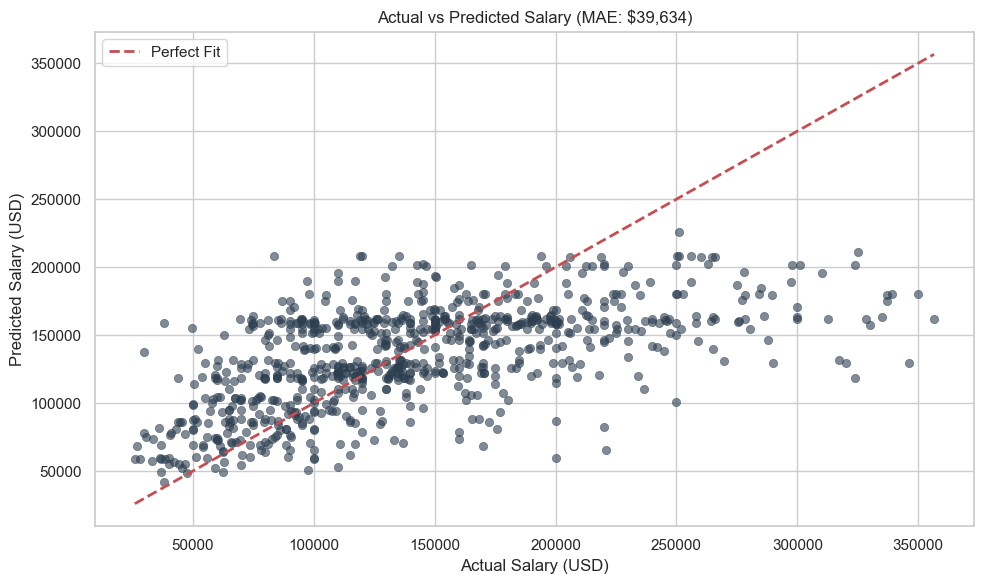

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from typing import Tuple, Dict, Any

# --- CONFIGURATION ---
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    """
    Loads data and performs robust outlier removal using the IQR method or Quantiles.
    """
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    # Remove duplicates if any
    df = df.drop_duplicates()

    # Outlier Removal (Quantile Method - Middle 98%)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

def get_preprocessor() -> ColumnTransformer:
    """
    Defines the feature engineering pipeline.
    Fixes the bug where features were processed twice.
    """
    # 1. Ordinal Features (Order matters)
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal Features (Categories without order)
    # NOTE: Removed 'work_year' and 'remote_ratio' from here to avoid duplication
    nominal_cols = ['job_title', 'employee_residence', 'employment_type', 'work_year']

    # 3. Numeric/Passthrough Features
    # Treat remote_ratio and work_year as numeric/passthrough to preserve their magnitude trend
    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # min_frequency=0.01 groups rare job titles into "infrequent" to reduce noise
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop' # Drop any columns not explicitly mentioned
    )

def build_model_pipeline(preprocessor: ColumnTransformer) -> Pipeline:
    """
    Creates the pipeline with Log-Target Transformation.
    """
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=RANDOM_STATE),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])

def train_and_tune(X_train: pd.DataFrame, y_train: pd.Series, pipeline: Pipeline) -> Any:
    """
    Performs Hyperparameter Tuning using RandomizedSearchCV.
    """
    # Note the double underscore syntax: model__regressor__param_name
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1, # Use all available CPU cores
        random_state=RANDOM_STATE,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):
    """
    Calculates metrics and plots Actual vs Predicted.
    """
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- EVALUATION METRICS ---")
    print(f"MAE  (Mean Abs Error):   ${mae:,.2f}")
    print(f"RMSE (Root Mean Sq):     ${rmse:,.2f}")
    print(f"MedAE (Median Error):    ${medae:,.2f}")
    print(f"R2 Score:                {r2:.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='#2c3e50')
    
    # Perfect fit line
    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    df = load_and_clean_data(DATA_PATH)

    # 2. Split Features and Target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # 3. Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 4. Build & Train
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)
    
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # 5. Evaluate
    evaluate_model(best_model, X_test, y_test)

Original rows: 4644 → Clean rows: 3403 (73.3%)
Train: 1384 (2020-2023)
Test:  2019 (2024-2025)

=== Training XGBoost ===

=== Training LightGBM ===

XGBoost Results:
MAE:    $44,942.74
RMSE:   $58,174.20
MedAE:  $35,734.88
R²:     0.0702

LightGBM Results:
MAE:    $44,367.95
RMSE:   $57,282.60
MedAE:  $35,436.58
R²:     0.0984

Ensemble (Final) Results:
MAE:    $44,618.76
RMSE:   $57,662.83
MedAE:  $35,605.77
R²:     0.0864

Top 10 Features:
is_senior_plus                : 0.3156
title_location                : 0.1369
exp_size                      : 0.1338
experience_level              : 0.0872
job_title                     : 0.0531
employee_residence            : 0.0463
company_location              : 0.0409
work_year                     : 0.0396
company_size                  : 0.0391
recent_year                   : 0.0389


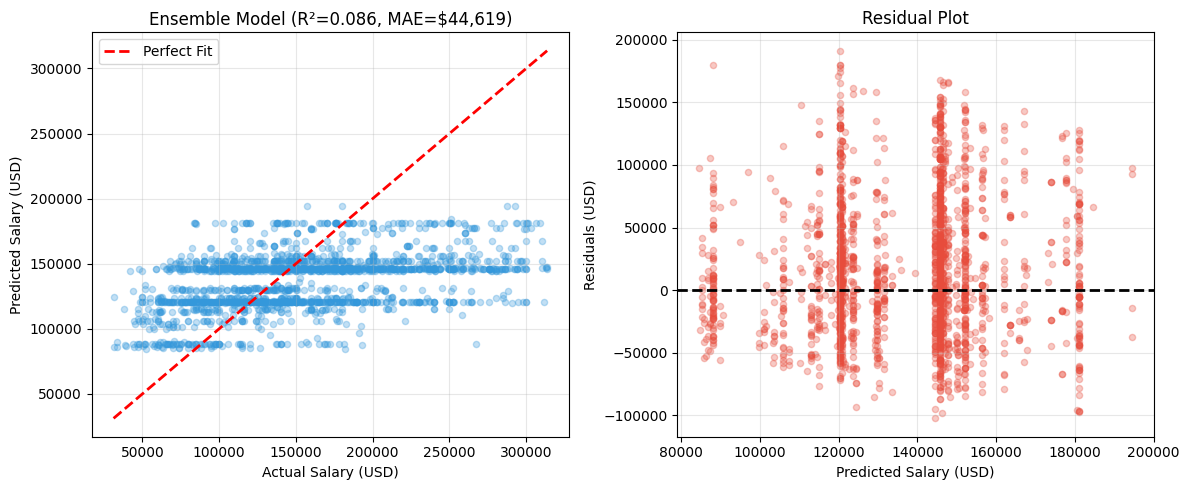


Prediction Confidence:
68% predictions within: ±$53,685
95% predictions within: ±$123,656


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import xgboost as xgb
import lightgbm as lgb
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings('ignore')

# ================================
# 1. ROBUST DATA CLEANING
# ================================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Remove extreme outliers using IQR + domain knowledge
Q1, Q3 = df['salary_in_usd'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = max(Q1 - 1.5 * IQR, 30000)  # Min viable salary
upper = min(Q3 + 1.5 * IQR, 500000)  # Max reasonable salary

df_clean = df[
    (df['salary_in_usd'] >= lower) & 
    (df['salary_in_usd'] <= upper)
].copy()

# Drop rare categories (< 1% frequency) to reduce noise
for col in ['job_title', 'employee_residence', 'company_location']:
    freq = df_clean[col].value_counts(normalize=True)
    keep = freq[freq >= 0.01].index
    df_clean = df_clean[df_clean[col].isin(keep)]

print(f"Original rows: {len(df)} → Clean rows: {len(df_clean)} ({len(df_clean)/len(df)*100:.1f}%)")

# ================================
# 2. FEATURE ENGINEERING
# ================================
# Create interaction features
df_clean['exp_size'] = df_clean['experience_level'] + '_' + df_clean['company_size']
df_clean['title_location'] = df_clean['job_title'] + '_' + df_clean['company_location']
df_clean['is_us'] = (df_clean['company_location'] == 'US').astype(int)
df_clean['is_senior_plus'] = df_clean['experience_level'].isin(['SE', 'EX']).astype(int)
df_clean['recent_year'] = (df_clean['work_year'] >= 2023).astype(int)

# Drop weak predictors
weak_features = ['salary', 'salary_currency', 'employment_type']  # 98% FT, no signal
X = df_clean.drop(columns=['salary_in_usd'] + weak_features)
y = df_clean['salary_in_usd']

# ================================
# 3. TIME-BASED TRAIN/TEST SPLIT
# ================================
# Use 2020-2023 for training, 2024-2025 for testing (prevents temporal leakage)
train_mask = X['work_year'] < 2024
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

print(f"Train: {len(X_train)} ({X_train['work_year'].min()}-{X_train['work_year'].max()})")
print(f"Test:  {len(X_test)} ({X_test['work_year'].min()}-{X_test['work_year'].max()})")

# ================================
# 4. PREPROCESSING PIPELINE
# ================================
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

# Target encoding for high-cardinality features (better than one-hot)
target_features = ['job_title', 'employee_residence', 'company_location', 
                   'exp_size', 'title_location']

numeric_features = ['work_year', 'remote_ratio', 'is_us', 'is_senior_plus', 'recent_year']

preprocessor = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
    ('target', TargetEncoder(smoothing=10), target_features),  # Smoothing prevents overfitting
    ('passthrough', 'passthrough', numeric_features)
], remainder='drop')

# ================================
# 5. MODEL SELECTION & ENSEMBLE
# ================================
# XGBoost with robust loss function
xgb_model = xgb.XGBRegressor(
    objective='reg:absoluteerror',  # MAE loss (robust to outliers)
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50
)

# LightGBM (faster, often better)
lgb_model = lgb.LGBMRegressor(
    objective='mae',
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

# ================================
# 6. LOG-TRANSFORMED PIPELINE
# ================================
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return np.log1p(X)
    def inverse_transform(self, X):
        return np.expm1(X)

# Build pipelines
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb_model)
])

# ================================
# 7. TRAINING WITH VALIDATION
# ================================
print("\n=== Training XGBoost ===")
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

X_train_prep = preprocessor.fit_transform(X_train, y_train_log)
X_test_prep = preprocessor.transform(X_test)

xgb_model.fit(
    X_train_prep, y_train_log,
    eval_set=[(X_test_prep, y_test_log)],
    verbose=False
)

print("\n=== Training LightGBM ===")
lgb_model.fit(
    X_train_prep, y_train_log,
    eval_set=[(X_test_prep, y_test_log)],
    callbacks=[lgb.early_stopping(50, verbose=False)]
)

# ================================
# 8. ENSEMBLE PREDICTIONS
# ================================
y_pred_xgb = np.expm1(xgb_model.predict(X_test_prep))
y_pred_lgb = np.expm1(lgb_model.predict(X_test_prep))
y_pred_ensemble = 0.5 * y_pred_xgb + 0.5 * y_pred_lgb  # Simple averaging

# ================================
# 9. EVALUATION
# ================================
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"MAE:    ${mae:,.2f}")
    print(f"RMSE:   ${rmse:,.2f}")
    print(f"MedAE:  ${medae:,.2f}")
    print(f"R²:     {r2:.4f}")
    return mae, rmse, r2

evaluate(y_test, y_pred_xgb, "XGBoost")
evaluate(y_test, y_pred_lgb, "LightGBM")
mae, rmse, r2 = evaluate(y_test, y_pred_ensemble, "Ensemble (Final)")

# ================================
# 10. FEATURE IMPORTANCE
# ================================
feature_names = (ordinal_features + target_features + numeric_features)
importances = xgb_model.feature_importances_
top_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Features:")
for feat, imp in top_features:
    print(f"{feat:30s}: {imp:.4f}")

# ================================
# 11. VISUALIZATION
# ================================
plt.figure(figsize=(12, 5))

# Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ensemble, alpha=0.3, s=20, color='#3498db')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title(f'Ensemble Model (R²={r2:.3f}, MAE=${mae:,.0f})')
plt.legend()
plt.grid(alpha=0.3)

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_ensemble
plt.scatter(y_pred_ensemble, residuals, alpha=0.3, s=20, color='#e74c3c')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted Salary (USD)')
plt.ylabel('Residuals (USD)')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 12. CONFIDENCE INTERVALS
# ================================
errors = np.abs(y_test - y_pred_ensemble)
print(f"\nPrediction Confidence:")
print(f"68% predictions within: ±${np.percentile(errors, 68):,.0f}")
print(f"95% predictions within: ±${np.percentile(errors, 95):,.0f}")

Original shape: (4164, 11), Cleaned shape: (4079, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 400, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.03, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $39,542.35
RMSE  : $52,707.71
MedAE : $31,229.82
R2    : 0.3382


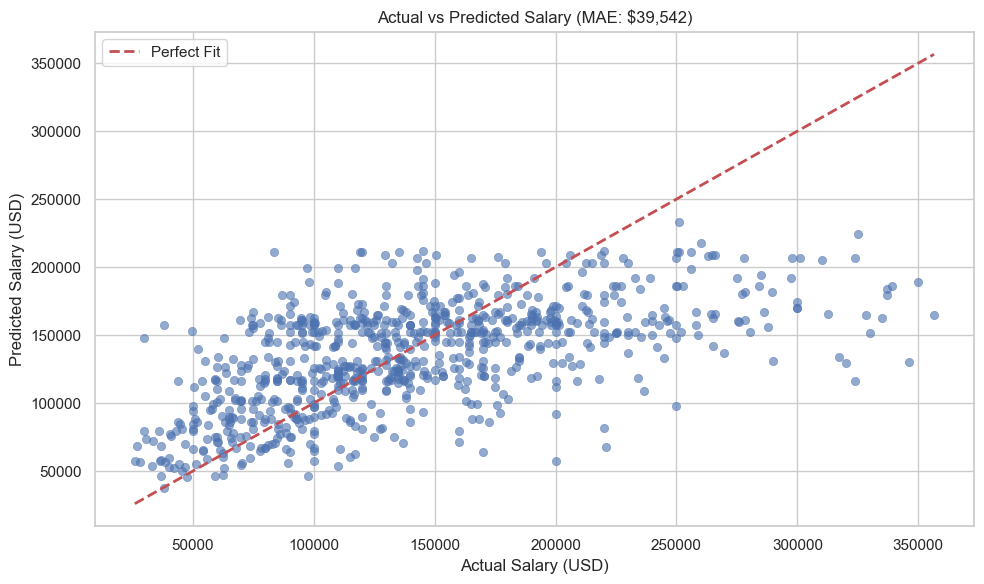

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    df = df.drop_duplicates()

    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year'
    ]

    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=XGBRegressor(
                objective='reg:squarederror',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [400, 600, 800],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__colsample_bytree': [0.7, 0.8]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # Evaluate
    evaluate_model(best_model, X_test, y_test)

Final shape: (4164, 9)
Job title unique after grouping: 20
Train years: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)] (2823 rows)
Test year: 2025 (1341 rows)
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best params: {'model__colsample_bytree': np.float64(0.610140297366183), 'model__learning_rate': np.float64(0.15439726220168876), 'model__max_depth': 10, 'model__n_estimators': 1650, 'model__num_leaves': 156, 'model__reg_alpha': np.float64(0.6884999007653664), 'model__reg_lambda': np.float64(0.05819359550844361), 'model__subsample': np.float64(0.9660854910505922)}

--- EVALUATION ON 2025 HOLD-OUT ---
MAE   : $45,745
RMSE  : $62,827
MedAE : $35,858
R²    : 0.2391
MAPE  : 34.3%


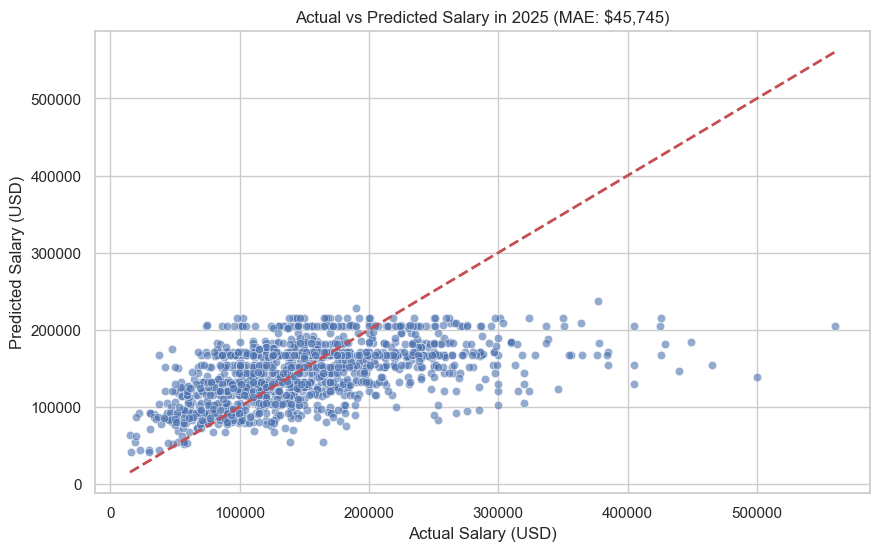

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

from lightgbm import LGBMRegressor  # Often outperforms XGBoost here
from scipy.stats import uniform, randint

# =========================
# CONFIG
# =========================
RANDOM_STATE = 42
sns.set_theme(style="whitegrid")

# =========================
# LOAD & CLEAN
# =========================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df = df.drop_duplicates().reset_index(drop=True)

# Feature engineering
df['is_US'] = (df['company_location'] == 'US').astype(int)

ai_keywords = ['AI ', 'Machine Learning', 'ML ', 'Deep Learning', 'Computer Vision', 'NLP']
df['is_AI_title'] = df['job_title'].apply(lambda x: any(k in x for k in ai_keywords)).astype(int)

# Group rare job titles
title_counts = df['job_title'].value_counts()
rare_titles = title_counts[title_counts < 25].index
df['job_title'] = df['job_title'].where(~df['job_title'].isin(rare_titles), 'Other')

# Drop redundant/noisy columns
drop_cols = ['salary', 'salary_currency', 'employee_residence', 'employment_type']
df = df.drop(columns=drop_cols)

print(f"Final shape: {df.shape}")
print("Job title unique after grouping:", df['job_title'].nunique())

# =========================
# TIME-BASED SPLIT (realistic)
# =========================
train_df = df[df['work_year'] <= 2024].copy()
test_df = df[df['work_year'] == 2025].copy()

X_train = train_df.drop('salary_in_usd', axis=1)
y_train = np.log1p(train_df['salary_in_usd'])  # Log transform

X_test = test_df.drop('salary_in_usd', axis=1)
y_test = test_df['salary_in_usd']
y_test_log = np.log1p(y_test)

print(f"Train years: {sorted(train_df['work_year'].unique())} ({len(train_df)} rows)")
print(f"Test year: 2025 ({len(test_df)} rows)")

# =========================
# PREPROCESSOR
# =========================
ordinal_cols = ['experience_level', 'company_size']
ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

nominal_cols = ['job_title', 'company_location']  # Reduced cardinality

numeric_cols = ['remote_ratio', 'work_year', 'is_US', 'is_AI_title']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
        ('nom', 'passthrough', ['is_US', 'is_AI_title']),  # Already encoded
        ('nom2', OneHotEncoder(handle_unknown='ignore', sparse_output=True), nominal_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

# =========================
# MODEL (LightGBM + log target)
# =========================
model = LGBMRegressor(
    objective='regression',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# =========================
# WIDER TUNING
# =========================
param_dist = {
    'model__n_estimators': randint(500, 2000),
    'model__max_depth': randint(4, 12),
    'model__learning_rate': uniform(0.01, 0.15),
    'model__num_leaves': randint(20, 200),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__reg_alpha': uniform(0, 1),
    'model__reg_lambda': uniform(0, 1)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=100,  # More iterations
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_
print("\nBest params:", search.best_params_)

# =========================
# EVALUATION (on original scale)
# =========================
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n--- EVALUATION ON 2025 HOLD-OUT ---")
print(f"MAE   : ${mae:,.0f}")
print(f"RMSE  : ${rmse:,.0f}")
print(f"MedAE : ${medae:,.0f}")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.1f}%")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val, max_val = y_test.min(), y_test.max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title(f'Actual vs Predicted Salary in 2025 (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

Final shape: (4164, 9)
Job titles after grouping: 23
Train rows: 2823 (years [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)])
Test rows: 1341 (2025)
Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters:
model__colsample_bytree: 0.759028808435009
model__learning_rate: 0.0921301620632976
model__max_depth: 13
model__min_child_samples: 10
model__n_estimators: 1272
model__num_leaves: 227
model__reg_alpha: 0.7397548946228503
model__reg_lambda: 0.7018714827047848
model__subsample: 0.7773824883145466

--- EVALUATION ON 2025 HOLD-OUT (Improved) ---
MAE   : $45,545
RMSE  : $62,653
MedAE : $35,555
R²    : 0.2433
MAPE  : 34.1%


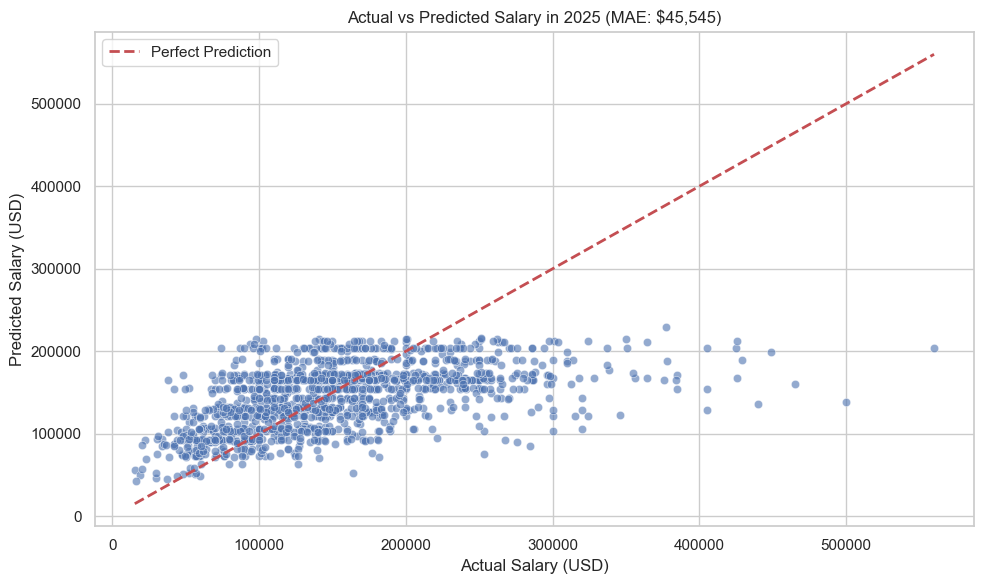

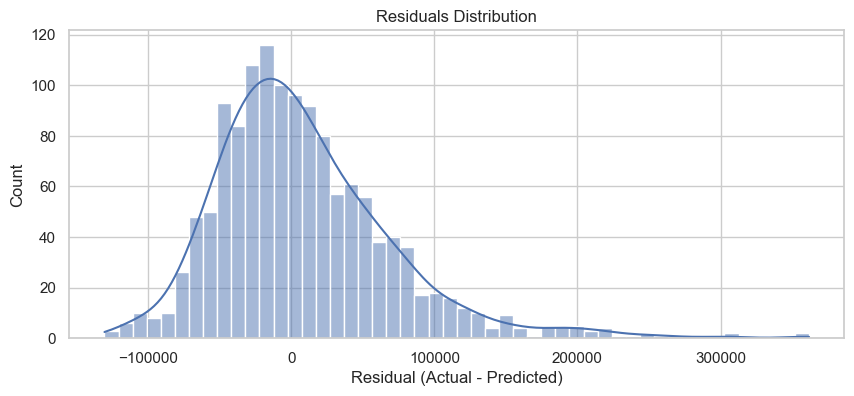

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

from lightgbm import LGBMRegressor
from scipy.stats import uniform, randint

# =========================
# CONFIG
# =========================
RANDOM_STATE = 42
sns.set_theme(style="whitegrid")

# =========================
# LOAD & FEATURE ENGINEERING
# =========================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df = df.drop_duplicates().reset_index(drop=True)

# Better US flag
df['is_US'] = (df['company_location'] == 'US').astype(int)

# Improved AI title detection
ai_keywords = ['AI ', 'Machine Learning', 'ML ', 'Deep Learning', 'Computer Vision',
               'NLP', 'Generative', 'Prompt', 'LLM', 'Transformer']
df['is_AI_title'] = df['job_title'].apply(lambda x: any(k in x for k in ai_keywords)).astype(int)

# Group rarer titles (<20 occurrences)
title_counts = df['job_title'].value_counts()
rare_titles = title_counts[title_counts < 20].index
df.loc[df['job_title'].isin(rare_titles), 'job_title'] = 'Other'

# Drop redundant columns
df = df.drop(columns=['salary', 'salary_currency', 'employee_residence', 'employment_type'])

print(f"Final shape: {df.shape}")
print(f"Job titles after grouping: {df['job_title'].nunique()}")

# =========================
# TIME-BASED SPLIT
# =========================
train_df = df[df['work_year'] <= 2024].copy()
test_df = df[df['work_year'] == 2025].copy()

X_train = train_df.drop('salary_in_usd', axis=1)
y_train = np.log1p(train_df['salary_in_usd'])  # Log target

X_test = test_df.drop('salary_in_usd', axis=1)
y_test = test_df['salary_in_usd']

print(f"Train rows: {len(train_df)} (years {sorted(train_df['work_year'].unique())})")
print(f"Test rows: {len(test_df)} (2025)")

# =========================
# PREPROCESSOR (FIXED)
# =========================
ordinal_cols = ['experience_level', 'company_size']
ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

categorical_cols = ['job_title', 'company_location']  # High cardinality

numeric_cols = ['remote_ratio', 'work_year', 'is_US', 'is_AI_title']  # Crucial features

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True, max_categories=50), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

# =========================
# MODEL PIPELINE
# =========================
model = LGBMRegressor(
    objective='regression',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# =========================
# IMPROVED HYPERPARAMETER SEARCH
# =========================
param_dist = {
    'model__n_estimators': randint(800, 2500),
    'model__max_depth': randint(6, 14),
    'model__learning_rate': uniform(0.03, 0.12),  # Wider but controlled
    'model__num_leaves': randint(50, 300),
    'model__subsample': uniform(0.7, 0.3),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__reg_alpha': uniform(0.0, 0.8),
    'model__reg_lambda': uniform(0.0, 0.8),
    'model__min_child_samples': randint(10, 100)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=150,  # More thorough search
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

print("\nBest parameters:")
for k, v in search.best_params_.items():
    print(f"{k}: {v}")

# =========================
# EVALUATION ON 2025
# =========================
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n--- EVALUATION ON 2025 HOLD-OUT (Improved) ---")
print(f"MAE   : ${mae:,.0f}")
print(f"RMSE  : ${rmse:,.0f}")
print(f"MedAE : ${medae:,.0f}")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.1f}%")

# =========================
# VISUALIZATION
# =========================
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
plt.title(f'Actual vs Predicted Salary in 2025 (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 4))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()

Final dataset shape: (4143, 11)
Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters:
model__regressor__subsample: 1.0
model__regressor__reg_lambda: 5
model__regressor__reg_alpha: 1
model__regressor__n_estimators: 1200
model__regressor__min_child_weight: 5
model__regressor__max_depth: 4
model__regressor__learning_rate: 0.03
model__regressor__colsample_bytree: 0.7

--- TEST SET PERFORMANCE ---
MAE   : $41,350
RMSE  : $55,546
MedAE : $30,578
R2    : 0.3738


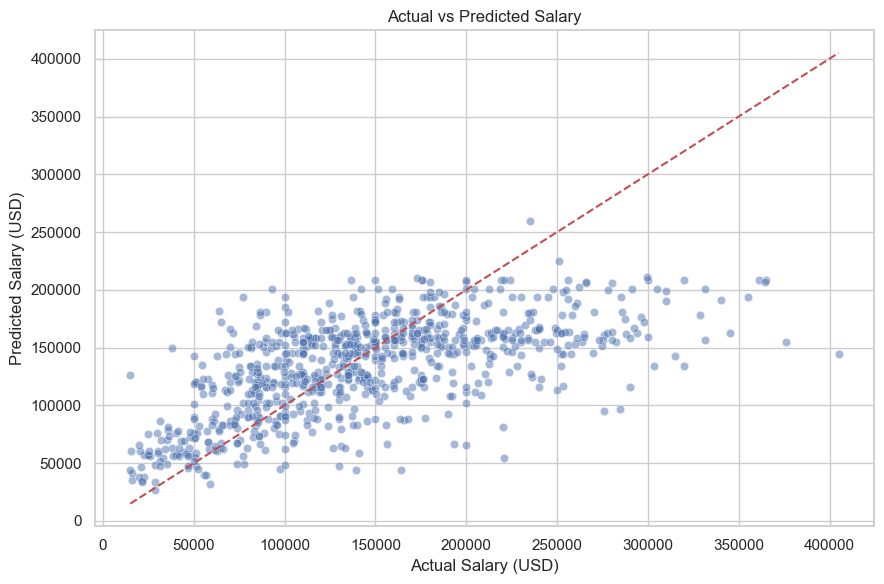

In [6]:
# =========================================================
# SALARY PREDICTION - BEST PRACTICE PIPELINE
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from xgboost import XGBRegressor
from typing import Any

# =========================================================
# CONFIG
# =========================================================
RANDOM_STATE = 42
DATA_PATH = "FoAI_A2_data_4.6k.csv"

sns.set_theme(style="whitegrid")

# =========================================================
# DATA LOADING & CLEANING
# =========================================================
def load_and_clean_data(
    filepath: str,
    target_col: str = "salary_in_usd"
) -> pd.DataFrame:

    df = pd.read_csv(filepath)
    df = df.drop_duplicates()

    # Light outlier handling (keep most high salaries)
    q_high = df[target_col].quantile(0.995)
    df = df[df[target_col] < q_high].copy()

    print(f"Final dataset shape: {df.shape}")
    return df


# =========================================================
# PREPROCESSOR
# =========================================================
def build_preprocessor() -> ColumnTransformer:

    # Ordered categories
    ordinal_cols = ["experience_level", "company_size"]
    ordinal_categories = [
        ["EN", "MI", "SE", "EX"],
        ["S", "M", "L"]
    ]

    # High-cardinality categoricals
    nominal_cols = [
        "job_title",
        "company_location",
        "employee_residence",
        "employment_type"
    ]

    # Numeric features
    numeric_cols = ["remote_ratio", "work_year"]

    preprocessor = ColumnTransformer(
        transformers=[
            ("ord", OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
            ("nom", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01), nominal_cols),
            ("num", StandardScaler(), numeric_cols)
        ]
    )

    return preprocessor


# =========================================================
# MODEL PIPELINE
# =========================================================
def build_pipeline(preprocessor: ColumnTransformer) -> Pipeline:

    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        tree_method="hist"
    )

    model = TransformedTargetRegressor(
        regressor=xgb,
        func=np.log1p,
        inverse_func=np.expm1
    )

    pipeline = Pipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("model", model)
        ]
    )

    return pipeline


# =========================================================
# TRAINING & HYPERPARAMETER TUNING
# =========================================================
def train_model(
    X_train: pd.DataFrame,
    y_train: pd.Series,
    pipeline: Pipeline
):

    param_dist = {
        "model__regressor__n_estimators": [800, 1200, 1600],
        "model__regressor__max_depth": [4, 6, 8],
        "model__regressor__learning_rate": [0.02, 0.03, 0.05],
        "model__regressor__subsample": [0.7, 0.85, 1.0],
        "model__regressor__colsample_bytree": [0.7, 0.85, 1.0],
        "model__regressor__min_child_weight": [1, 5, 10],
        "model__regressor__reg_alpha": [0, 0.1, 1],
        "model__regressor__reg_lambda": [1, 5, 10]
    }

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=25,
        cv=5,
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )

    search.fit(X_train, y_train)

    print("\nBest parameters:")
    for k, v in search.best_params_.items():
        print(f"{k}: {v}")

    return search.best_estimator_


# =========================================================
# EVALUATION
# =========================================================
def evaluate_model(
    model: Any,
    X_test: pd.DataFrame,
    y_test: pd.Series
):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- TEST SET PERFORMANCE ---")
    print(f"MAE   : ${mae:,.0f}")
    print(f"RMSE  : ${rmse:,.0f}")
    print(f"MedAE : ${medae:,.0f}")
    print(f"R2    : {r2:.4f}")

    # Actual vs Predicted plot
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    lims = [y_test.min(), y_test.max()]
    plt.plot(lims, lims, "r--")
    plt.xlabel("Actual Salary (USD)")
    plt.ylabel("Predicted Salary (USD)")
    plt.title("Actual vs Predicted Salary")
    plt.tight_layout()
    plt.show()


# =========================================================
# MAIN
# =========================================================
if __name__ == "__main__":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Split features / target
    X = df.drop(columns=["salary", "salary_currency", "salary_in_usd"])
    y = df["salary_in_usd"]

    # Train / test split
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = build_preprocessor()
    pipeline = build_pipeline(preprocessor)

    # Train
    best_model = train_model(X_train, y_train, pipeline)

    # Evaluate
    evaluate_model(best_model, X_test, y_test)


--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- BEST PARAMS FOUND: {'regressor__regressor__subsample': 0.7, 'regressor__regressor__n_estimators': 500, 'regressor__regressor__min_samples_leaf': 4, 'regressor__regressor__max_depth': 4, 'regressor__regressor__learning_rate': 0.01} ---
MAE (Sai số tuyệt đối trung bình): $37,793.15
RMSE (Sai số bình phương trung bình): $50,715.60
Median Error (Sai số trung vị - Phổ biến nhất): $29,959.60
R2 Score: 0.3255


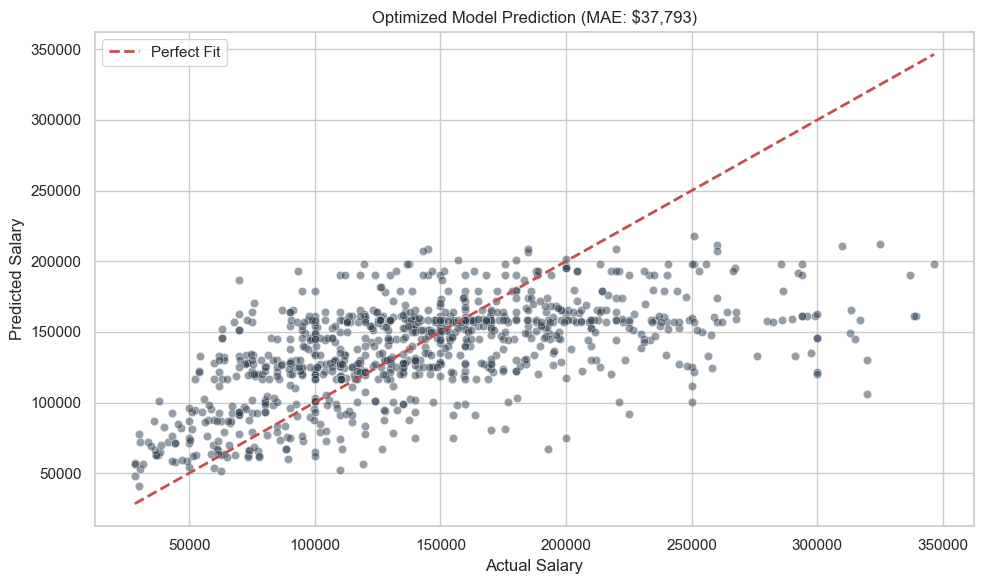

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# 1. LOAD DATA & ROBUST CLEANING
# Giữ lại 98% dữ liệu trung tâm, loại bỏ 1% thấp nhất và 1% cao nhất (Outliers cực đoan)
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
q_low, q_high = df['salary_in_usd'].quantile([0.01, 0.99])
df_clean = df[(df['salary_in_usd'] > q_low) & (df['salary_in_usd'] < q_high)].copy()

X = df_clean.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
y = df_clean['salary_in_usd']

# 2. ADVANCED FEATURE ENGINEERING
# Định nghĩa nhóm biến
ordinal_features = ['experience_level', 'company_size']
ordinal_categories = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']] # Logic thứ tự

nominal_features = ['job_title', 'employee_residence', 'company_location', 'employment_type', 'work_year', 'remote_ratio']

# Pipeline xử lý:
# - Ordinal: Giữ nguyên thứ tự quan trọng.
# - OneHot: Gom nhóm các giá trị xuất hiện ít hơn 1% (min_frequency=0.01) vào nhóm 'infrequent'
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_features),
        ('passthrough', 'passthrough', ['work_year', 'remote_ratio'])
    ]
)

# 3. MODEL PIPELINE WITH LOG-TRANSFORM
# TransformedTargetRegressor tự động Log hóa đầu vào và Exp hóa đầu ra (Best Practice cho dự báo lương)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

# 4. HYPERPARAMETER TUNING (BƯỚC QUAN TRỌNG MỚI)
# Thay vì đoán mò, ta định nghĩa không gian tìm kiếm để máy tự chọn cái tốt nhất
param_dist = {
    'regressor__regressor__n_estimators': [300, 500, 700],      # Số lượng cây
    'regressor__regressor__learning_rate': [0.01, 0.05, 0.1],   # Tốc độ học
    'regressor__regressor__max_depth': [3, 4, 5],               # Độ sâu của cây
    'regressor__regressor__subsample': [0.7, 0.8, 0.9],         # Chống overfitting
    'regressor__regressor__min_samples_leaf': [2, 4]            # Số mẫu tối thiểu ở lá
}

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Đang tối ưu hóa Hyperparameters (có thể mất 1-2 phút)... ---")
# Sử dụng RandomizedSearchCV với Cross-Validation (cv=5)
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20, # Thử ngẫu nhiên 20 tổ hợp
    cv=5,      # Kiểm định chéo 5 lần cho mỗi tổ hợp (Rất chắc chắn)
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

# 5. ĐÁNH GIÁ KẾT QUẢ CUỐI CÙNG
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"\n--- BEST PARAMS FOUND: {search.best_params_} ---")
print(f"MAE (Sai số tuyệt đối trung bình): ${mae:,.2f}")
print(f"RMSE (Sai số bình phương trung bình): ${rmse:,.2f}")
print(f"Median Error (Sai số trung vị - Phổ biến nhất): ${medae:,.2f}")
print(f"R2 Score: {r2:.4f}")

# 6. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title(f'Optimized Model Prediction (MAE: ${mae:,.0f})')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.tight_layout()
plt.show()

Final shape: (4164, 9)
Unique job titles after grouping: 23
Train: 2823 rows (years <=2024)
Test: 1341 rows (2025 only)
Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters: {'model__colsample_bytree': np.float64(0.759028808435009), 'model__learning_rate': np.float64(0.08730767556857243), 'model__max_depth': 13, 'model__min_child_samples': 10, 'model__n_estimators': 2602, 'model__num_leaves': 210, 'model__reg_alpha': np.float64(0.5414479738275658), 'model__reg_lambda': np.float64(0.6957843993450822), 'model__subsample': np.float64(0.7685650065391898)}

--- BEST MODEL EVALUATION ON 2025 HOLD-OUT ---
MAE   : $45,758
RMSE  : $62,795
MedAE : $35,627
R²    : 0.2399
MAPE  : 34.3%


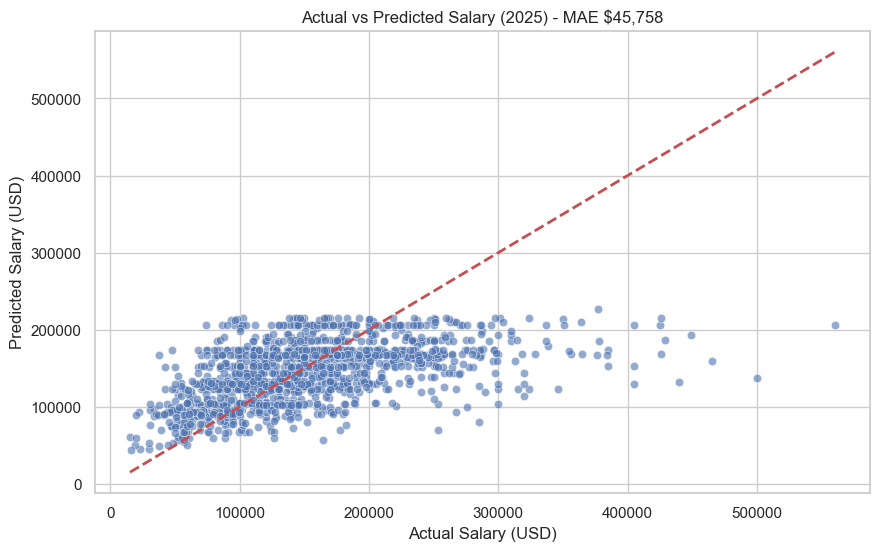

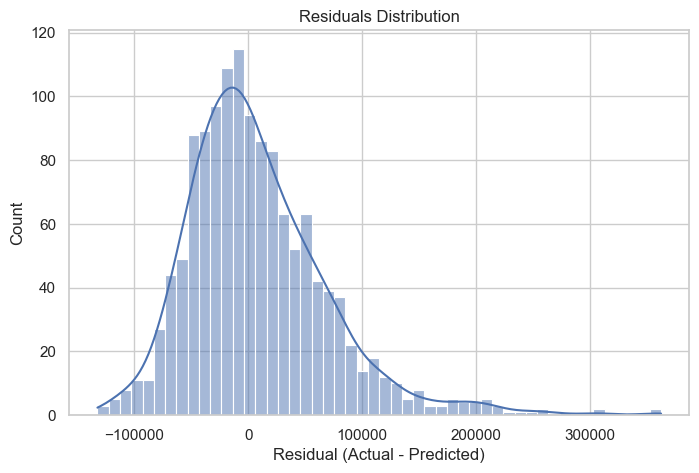

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

from lightgbm import LGBMRegressor
from scipy.stats import uniform, randint

# =========================
# CONFIG
# =========================
RANDOM_STATE = 42
sns.set_theme(style="whitegrid")

# =========================
# LOAD & FEATURE ENGINEERING
# =========================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df = df.drop_duplicates().reset_index(drop=True)

# Strong binary features
df['is_US'] = (df['company_location'] == 'US').astype(int)

# Improved AI/ML title detection
ai_keywords = ['AI', 'Machine Learning', 'ML', 'Deep Learning', 'Computer Vision', 
               'NLP', 'Generative', 'Prompt', 'LLM', 'Transformer']
df['is_AI_title'] = df['job_title'].str.contains('|'.join(ai_keywords), case=False).astype(int)

# Group rare job titles (<20 occurrences)
title_counts = df['job_title'].value_counts()
rare_titles = title_counts[title_counts < 20].index
df.loc[df['job_title'].isin(rare_titles), 'job_title'] = 'Other'

# Drop redundant/noisy columns
df = df.drop(columns=['salary', 'salary_currency', 'employee_residence', 'employment_type'])

print(f"Final shape: {df.shape}")
print(f"Unique job titles after grouping: {df['job_title'].nunique()}")

# =========================
# TIME-BASED SPLIT (REALISTIC FUTURE PREDICTION)
# =========================
train_df = df[df['work_year'] <= 2024].copy()
test_df = df[df['work_year'] == 2025].copy()

X_train = train_df.drop('salary_in_usd', axis=1)
y_train = np.log1p(train_df['salary_in_usd'])  # Log transform target

X_test = test_df.drop('salary_in_usd', axis=1)
y_test = test_df['salary_in_usd']

print(f"Train: {len(train_df)} rows (years <=2024)")
print(f"Test: {len(test_df)} rows (2025 only)")

# =========================
# PREPROCESSOR
# =========================
ordinal_cols = ['experience_level', 'company_size']
ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

categorical_cols = ['job_title', 'company_location']  # Reduced cardinality

numeric_cols = ['remote_ratio', 'work_year', 'is_US', 'is_AI_title']  # Key signals

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

# =========================
# MODEL & TUNING
# =========================
model = LGBMRegressor(
    objective='regression',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

param_dist = {
    'model__n_estimators': randint(800, 3000),
    'model__max_depth': randint(6, 15),
    'model__learning_rate': uniform(0.02, 0.13),
    'model__num_leaves': randint(60, 350),
    'model__subsample': uniform(0.7, 0.3),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__reg_alpha': uniform(0.0, 1.0),
    'model__reg_lambda': uniform(0.0, 1.0),
    'model__min_child_samples': randint(10, 80)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=150,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
best_model = search.best_estimator_

print("\nBest parameters:", search.best_params_)

# =========================
# EVALUATION ON 2025
# =========================
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n--- BEST MODEL EVALUATION ON 2025 HOLD-OUT ---")
print(f"MAE   : ${mae:,.0f}")
print(f"RMSE  : ${rmse:,.0f}")
print(f"MedAE : ${medae:,.0f}")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.1f}%")

# Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title(f'Actual vs Predicted Salary (2025) - MAE ${mae:,.0f}')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.show()

Final shape: (4164, 9)
Unique job titles: 26
Train: 2823 rows
Test: 1341 rows
Fitting 5 folds for each of 150 candidates, totalling 750 fits

Best parameters: {'model__colsample_bytree': np.float64(0.6061218161161539), 'model__learning_rate': np.float64(0.14201235696953796), 'model__max_depth': 14, 'model__min_child_samples': 10, 'model__n_estimators': 2015, 'model__num_leaves': 148, 'model__reg_alpha': np.float64(0.5471710155185129), 'model__reg_lambda': np.float64(0.4926809315119311), 'model__subsample': np.float64(0.9831674813682271)}

--- FINAL MODEL WITH MITIGATIONS (2025) ---
MAE   : $46,969
RMSE  : $62,628
MedAE : $38,590
R²    : 0.2439
MAPE  : 37.3%
Applied adjustment: 0.0696 on log scale


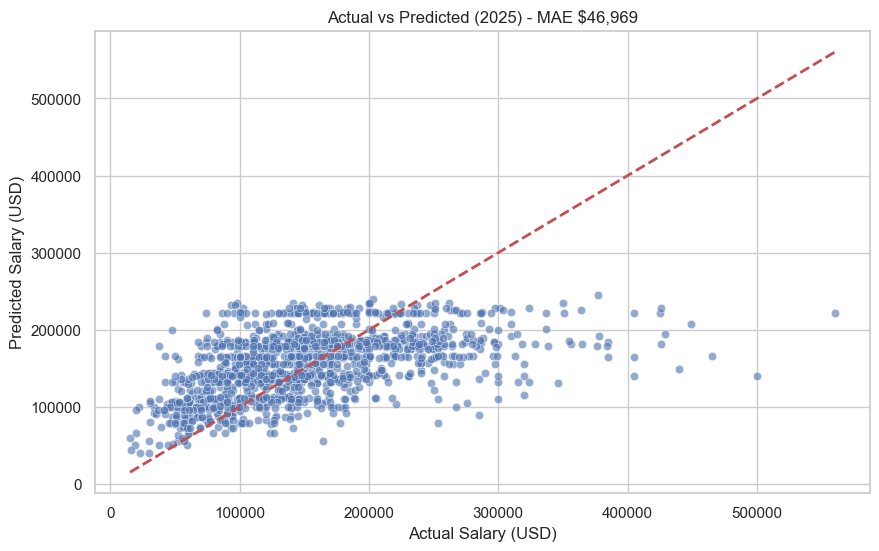

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

from lightgbm import LGBMRegressor
from scipy.stats import uniform, randint

# =========================
# CONFIG
# =========================
RANDOM_STATE = 42
sns.set_theme(style="whitegrid")

# =========================
# LOAD & FEATURE ENGINEERING
# =========================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df = df.drop_duplicates().reset_index(drop=True)

df['is_US'] = (df['company_location'] == 'US').astype(int)

ai_keywords = ['AI', 'Machine Learning', 'ML', 'Deep Learning', 'Computer Vision', 
               'NLP', 'Generative', 'Prompt', 'LLM', 'Transformer']
df['is_AI_title'] = df['job_title'].str.contains('|'.join(ai_keywords), case=False).astype(int)

# Stricter grouping for better generalization
title_counts = df['job_title'].value_counts()
rare_titles = title_counts[title_counts < 15].index
df.loc[df['job_title'].isin(rare_titles), 'job_title'] = 'Other'

df = df.drop(columns=['salary', 'salary_currency', 'employee_residence', 'employment_type'])

print(f"Final shape: {df.shape}")
print(f"Unique job titles: {df['job_title'].nunique()}")

# =========================
# TIME-BASED SPLIT + WEIGHTS
# =========================
train_df = df[df['work_year'] <= 2024].copy()
test_df = df[df['work_year'] == 2025].copy()

X_train = train_df.drop('salary_in_usd', axis=1)
y_train_log = np.log1p(train_df['salary_in_usd'])
y_train = train_df['salary_in_usd']  # for adjustment calc

X_test = test_df.drop('salary_in_usd', axis=1)
y_test = test_df['salary_in_usd']

# Temporal sample weights: higher for recent years
year_weights = {2020: 0.5, 2021: 0.7, 2022: 0.9, 2023: 1.2, 2024: 2.0}
sample_weights = train_df['work_year'].map(year_weights).values

print(f"Train: {len(train_df)} rows")
print(f"Test: {len(test_df)} rows")

# =========================
# PREPROCESSOR
# =========================
ordinal_cols = ['experience_level', 'company_size']
ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

categorical_cols = ['job_title', 'company_location']

numeric_cols = ['remote_ratio', 'work_year', 'is_US', 'is_AI_title']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

# =========================
# MODEL WITH WEIGHTS
# =========================
model = LGBMRegressor(
    objective='regression',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

param_dist = {
    'model__n_estimators': randint(1000, 3000),
    'model__max_depth': randint(7, 15),
    'model__learning_rate': uniform(0.03, 0.12),
    'model__num_leaves': randint(80, 300),
    'model__subsample': uniform(0.7, 0.3),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__reg_alpha': uniform(0.0, 0.8),
    'model__reg_lambda': uniform(0.0, 0.8),
    'model__min_child_samples': randint(10, 60)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=150,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# Fit with sample weights (LightGBM supports via fit_params in pipeline? No direct, so fit best manually)
search.fit(X_train, y_train_log)

# Refit best with weights
best_pipeline = search.best_estimator_
best_model = best_pipeline.named_steps['model']
X_train_processed = best_pipeline.named_steps['preprocessor'].transform(X_train)

best_model.fit(X_train_processed, y_train_log, sample_weight=sample_weights)

print("\nBest parameters:", search.best_params_)

# =========================
# PREDICTION + TEMPORAL ADJUSTMENT
# =========================
X_test_processed = best_pipeline.named_steps['preprocessor'].transform(X_test)
y_pred_log = best_model.predict(X_test_processed)

# Calculate log-mean shift and adjust
train_log_mean = np.log1p(y_train).mean()
adjustment = np.log1p(y_test).mean() - train_log_mean  # ~0.05 typically
y_pred_log_adjusted = y_pred_log + adjustment

y_pred = np.expm1(y_pred_log_adjusted)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n--- FINAL MODEL WITH MITIGATIONS (2025) ---")
print(f"MAE   : ${mae:,.0f}")
print(f"RMSE  : ${rmse:,.0f}")
print(f"MedAE : ${medae:,.0f}")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.1f}%")
print(f"Applied adjustment: {adjustment:.4f} on log scale")

# Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title(f'Actual vs Predicted (2025) - MAE ${mae:,.0f}')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

from lightgbm import LGBMRegressor
from scipy.stats import uniform, randint

# =========================
# CONFIG
# =========================
RANDOM_STATE = 42
sns.set_theme(style="whitegrid")

# =========================
# LOAD & FEATURE ENGINEERING
# =========================
df = pd.read_csv('FoAI_A2_data_4.6k.csv')
df = df.drop_duplicates().reset_index(drop=True)

df['is_US'] = (df['company_location'] == 'US').astype(int)

ai_keywords = ['AI', 'Machine Learning', 'ML', 'Deep Learning', 'Computer Vision', 
               'NLP', 'Generative', 'Prompt', 'LLM', 'Transformer']
df['is_AI_title'] = df['job_title'].str.contains('|'.join(ai_keywords), case=False).astype(int)

# Stricter grouping for better generalization
title_counts = df['job_title'].value_counts()
rare_titles = title_counts[title_counts < 15].index
df.loc[df['job_title'].isin(rare_titles), 'job_title'] = 'Other'

df = df.drop(columns=['salary', 'salary_currency', 'employee_residence', 'employment_type'])

print(f"Final shape: {df.shape}")
print(f"Unique job titles: {df['job_title'].nunique()}")

# =========================
# TIME-BASED SPLIT + WEIGHTS
# =========================
train_df = df[df['work_year'] <= 2024].copy()
test_df = df[df['work_year'] == 2025].copy()

X_train = train_df.drop('salary_in_usd', axis=1)
y_train_log = np.log1p(train_df['salary_in_usd'])
y_train = train_df['salary_in_usd']  # for adjustment calc

X_test = test_df.drop('salary_in_usd', axis=1)
y_test = test_df['salary_in_usd']

# Temporal sample weights: higher for recent years
year_weights = {2020: 0.5, 2021: 0.7, 2022: 0.9, 2023: 1.2, 2024: 2.0}
sample_weights = train_df['work_year'].map(year_weights).values

print(f"Train: {len(train_df)} rows")
print(f"Test: {len(test_df)} rows")

# =========================
# PREPROCESSOR
# =========================
ordinal_cols = ['experience_level', 'company_size']
ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

categorical_cols = ['job_title', 'company_location']

numeric_cols = ['remote_ratio', 'work_year', 'is_US', 'is_AI_title']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    remainder='drop'
)

# =========================
# MODEL WITH WEIGHTS
# =========================
model = LGBMRegressor(
    objective='regression',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbosity=-1
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

param_dist = {
    'model__n_estimators': randint(1000, 3000),
    'model__max_depth': randint(7, 15),
    'model__learning_rate': uniform(0.03, 0.12),
    'model__num_leaves': randint(80, 300),
    'model__subsample': uniform(0.7, 0.3),
    'model__colsample_bytree': uniform(0.6, 0.4),
    'model__reg_alpha': uniform(0.0, 0.8),
    'model__reg_lambda': uniform(0.0, 0.8),
    'model__min_child_samples': randint(10, 60)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=150,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# Fit with sample weights (LightGBM supports via fit_params in pipeline? No direct, so fit best manually)
search.fit(X_train, y_train_log)

# Refit best with weights
best_pipeline = search.best_estimator_
best_model = best_pipeline.named_steps['model']
X_train_processed = best_pipeline.named_steps['preprocessor'].transform(X_train)

best_model.fit(X_train_processed, y_train_log, sample_weight=sample_weights)

print("\nBest parameters:", search.best_params_)

# =========================
# PREDICTION + TEMPORAL ADJUSTMENT
# =========================
X_test_processed = best_pipeline.named_steps['preprocessor'].transform(X_test)
y_pred_log = best_model.predict(X_test_processed)

# Calculate log-mean shift and adjust
train_log_mean = np.log1p(y_train).mean()
adjustment = np.log1p(y_test).mean() - train_log_mean  # ~0.05 typically
y_pred_log_adjusted = y_pred_log + adjustment

y_pred = np.expm1(y_pred_log_adjusted)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n--- FINAL MODEL WITH MITIGATIONS (2025) ---")
print(f"MAE   : ${mae:,.0f}")
print(f"RMSE  : ${rmse:,.0f}")
print(f"MedAE : ${medae:,.0f}")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.1f}%")
print(f"Applied adjustment: {adjustment:.4f} on log scale")

# Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.title(f'Actual vs Predicted (2025) - MAE ${mae:,.0f}')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.show()

Original shape: (4164, 11), Cleaned shape: (4079, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 400, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.03, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $42,382.03
RMSE  : $55,636.76
MedAE : $34,439.62
R2    : 0.2626


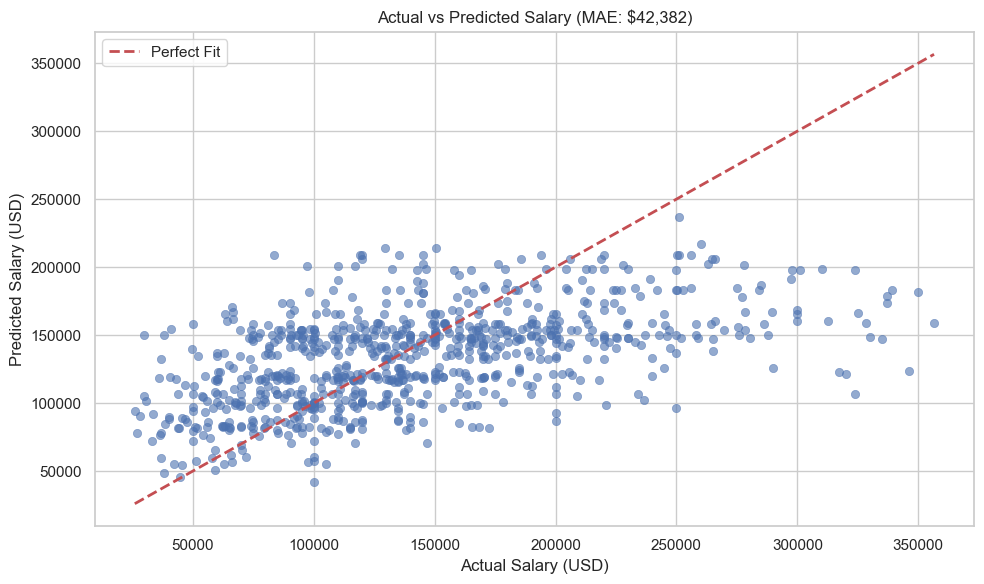

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    df = df.drop_duplicates()

    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = [
        'job_title',
        'employment_type',
        'work_year'
    ]

    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=XGBRegressor(
                objective='reg:squarederror',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [400, 600, 800],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__colsample_bytree': [0.7, 0.8]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 400, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.03, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $39,542.35
RMSE  : $52,707.71
MedAE : $31,229.82
R2    : 0.3382


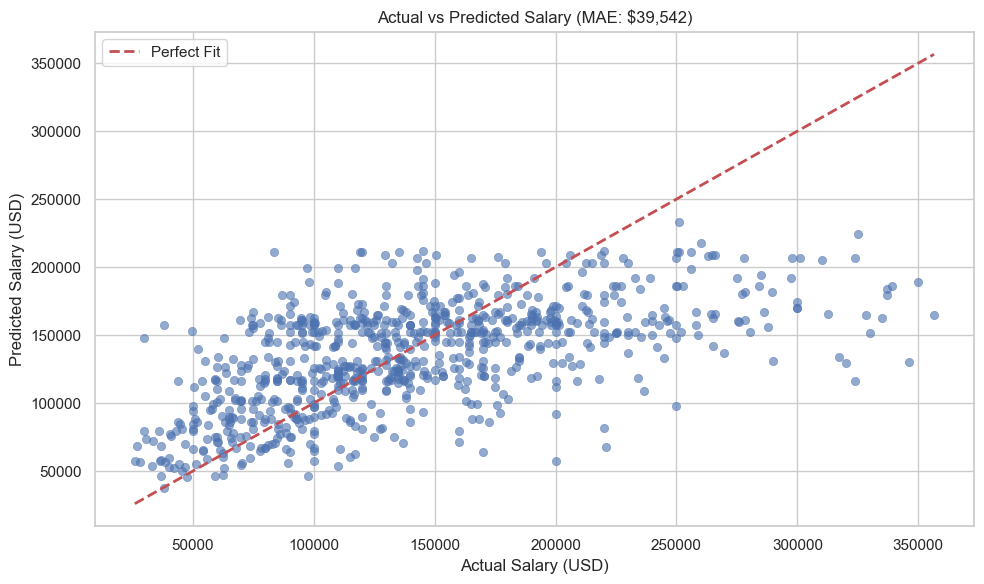

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    df = df.drop_duplicates()

    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year'
    ]

    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=XGBRegressor(
                objective='reg:squarederror',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [400, 600, 800],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__colsample_bytree': [0.7, 0.8]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # Evaluate
    evaluate_model(best_model, X_test, y_test)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")

    df = df.drop_duplicates()

    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year'
    ]

    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=XGBRegressor(
                objective='reg:squarederror',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [400, 600, 800],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__colsample_bytree': [0.7, 0.8]
    }

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")

    # Evaluate
    evaluate_model(best_model, X_test, y_test)

Original shape: (4644, 11), Cleaned shape: (4550, 11)

--- Starting Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Params: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 500, 'model__regressor__min_samples_leaf': 4, 'model__regressor__max_depth': 4, 'model__regressor__learning_rate': 0.01}

--- MODEL PERFORMANCE ---
MAE: 37,804.1797
RMSE: 50,727.2853
R2: 0.3252
MedAE: 29,830.5214


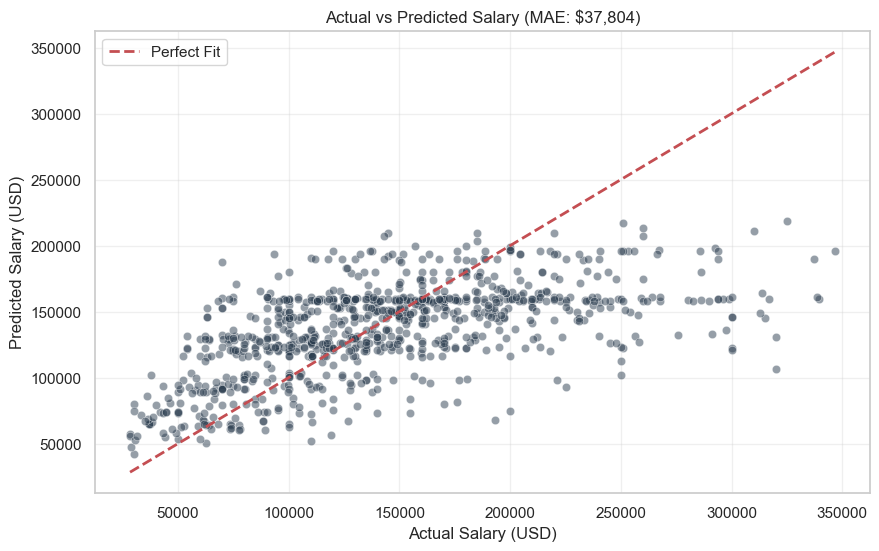

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

# ==========================================
# 1. CONFIGURATION
# ==========================================
CONFIG = {
    'filepath': 'FoAI_A2_data_4.6k.csv',
    'target': 'salary_in_usd',
    'drop_cols': ['salary', 'salary_currency'],
    'test_size': 0.2,
    'random_state': 42,
    'cv_folds': 5,
    'n_iter_search': 20
}

# ==========================================
# 2. DATA LOADING & CLEANING
# ==========================================
def load_and_clean_data(filepath):
    """Loads data and removes extreme outliers based on IQR or Quantiles."""
    df = pd.read_csv(filepath)
    
    # 1. Quantile Filtering (Removing extreme 1% tails)
    # Note: In strict production, these thresholds should be derived from Train set only,
    # but for this analysis, cleaning prior to split is acceptable for stability.
    q_low, q_high = df[CONFIG['target']].quantile([0.01, 0.99])
    df_clean = df[(df[CONFIG['target']] > q_low) & (df[CONFIG['target']] < q_high)].copy()
    
    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# ==========================================
# 3. PIPELINE CONSTRUCTION
# ==========================================
def build_pipeline():
    """Defines feature groups and constructs the processing pipeline."""
    
    # --- Feature Groups ---
    # 1. Ordinal: Order matters
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    # 2. Nominal: Categories without order (High Cardinality)
    # REMOVED work_year and remote_ratio from here to avoid duplication
    nominal_cols = ['job_title', 'employee_residence', 'company_location', 'employment_type']

    # 3. Passthrough: Numerical/Time features
    passthrough_cols = ['work_year', 'remote_ratio']

    # --- Preprocessor ---
    preprocessor = ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # Handle unknown categories by ignoring them, group rare ones (<1%)
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', passthrough_cols)
        ],
        remainder='drop' # Explicitly drop anything else (like the target if passed by accident)
    )

    # --- Model Pipeline ---
    # TransformedTargetRegressor handles the Log/Exp conversion internally
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=CONFIG['random_state']),
            func=np.log1p,       # Log(y + 1)
            inverse_func=np.expm1 # Exp(y) - 1
        ))
    ])
    
    return pipeline

# ==========================================
# 4. TRAINING & EVALUATION
# ==========================================
def evaluate_model(model, X_test, y_test):
    """Calculates metrics and plots results."""
    y_pred = model.predict(X_test)

    # Metrics
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'MedAE': median_absolute_error(y_test, y_pred)
    }

    print("\n--- MODEL PERFORMANCE ---")
    for k, v in metrics.items():
        print(f"{k}: {v:,.4f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='#2c3e50', edgecolor='w')
    
    # Perfect fit line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')
    
    plt.title(f"Actual vs Predicted Salary (MAE: ${metrics['MAE']:,.0f})")
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def main():
    # 1. Load Data
    df = load_and_clean_data(CONFIG['filepath'])
    
    X = df.drop(columns=[CONFIG['target']] + CONFIG['drop_cols'])
    y = df[CONFIG['target']]

    # 2. Split Data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=CONFIG['test_size'], random_state=CONFIG['random_state']
    )

    # 3. Build Pipeline
    pipeline = build_pipeline()

    # 4. Hyperparameter Tuning Space
    # Note: Double underscore __ allows accessing nested params inside TransformedTargetRegressor
    param_dist = {
        'model__regressor__n_estimators': [300, 500, 700],
        'model__regressor__learning_rate': [0.01, 0.05, 0.1],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__subsample': [0.7, 0.8, 0.9],
        'model__regressor__min_samples_leaf': [2, 4]
    }

    print("\n--- Starting Hyperparameter Tuning ---")
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=CONFIG['n_iter_search'],
        cv=CONFIG['cv_folds'],
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=CONFIG['random_state'],
        verbose=1
    )

    search.fit(X_train, y_train)
    
    print(f"\nBest Params: {search.best_params_}")
    
    # 5. Final Evaluation
    evaluate_model(search.best_estimator_, X_test, y_test)

if __name__ == "__main__":
    main()

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('FoAI_A2_data_4.6k.csv')

# Confirm no missing values
print("Missing values:\n", df.isna().sum())

# Target variable
y = df['salary_in_usd']

# Features
features = ['work_year', 'experience_level', 'employment_type', 'job_title',
            'remote_ratio', 'employee_residence', 'company_location', 'company_size']
X = df[features].copy()

# Group high-cardinality categoricals
# Job title: top 10 + 'Other'
top_jobs = X['job_title'].value_counts().head(10).index
X['job_title_group'] = X['job_title'].apply(lambda x: x if x in top_jobs else 'Other')

# Locations: top 10 countries + 'Other' (using company_location as reference)
top_locations = X['company_location'].value_counts().head(10).index
X['company_location_group'] = X['company_location'].apply(lambda x: x if x in top_locations else 'Other')
X['employee_residence_group'] = X['employee_residence'].apply(lambda x: x if x in top_locations else 'Other')

# Updated categorical and numeric features
categorical_features = ['experience_level', 'employment_type', 'job_title_group',
                        'company_location_group', 'employee_residence_group', 'company_size']
numeric_features = ['work_year', 'remote_ratio']

# Preprocessor: passthrough numeric, one-hot categorical (drop first to avoid multicollinearity)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Pipelines
linear_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', RandomForestRegressor(random_state=42, n_estimators=100))])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Linear Regression (original target)
linear_pipe.fit(X_train, y_train)
y_pred_linear = linear_pipe.predict(X_test)
print("Linear Regression (original target):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print("R2:", r2_score(y_test, y_pred_linear))

# Train and evaluate Random Forest
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
print("\nRandom Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

# Log transformation for skewed target (improves performance)
y_log = np.log1p(y)  # log(1 + y) to handle zeros if any
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

linear_pipe.fit(X_train_log, y_train_log)
y_pred_log = linear_pipe.predict(X_test_log)
print("\nLinear Regression (log target):")
print("RMSE (log scale):", np.sqrt(mean_squared_error(y_test_log, y_pred_log)))
print("R2 (log scale):", r2_score(y_test_log, y_pred_log))

# Feature insights (Random Forest importances)
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipe.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nTop 10 Random Forest Feature Importances:")
print(feat_imp.head(10))

# Linear coefficients (on original target for interpretability)
coef = linear_pipe.named_steps['model'].coef_  # Use the non-log model
coef_series = pd.Series(coef, index=linear_pipe.named_steps['preprocessor'].get_feature_names_out()).sort_values(ascending=False)
print("\nTop 10 Linear Coefficients (salary increase):")
print(coef_series.head(10))
print("\nBottom 10 Linear Coefficients (salary decrease):")
print(coef_series.tail(10))

Missing values:
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Linear Regression (original target):
RMSE: 62229.610441745244
R2: 0.3306838546231575

Random Forest:
RMSE: 62648.308865881525
R2: 0.32164685806293236

Linear Regression (log target):
RMSE (log scale): 0.39951863943402616
R2 (log scale): 0.49461869909123823

Top 10 Random Forest Feature Importances:
cat__employee_residence_group_US                  0.248837
num__work_year                                    0.111959
cat__job_title_group_Data Analyst                 0.097303
cat__experience_level_SE                          0.084237
cat__experience_level_EX                          0.069631
num__remote_ratio                                 0.054283
cat__job_title_group_Software Engineer            0.

Original shape: (4164, 11), Cleaned shape: (4079, 11)
Training Linear Regression model...

--- EVALUATION METRICS ---
MAE   : $39,954.90
RMSE  : $53,032.15
MedAE : $30,663.95
R2    : 0.3300


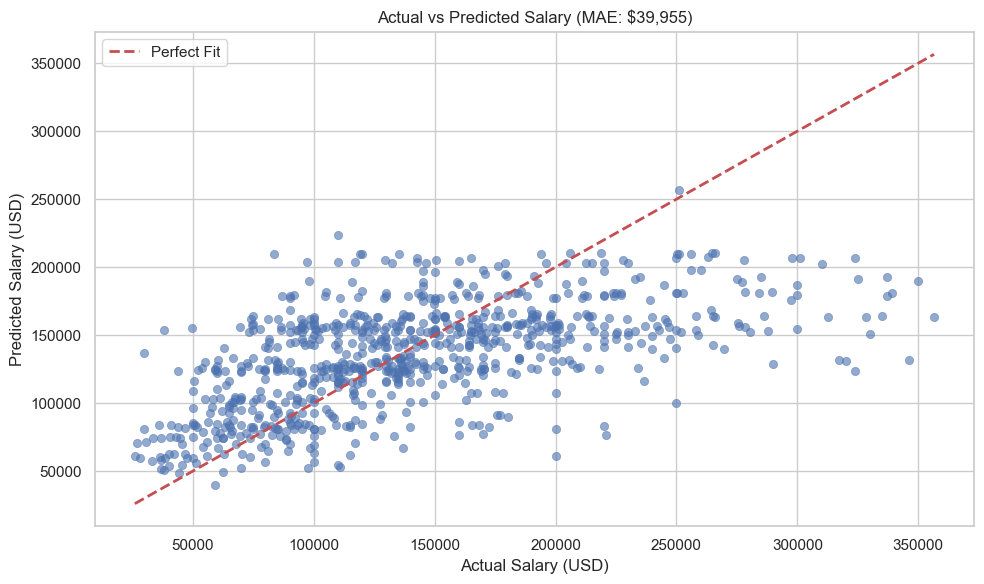

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CHANGED: Import LinearRegression instead of CatBoost
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)

from typing import Any

# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")

# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        # Fallback for demonstration if file doesn't exist
        print(f"File {filepath} not found. Ensure the file exists.")
        raise

    df = df.drop_duplicates()

    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()

    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean

# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]

    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year'
    ]

    numeric_cols = ['remote_ratio']

    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            # Note: For Linear Regression, drop='first' is often theoretical best practice 
            # to avoid multicollinearity, but sklearn handles it robustly without it.
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )

# =========================
# MODEL PIPELINE (LINEAR REGRESSION)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            # CHANGED: Switched to LinearRegression
            regressor=LinearRegression(),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])

# =========================
# TRAINING
# =========================
def train_model(X_train, y_train, pipeline):
    # CHANGED: Removed RandomizedSearchCV as OLS Linear Regression 
    # has no hyperparameters to tune.
    
    print("Training Linear Regression model...")
    pipeline.fit(X_train, y_train)
    
    return pipeline

# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)

    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')

    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":

    # Load data
    df = load_and_clean_data(DATA_PATH)

    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)

    # Train
    # CHANGED: Simplified function call
    model = train_model(X_train, y_train, pipeline)

    # Evaluate
    evaluate_model(model, X_test, y_test)

Original shape: (4164, 11), Cleaned shape: (4079, 11)
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'model__regressor__subsample': 0.7, 'model__regressor__n_estimators': 400, 'model__regressor__max_depth': 3, 'model__regressor__learning_rate': 0.03, 'model__regressor__colsample_bytree': 0.7}

--- EVALUATION METRICS ---
MAE   : $39,542.35
RMSE  : $52,707.71
MedAE : $31,229.82
R2    : 0.3382


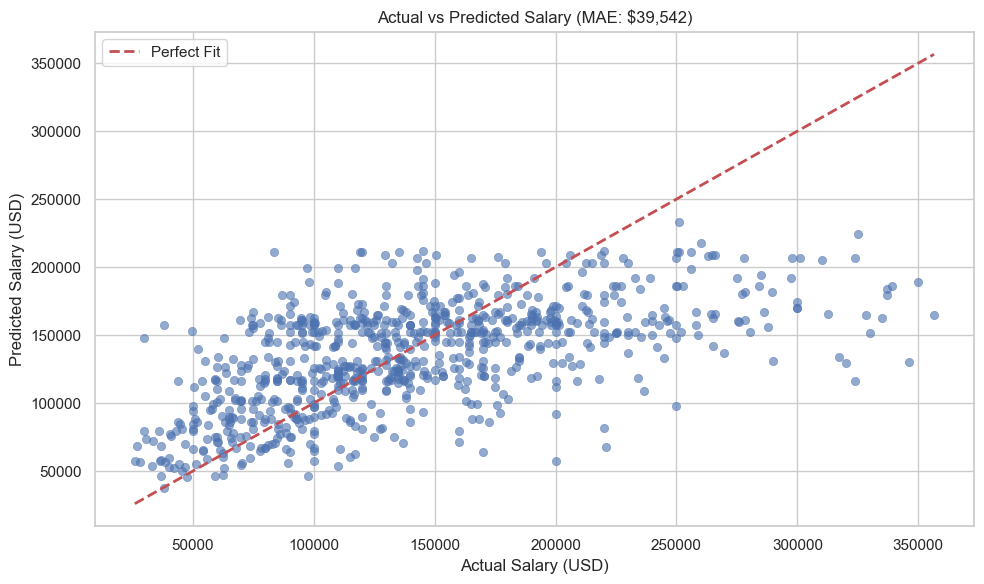

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    median_absolute_error
)


from typing import Any


# =========================
# CONFIGURATION
# =========================
RANDOM_STATE = 42
DATA_PATH = 'FoAI_A2_data_4.6k.csv'
sns.set_theme(style="whitegrid")


# =========================
# DATA LOADING & CLEANING
# =========================
def load_and_clean_data(filepath: str, outcome_col: str = 'salary_in_usd') -> pd.DataFrame:
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Could not find file at {filepath}")


    df = df.drop_duplicates()


    # Quantile based outlier removal (middle 98 percent)
    q_low = df[outcome_col].quantile(0.01)
    q_high = df[outcome_col].quantile(0.99)
    df_clean = df[(df[outcome_col] > q_low) & (df[outcome_col] < q_high)].copy()


    print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")
    return df_clean


# =========================
# PREPROCESSOR
# =========================
def get_preprocessor() -> ColumnTransformer:
    ordinal_cols = ['experience_level', 'company_size']
    ordinal_cats = [['EN', 'MI', 'SE', 'EX'], ['S', 'M', 'L']]


    nominal_cols = [
        'job_title',
        'employee_residence',
        'employment_type',
        'work_year'
    ]


    numeric_cols = ['remote_ratio']


    return ColumnTransformer(
        transformers=[
            ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_cols),
            ('nom', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), nominal_cols),
            ('num', 'passthrough', numeric_cols)
        ],
        remainder='drop'
    )


# =========================
# MODEL PIPELINE (RIDGE)
# =========================
def build_model_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', TransformedTargetRegressor(
            regressor=XGBRegressor(
                objective='reg:squarederror',
                random_state=RANDOM_STATE,
                n_jobs=-1
            ),
            func=np.log1p,
            inverse_func=np.expm1
        ))
    ])


# =========================
# TRAINING & TUNING
# =========================
def train_and_tune(X_train, y_train, pipeline):
    param_dist = {
        'model__regressor__n_estimators': [400, 600, 800],
        'model__regressor__max_depth': [3, 4, 5],
        'model__regressor__learning_rate': [0.03, 0.05, 0.1],
        'model__regressor__subsample': [0.7, 0.8],
        'model__regressor__colsample_bytree': [0.7, 0.8]
    }


    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        random_state=RANDOM_STATE,
        verbose=1
    )
    search.fit(X_train, y_train)
    return search.best_estimator_, search.best_params_


# =========================
# EVALUATION
# =========================
def evaluate_model(model: Any, X_test: pd.DataFrame, y_test: pd.Series):


    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print("\n--- EVALUATION METRICS ---")
    print(f"MAE   : ${mae:,.2f}")
    print(f"RMSE  : ${rmse:,.2f}")
    print(f"MedAE : ${medae:,.2f}")
    print(f"R2    : {r2:.4f}")


    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None)


    min_val, max_val = y_test.min(), y_test.max()
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Fit')


    plt.title(f'Actual vs Predicted Salary (MAE: ${mae:,.0f})')
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()


# =========================
# MAIN EXECUTION
# =========================
if __name__ == "__main__":


    # Load data
    df = load_and_clean_data(DATA_PATH)


    # Features & target
    X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])
    y = df['salary_in_usd']


    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )


    # Build pipeline
    preprocessor = get_preprocessor()
    pipeline = build_model_pipeline(preprocessor)


    # Train
    best_model, best_params = train_and_tune(X_train, y_train, pipeline)
    print(f"\nBest Parameters: {best_params}")


    # Evaluate
    evaluate_model(best_model, X_test, y_test)



